In [1]:
# Load libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from functools import reduce


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset 
df = pd.read_csv("london_borough_info.csv")

In [3]:
list(df.columns)

['borough_name',
 'year',
 'Number_of_eligible_pupils_early_years',
 'Average_number_of_early_learning_goals_at_expected_level_per_child_early_years',
 'Percentage_of_children_at_expected_level_across_all_early_learning_goals_early_years',
 'Percentage_of_children_with_a_good_level_of_development_early_years',
 'num_eligible_pupils_reading_ks1',
 'num_eligible_pupils_writing_ks1',
 'num_eligible_pupils_mathematics_ks1',
 'num_eligible_pupils_science_ks1',
 'percent_reaching_exp_standard_reading_ks1',
 'percent_reaching_exp_standard_writing_ks1',
 'percent_reaching_exp_standard_mathematics_ks1',
 'percent_reaching_exp_standard_science_ks1',
 'percent_exceed_standard_reading_ks1',
 'percent_exceed_standard_writing_ks1',
 'percent_exceed_standard_mathematics_ks1',
 'num_eligible_pupils_all_ks2',
 'num_eligible_pupils_gps_ks2',
 'num_eligible_pupils_math_ks2',
 'num_eligible_pupils_reading_ks2',
 'num_eligible_pupils_writing_ks2',
 'percent_exceed_standard_all_ks2',
 'percent_exceed_standa

# Data exploration 

In [4]:
# First 5 rows 
df.head()

# Info 
df.info()

# Describe the integer variables 
df.describe()

borough_name  year  Number_of_eligible_pupils_early_years  \
0  Barking and Dagenham  2022                                 3472.0   
1  Barking and Dagenham  2021                                    NaN   
2  Barking and Dagenham  2020                                    NaN   
3  Barking and Dagenham  2019                                    NaN   
4  Barking and Dagenham  2018                                    NaN   

   Average_number_of_early_learning_goals_at_expected_level_per_child_early_years  \
0                                               13.3                                
1                                                NaN                                
2                                                NaN                                
3                                                NaN                                
4                                                NaN                                

   Percentage_of_children_at_expected_level_across_all_early_learning_goals_early_years  \
0                                               59.7                                      
1                                                NaN                                      
2                                                NaN                                      
3                                                NaN                                      
4                                                NaN                                      

   Percentage_of_children_with_a_good_level_of_development_early_years  \
0                                               62.5                     
1                                                NaN                     
2                                                NaN                     
3                                                NaN                     
4                                                NaN                     

   num_eligible_pupils_reading_ks1  num_eligible_pupils_writing_ks1  \
0                              NaN                              NaN   
1                              NaN                              NaN   
2                              NaN                              NaN   
3                           3786.0                           3786.0   
4                           3678.0                           3678.0   

   num_eligible_pupils_mathematics_ks1  num_eligible_pupils_science_ks1  ...  \
0                                  NaN                              NaN  ...   
1                                  NaN                              NaN  ...   
2                                  NaN                              NaN  ...   
3                               3786.0                           3786.0  ...   
4                               3678.0                           3678.0  ...   

   PM10_ton/yr  PM2.5_ton/yr  CO2_emissions_ton/yr_per_square_km  \
0          NaN           NaN                                 NaN   
1          NaN           NaN                                 NaN   
2          NaN           NaN                                 NaN   
3       204.87         89.14                             11160.4   
4          NaN           NaN                                 NaN   

   NOx_ton/yr_per_square_km  PM10_ton/yr_per_square_km  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                     20.67                       5.67   
4                       NaN                        NaN   

   PM2.5_ton/yr_per_square_km  traffic_flow_all_vehicles_per_square_km  \
0                         NaN                                      NaN   
1                         NaN                                      NaN   
2                         NaN                                      NaN   
3                        2.47                                    18.31   
4                         NaN          

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Columns: 139 entries, borough_name to num_tube_stations_per_square_meter
dtypes: float64(104), int64(1), object(34)
memory usage: 251.0+ KB


year  Number_of_eligible_pupils_early_years  \
count   231.000000                              33.000000   
mean   2019.000000                            2917.090909   
std       2.004343                            1096.352201   
min    2016.000000                              42.000000   
25%    2017.000000                            2339.000000   
50%    2019.000000                            3024.000000   
75%    2021.000000                            3499.000000   
max    2022.000000                            4704.000000   

       Average_number_of_early_learning_goals_at_expected_level_per_child_early_years  \
count                                          33.000000                                
mean                                           14.145455                                
std                                             0.517259                                
min                                            13.200000                                
25%                                            13.900000                                
50%                                            14.100000                                
75%                                            14.300000                                
max                                            15.500000                                

       Percentage_of_children_at_expected_level_across_all_early_learning_goals_early_years  \
count                                          33.000000                                      
mean                                           65.793939                                      
std                                             3.584946                                      
min                                            58.300000                                      
25%                                            63.200000                                      
50%                                            65.800000                                      
75%                                            68.000000                                      
max                                            73.800000                                      

       Percentage_of_children_with_a_good_level_of_development_early_years  \
count                                          33.000000                     
mean                                           67.757576                     
std                                             3.046518                     
min                                            60.500000                     
25%                                            65.700000                     
50%                                            68.000000                     
75%                                            69.600000                     
max                                            74.400000                     

       num_eligible_pupils_reading_ks1  num_eligible_pupils_writing_ks1  \
count                       128.000000                       128.000000   
mean                       3220.101562                      3220.101562   
std                        1019.951742                      1019.951742   
min                         974.000000                       974.000000   
25%                        2532.000000                      2532.000000   
50%                        3348.500000                      3348.500000   
75%                        3902.250000                      3902.250000   
max                        4968.000000                      4968.000000   

       num_eligible_pupils_mathematics_ks1  num_eligible_pupils_science_ks1  \
count                           128.000000                       128.000000   
mean                           3220.093750                      3220.109375   
std                            1019.944652                      1019.934406   
min                             974.000000                       975.000000   
25%                            2

In [5]:
# Create a function that gives us insight into the data types of each feature 
def create_datatype_df(df):
    # Create a table displaying each column, data type, and example value
    # Create an empty DataFrame to store the results
    datatype_df = pd.DataFrame(columns=['Column Title', 'Data Type', 'Example Value'])

    for column_name, data_type in df.dtypes.items():
        example_value = df[column_name].dropna().iloc[0]
        datatype_df = pd.concat([datatype_df, pd.DataFrame({'Column Title': [column_name], 'Data Type': [data_type], 'Example Value': [example_value]})], ignore_index=True)

    return datatype_df

# Call the function 
result_df = create_datatype_df(df)
result_df.head(5)

Column Title Data Type  \
0                                       borough_name    object   
1                                               year     int64   
2              Number_of_eligible_pupils_early_years   float64   
3  Average_number_of_early_learning_goals_at_expe...   float64   
4  Percentage_of_children_at_expected_level_acros...   float64   

          Example Value  
0  Barking and Dagenham  
1                  2022  
2                3472.0  
3                  13.3  
4                  59.7

In [6]:
# Create a function that gives is information of missing values in each feature 
def missing_values_info(df, columns):
    """
    Generate a DataFrame listing column titles and their missing percentages for specified columns.

    Parameters:
    - df (DataFrame): The DataFrame to analyze.
    - columns (list): List of column names to include in the DataFrame.

    Returns:
    - DataFrame: A DataFrame containing 'Column Title' and 'Missing Percentage' columns.
    """
    missing_df = pd.DataFrame(columns=['Column Title', 'Missing Percentage'])

    for column_name in columns:
        missing_percentage = round((df[column_name].isnull().sum() / len(df)) * 100, 1)
        missing_df = pd.concat([missing_df, pd.DataFrame({'Column Title': [column_name], 'Missing Percentage': [missing_percentage]})], ignore_index=True)

    return missing_df

# Run the missing values function
missing_info_df = missing_values_info(df, list(df.columns))
missing_info_df.head(20)

Column Title  Missing Percentage
0                                        borough_name                 0.0
1                                                year                 0.0
2               Number_of_eligible_pupils_early_years                85.7
3   Average_number_of_early_learning_goals_at_expe...                85.7
4   Percentage_of_children_at_expected_level_acros...                85.7
5   Percentage_of_children_with_a_good_level_of_de...                85.7
6                     num_eligible_pupils_reading_ks1                44.6
7                     num_eligible_pupils_writing_ks1                44.6
8                 num_eligible_pupils_mathematics_ks1                44.6
9                     num_eligible_pupils_science_ks1                44.6
10          percent_reaching_exp_standard_reading_ks1                44.6
11          percent_reaching_exp_standard_writing_ks1                44.6
12      percent_reaching_exp_standard_mathematics_ks1                44.6
13          percent_reaching_exp_standard_science_ks1                44.6
14                percent_exceed_standard_reading_ks1                44.6
15                percent_exceed_standard_writing_ks1                44.6
16            percent_exceed_standard_mathematics_ks1                44.6
17                        num_eligible_pupils_all_ks2                42.9
18                        num_eligible_pupils_gps_ks2                42.9
19                       num_eligible_pupils_math_ks2                42.9

In [7]:
# From the .info() function we know that 34 features are objects 
# This shouldn't be the case as all inputs are numeric 
# Change features with object datatype into floats - except for 'borough name'

# Select columns with data type 'object'
object_columns = df.select_dtypes(include=['object'])

# Iterate through object columns starting from the second column (index 1)
for column_name in object_columns.columns[1:]:
    df[column_name] = pd.to_numeric(df[column_name], errors='coerce', downcast='float')

# Check the counts of each datatype now
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Columns: 139 entries, borough_name to num_tube_stations_per_square_meter
dtypes: float32(33), float64(104), int64(1), object(1)
memory usage: 221.2+ KB


In [8]:
# Let's create a copy for future use in the 'Proof of Concept' section
model_df = df.copy()
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Columns: 139 entries, borough_name to num_tube_stations_per_square_meter
dtypes: float32(33), float64(104), int64(1), object(1)
memory usage: 221.2+ KB


## Correlation matrices 

In our analysis of a panel dataset covering various London boroughs from 2016 to 2022, I have chosen to employ correlation matrices at an earlier stage than traditionally practiced in data summarization tasks. This deviation is primarily due to the anticipated high degree of multicollinearity within the dataset, which encompasses diverse categories such as school performance, crime rates, and transport. These categories, while distinct, are expected to exhibit significant inter-correlations due to the nature of the variables involved. 

By applying correlation matrices upfront, we aim to efficiently address the issue of multicollinearity, a crucial step before advancing to our regression modelling. This approach not only aids in identifying variables that are highly interrelated but also  enhances our understanding of the dataset, revealing underlying relationships between variables across different categories.

By reducing the number of our features at this stage, we can provide more valuable data summarisation, ensuring a more focused and effective exploration of the data characteristics pertinent to the diverse aspects of London boroughs over the seven-year period.

In [9]:
###### The first step is to create subsets of ours categories in the London borough dataframe
# Get a list of column names and their index numbers
column_names_with_index = list(enumerate(df.columns))

# Print the list
for index, column_name in column_names_with_index:
    print(f'Column Name: {column_name}, Index: {index}')

Column Name: borough_name, Index: 0
Column Name: year, Index: 1
Column Name: Number_of_eligible_pupils_early_years, Index: 2
Column Name: Average_number_of_early_learning_goals_at_expected_level_per_child_early_years, Index: 3
Column Name: Percentage_of_children_at_expected_level_across_all_early_learning_goals_early_years, Index: 4
Column Name: Percentage_of_children_with_a_good_level_of_development_early_years, Index: 5
Column Name: num_eligible_pupils_reading_ks1, Index: 6
Column Name: num_eligible_pupils_writing_ks1, Index: 7
Column Name: num_eligible_pupils_mathematics_ks1, Index: 8
Column Name: num_eligible_pupils_science_ks1, Index: 9
Column Name: percent_reaching_exp_standard_reading_ks1, Index: 10
Column Name: percent_reaching_exp_standard_writing_ks1, Index: 11
Column Name: percent_reaching_exp_standard_mathematics_ks1, Index: 12
Column Name: percent_reaching_exp_standard_science_ks1, Index: 13
Column Name: percent_exceed_standard_reading_ks1, Index: 14
Column Name: percent_e

In [10]:
# Extract the first two columns - borough name and year
first_2_col = df.iloc[:, :2]

# Define column indices for each category
school_column_indices = list(range(2, 41))
entertainment_indices = list(range(41, 45))
crime_indices = list(range(56, 68))
diversity_and_community_indices = list(range(68, 94))
transport_indices = list(range(48, 56)) + list(range(94, 96)) + list(range(135, 139))
income_and_prices_indices = list(range(96, 105))
tenure_indices = list(range(105, 116))
borough_size_indices = list(range(116, 121))
green_spaces_indices = list(range(121, 128)) + [46, 47]
air_quality_indices = list(range(128, 135)) + [45]

# Create subset dataframes for each category
school_subset_df = pd.concat([first_2_col, df.iloc[:, school_column_indices]], axis=1)
entertainment_subset_df = pd.concat([first_2_col, df.iloc[:, entertainment_indices]], axis=1)
crime_subset_df = pd.concat([first_2_col, df.iloc[:, crime_indices]], axis=1)
diversity_and_community_subset_df = pd.concat([first_2_col, df.iloc[:, diversity_and_community_indices]], axis=1)
transport_subset_df = pd.concat([first_2_col, df.iloc[:, transport_indices]], axis=1)
income_and_prices_subset_df = pd.concat([first_2_col, df.iloc[:, income_and_prices_indices]], axis=1)
tenure_subset_df = pd.concat([first_2_col, df.iloc[:, tenure_indices]], axis=1)
borough_size_subset_df = pd.concat([first_2_col, df.iloc[:, borough_size_indices]], axis=1)
green_spaces_subset_df = pd.concat([first_2_col, df.iloc[:, green_spaces_indices]], axis=1)
air_quality_subset_df = pd.concat([first_2_col, df.iloc[:, air_quality_indices]], axis=1)

# Aggregate the subset dataframes into a list
subset_dfs = [
    school_subset_df,
    entertainment_subset_df,
    crime_subset_df,
    diversity_and_community_subset_df,
    transport_subset_df,
    income_and_prices_subset_df,
    tenure_subset_df,
    borough_size_subset_df,
    green_spaces_subset_df,
    air_quality_subset_df
]


# Store subsets in a dictionary with names as keys 
subset_dict = {
    'School': school_subset_df,
    'Entertainment': entertainment_subset_df,
    'Crime': crime_subset_df,
    'Diversity and Community': diversity_and_community_subset_df,
    'Transport': transport_subset_df,
    'Income and Prices': income_and_prices_subset_df,
    'Tenure': tenure_subset_df,
    'Borough Size': borough_size_subset_df,
    'Green Spaces': green_spaces_subset_df,
    'Air Quality': air_quality_subset_df
}

In [11]:
# Create functions for plotting correlation matrices 
# We are creating 2 - one that will annotate with correlation figures and one that will not
# This is because if we have a subset with many features, we will not be able to read the annotations 

def plot_correlation_matrix(df, title_word):
    # Assuming 'borough_name' and 'year' are columns in the DataFrame
    numeric_cols = df.drop(columns=['year'], errors='ignore').select_dtypes(include=[np.number])
    
    # Impute missing values with the mean of the respective borough, only for numeric columns
    borough_means = numeric_cols.groupby(df['borough_name']).transform('mean')
    numeric_cols_filled = numeric_cols.fillna(borough_means)
    
    # Calculate the correlation matrix.
    correlation_matrix = numeric_cols_filled.corr()
    
    # Create a mask for the upper triangle, excluding the diagonal
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", square=True, cbar_kws={"shrink": .5})
    plt.title(f'{title_word.capitalize()} Subset Correlation Matrix')
    plt.show()

    
def plot_correlation_matrix_annotate(df, title_word):
    # Assuming 'borough_name' and 'year' are columns in the DataFrame
    numeric_cols = df.drop(columns=['year'], errors='ignore').select_dtypes(include=[np.number])

    # Impute missing values with the mean of the respective borough, only for numeric columns
    borough_means = numeric_cols.groupby(df['borough_name']).transform('mean')
    numeric_cols_filled = numeric_cols.fillna(borough_means)
    
    # Calculate the correlation matrix.
    correlation_matrix = numeric_cols_filled.corr()
    
    # Create a mask for the upper triangle, excluding the diagonal
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, annot=True, fmt=".2f", square=True, cbar_kws={"shrink": .5})
    plt.title(f'{title_word.capitalize()} Subset Correlation Matrix')
    plt.show()

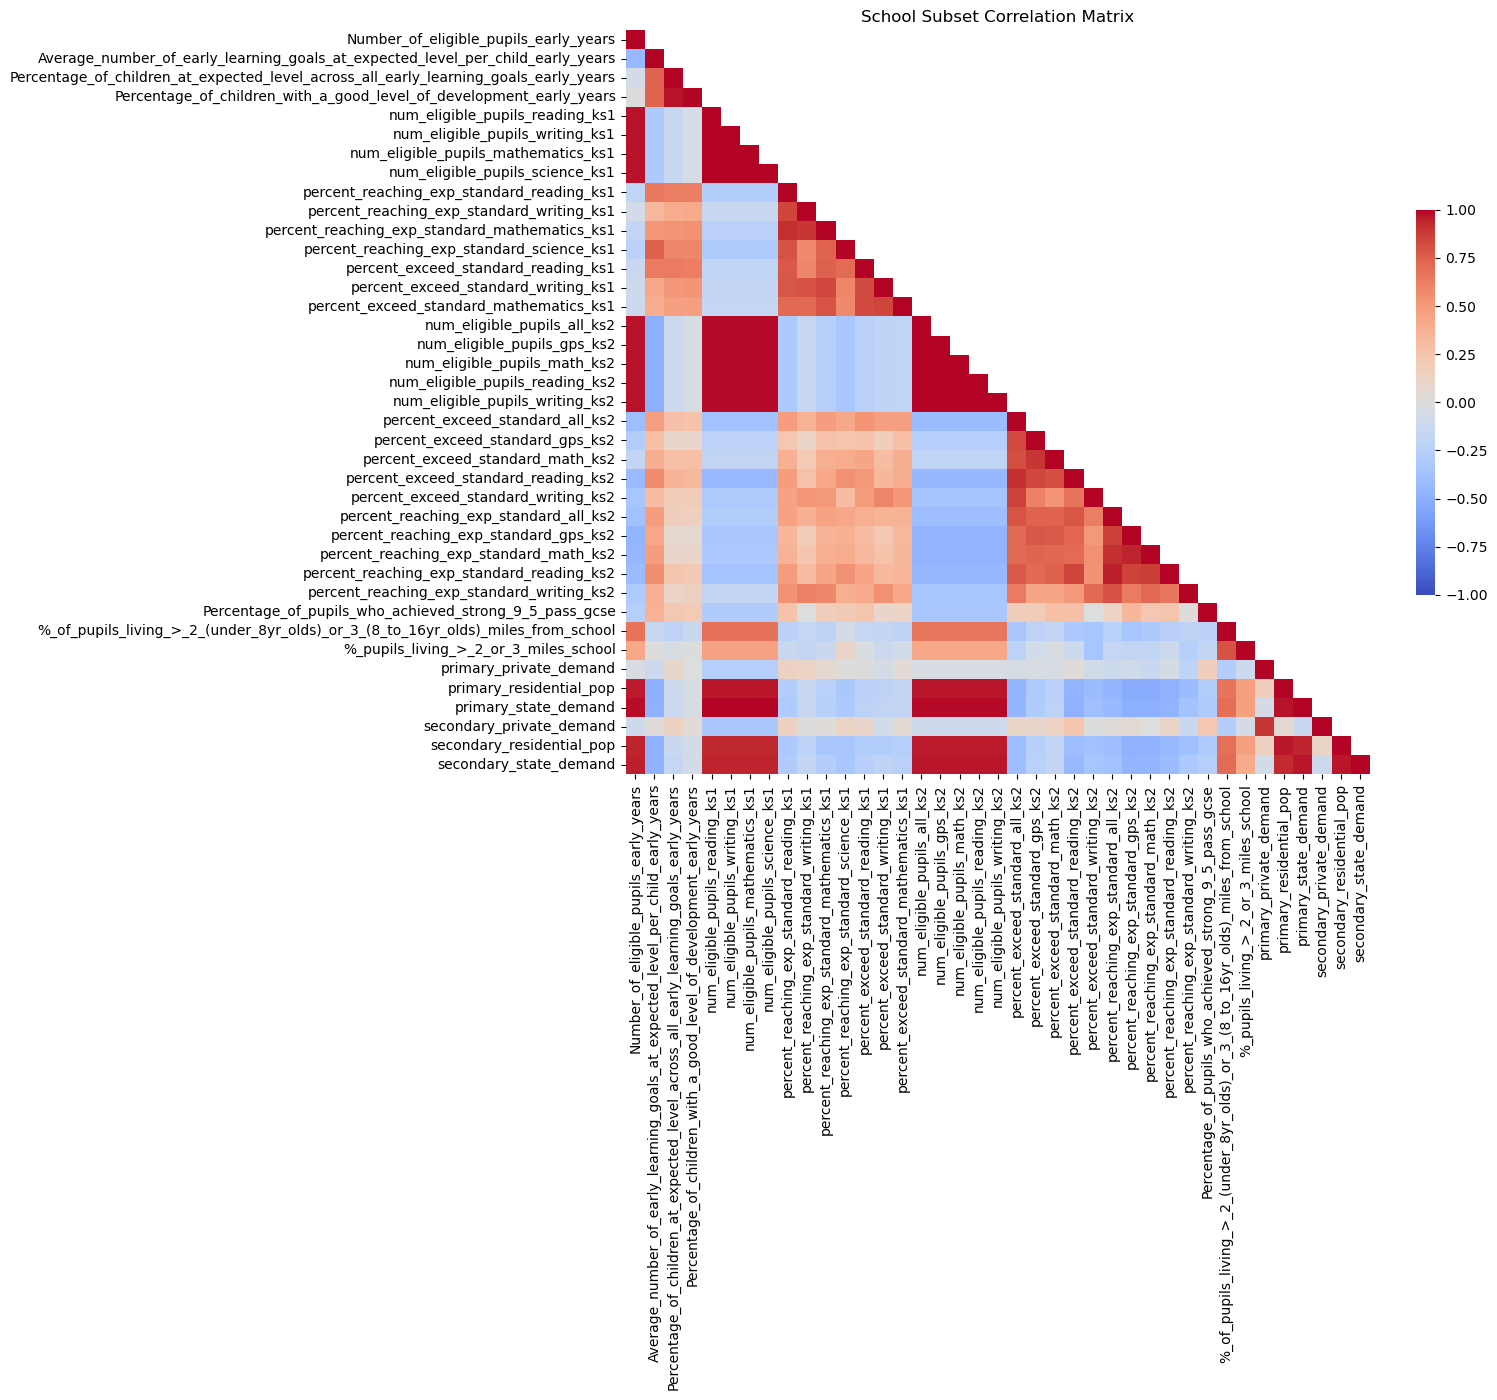

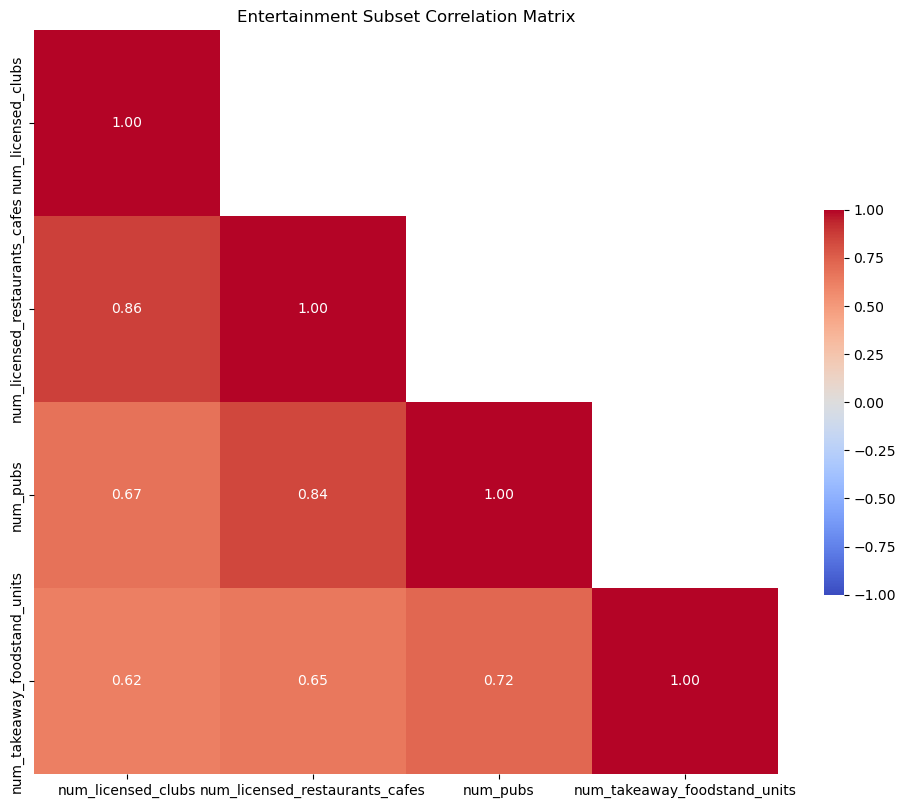

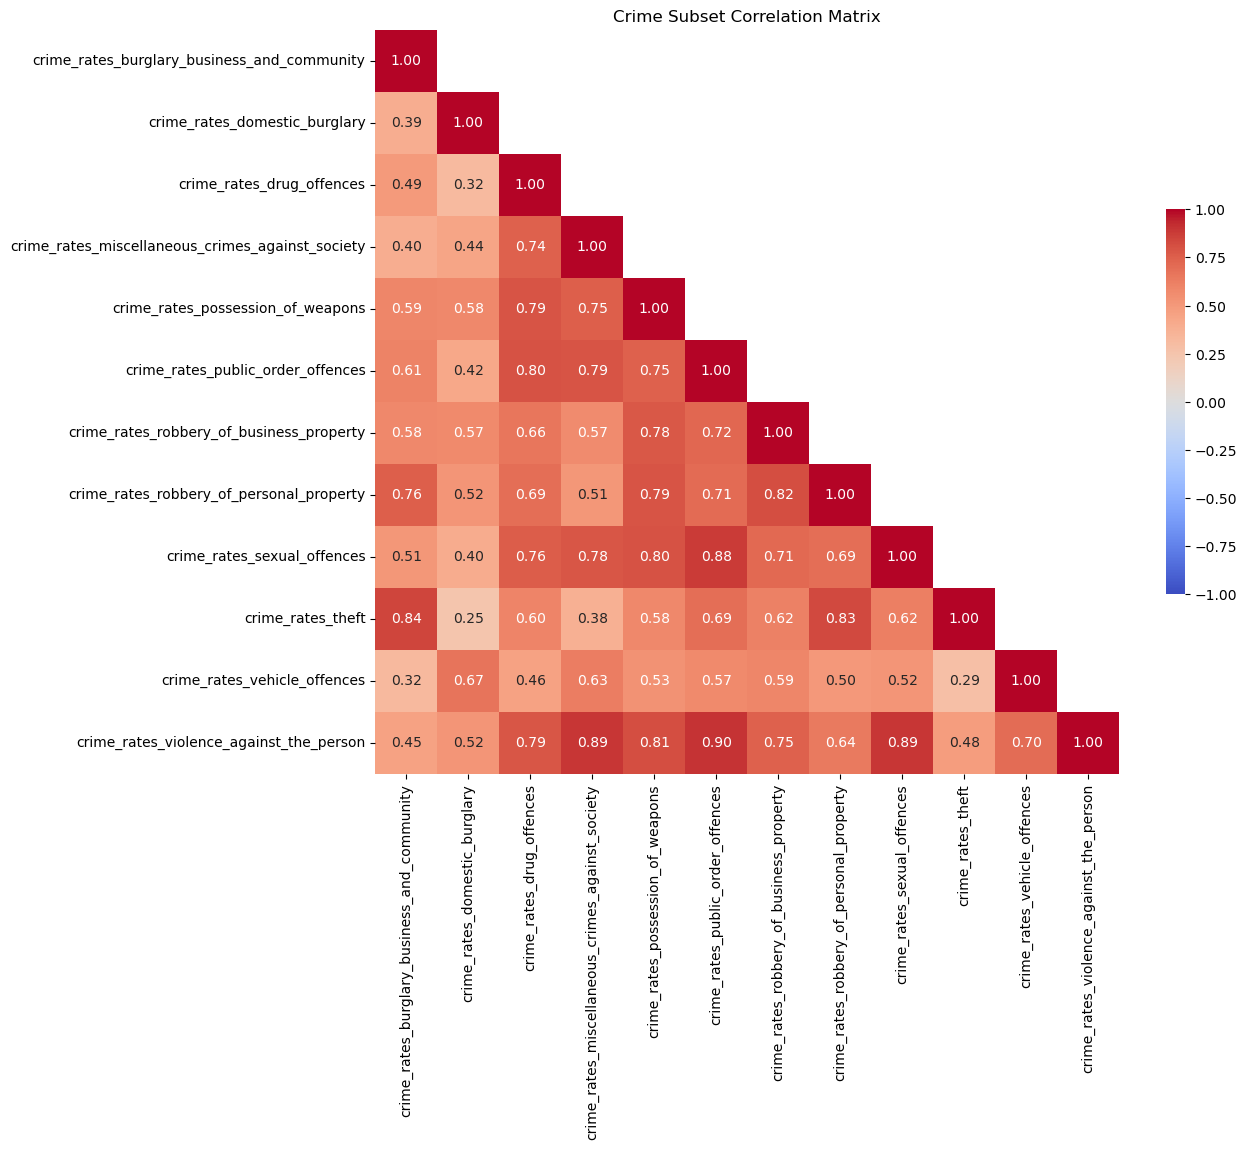

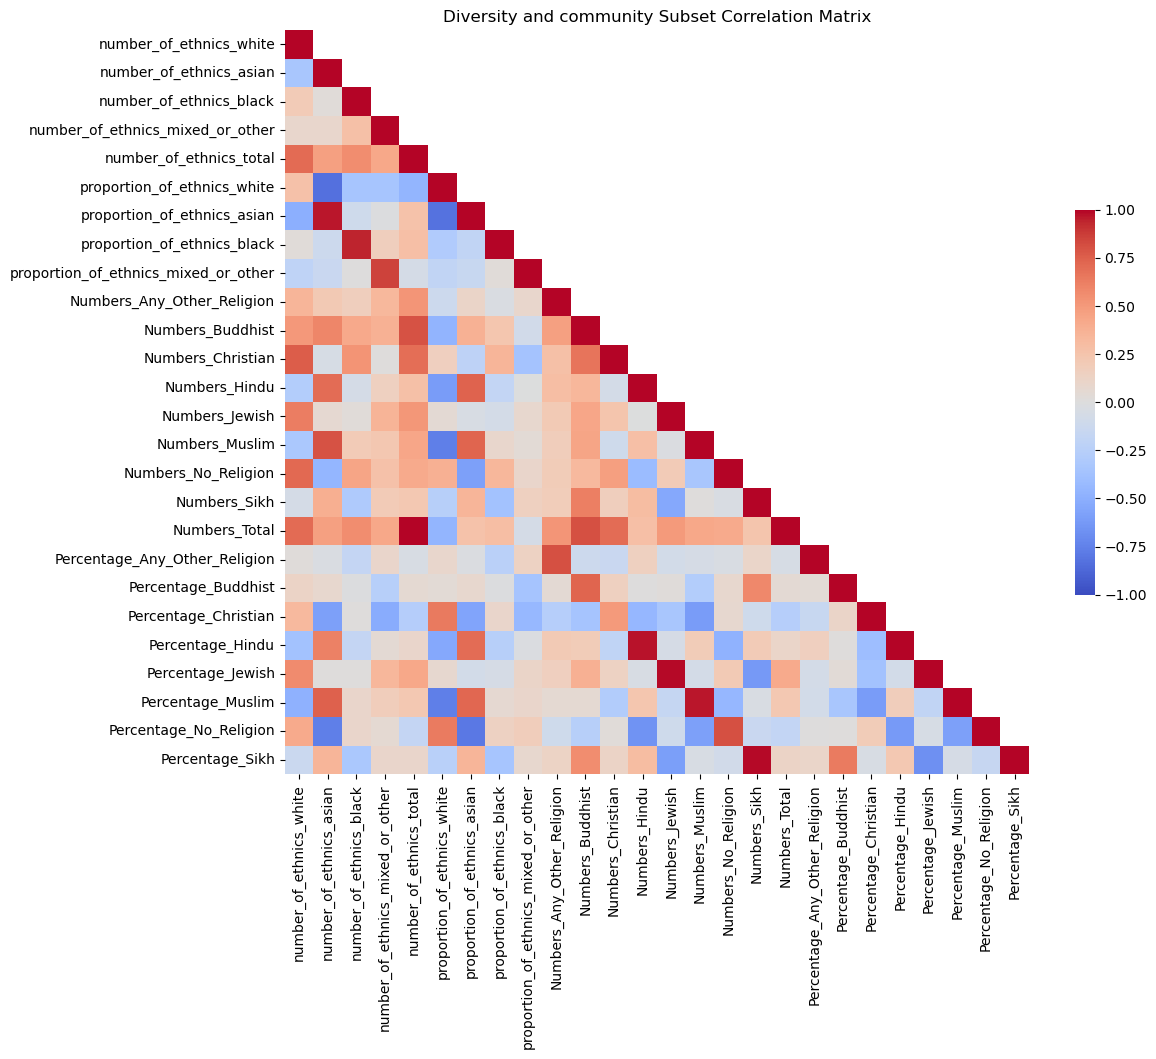

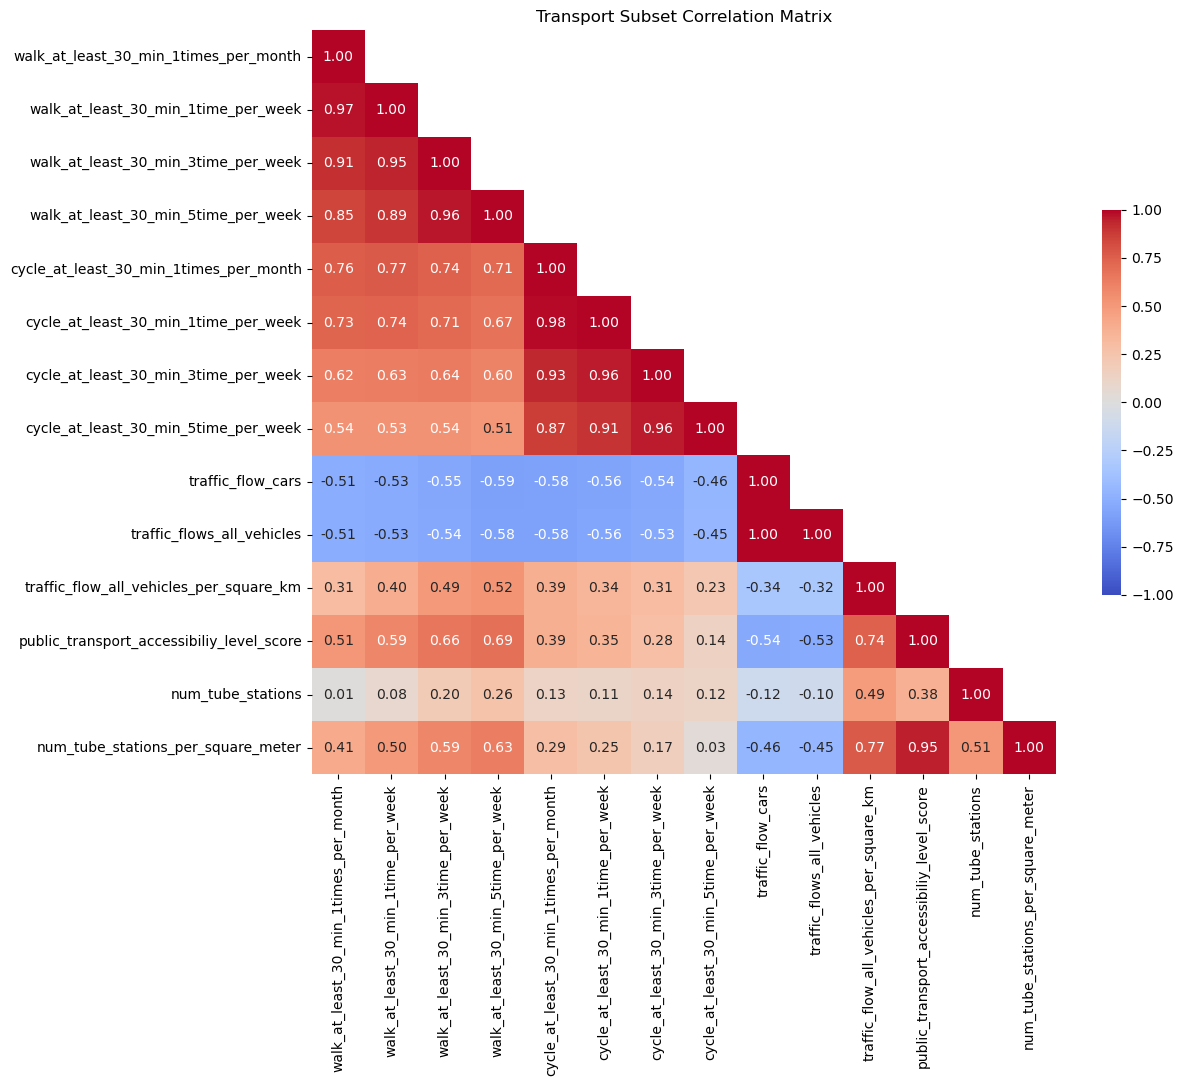

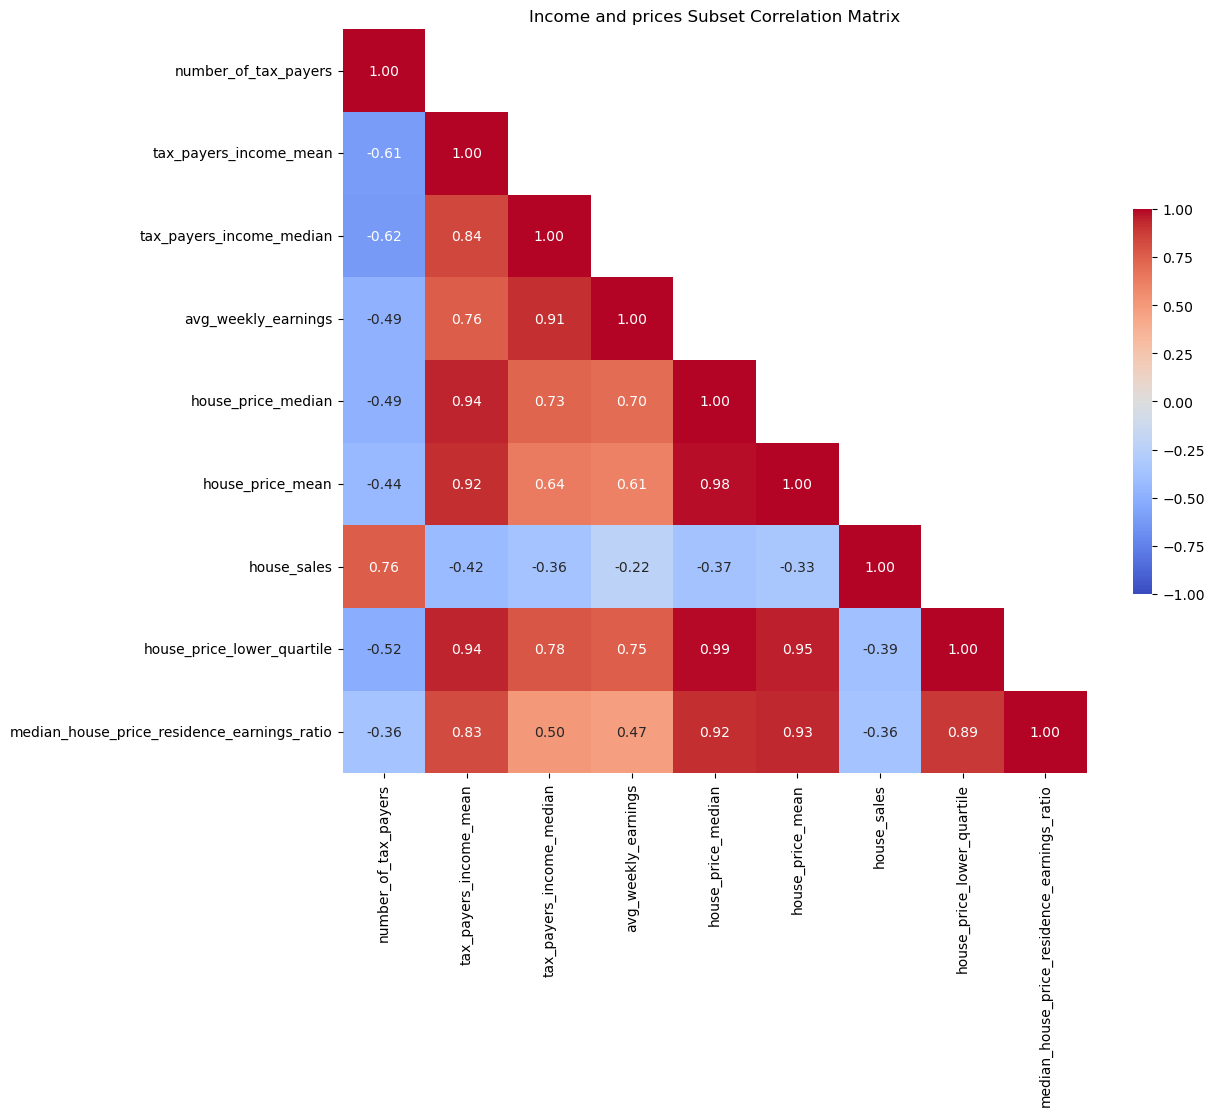

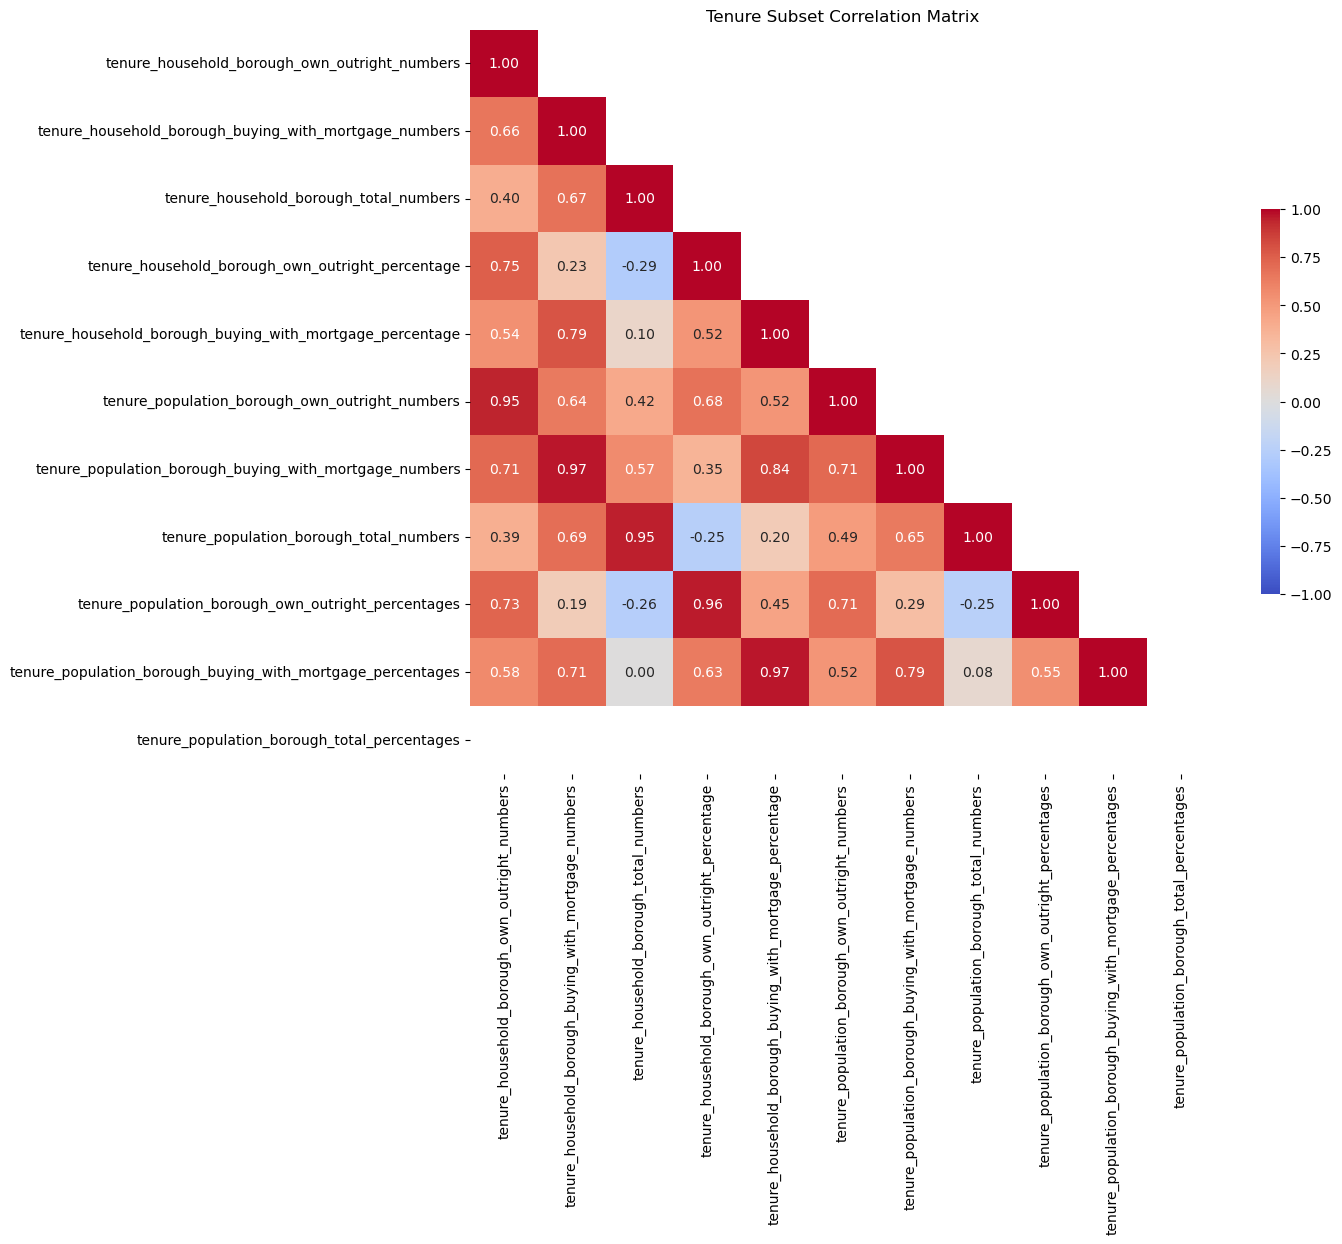

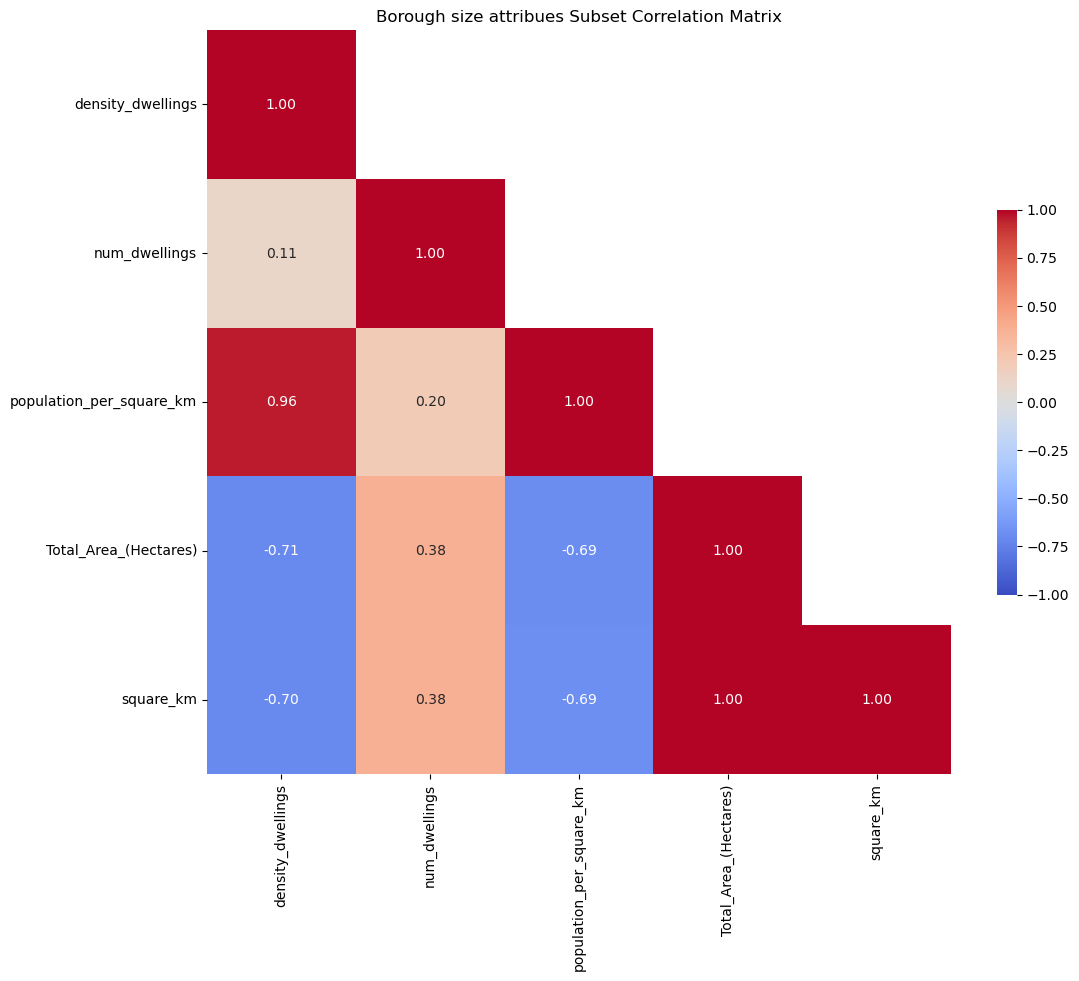

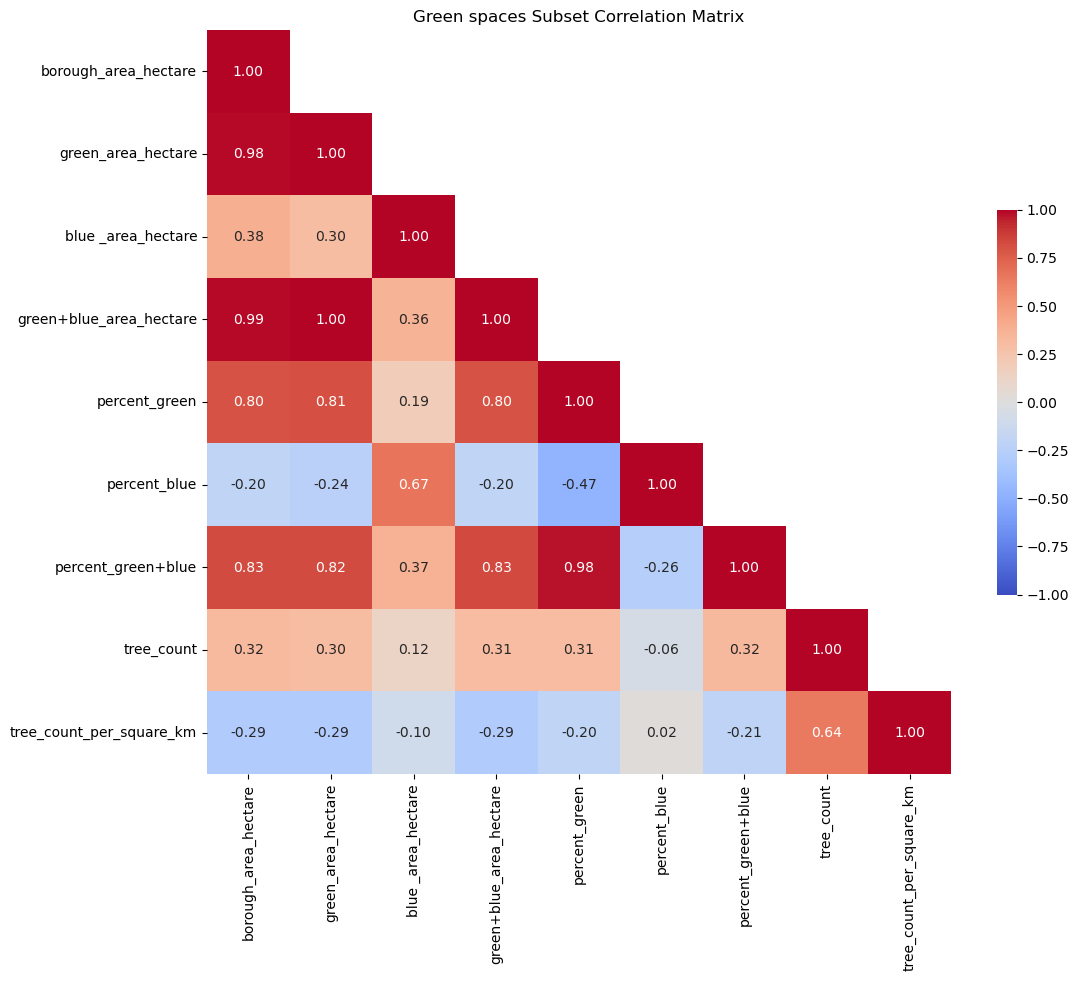

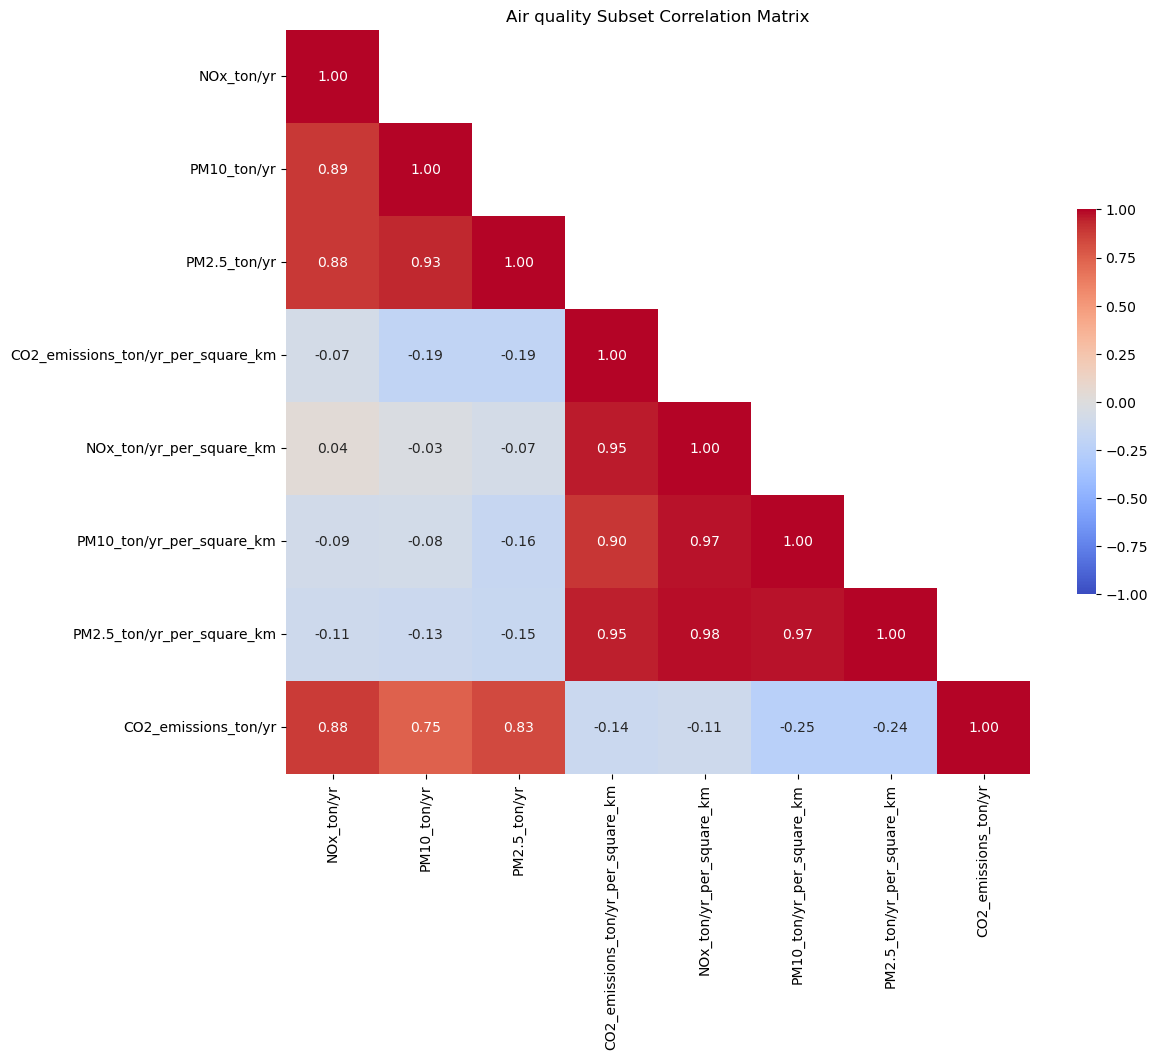

In [12]:
categories = [
    'School',
    'Entertainment',
    'Crime',
    'Diversity and Community',
    'Transport',
    'Income and Prices',
    'Tenure',
    'Borough Size Attribues',
    'Green Spaces',
    'Air Quality'
]

# Threshold for the number of columns to determine which function to apply
threshold = 20

# Loop through subset DataFrames and apply the appropriate function
for i, subset_df in enumerate(subset_dfs):
    num_columns = len(subset_df.columns)
    
    # Get the title word from the categories list
    title_word = categories[i]
    
    if num_columns > threshold:
        # Use plot_correlation_matrix for subsets with more than 20 columns
        plot_correlation_matrix(subset_df, title_word)
    else:
        # Use plot_correlation_matrix_annotate for subsets with 20 or fewer columns
        plot_correlation_matrix_annotate(subset_df, title_word)
    
    print("\n")
    print("\n")


In [13]:
# Print column names in each subset to help the feature reduction process 

# Iterate through subset DataFrames and print subset name and column names
for subset_name, subset_df in subset_dict.items():
    print(subset_name)
    print('Column names:')
    for column_name in subset_df.columns:
        print(column_name)
    print('\n')  # Print a line break between subsets

School
Column names:
borough_name
year
Number_of_eligible_pupils_early_years
Average_number_of_early_learning_goals_at_expected_level_per_child_early_years
Percentage_of_children_at_expected_level_across_all_early_learning_goals_early_years
Percentage_of_children_with_a_good_level_of_development_early_years
num_eligible_pupils_reading_ks1
num_eligible_pupils_writing_ks1
num_eligible_pupils_mathematics_ks1
num_eligible_pupils_science_ks1
percent_reaching_exp_standard_reading_ks1
percent_reaching_exp_standard_writing_ks1
percent_reaching_exp_standard_mathematics_ks1
percent_reaching_exp_standard_science_ks1
percent_exceed_standard_reading_ks1
percent_exceed_standard_writing_ks1
percent_exceed_standard_mathematics_ks1
num_eligible_pupils_all_ks2
num_eligible_pupils_gps_ks2
num_eligible_pupils_math_ks2
num_eligible_pupils_reading_ks2
num_eligible_pupils_writing_ks2
percent_exceed_standard_all_ks2
percent_exceed_standard_gps_ks2
percent_exceed_standard_math_ks2
percent_exceed_standard_readi

borough_name  year  num_eligible_pupils_all_ks2  \
0  Barking and Dagenham  2022                       3046.0   
1  Barking and Dagenham  2021                       3166.0   
2  Barking and Dagenham  2020                       3410.0   
3  Barking and Dagenham  2019                       3499.0   
4  Barking and Dagenham  2018                          NaN   

   percent_exceed_standard_all_ks2  percent_exceed_standard_math_ks2  \
0                              6.0                              19.0   
1                              8.0                              25.0   
2                              9.0                              26.0   
3                             11.0                              30.0   
4                              NaN                               NaN   

   percent_reaching_exp_standard_all_ks2  \
0                                   58.0   
1                                   63.0   
2                                   67.0   
3                                   66.0   
4                                    NaN   

   percent_reaching_exp_standard_math_ks2  \
0                                    77.0   
1                                    81.0   
2                                    80.0   
3                                    80.0   
4                                     NaN   

   Percentage_of_pupils_who_achieved_strong_9_5_pass_gcse  \
0                                               50.6        
1                                               49.3        
2                                               47.2        
3                                               42.6        
4                                               40.4        

   %_pupils_living_>_2_or_3_miles_school  secondary_private_demand  ...  \
0                                    NaN                    717.00  ...   
1                                    NaN                    730.47  ...   
2                                   12.9                    776.06  ...   
3                                    NaN                    826.30  ...   
4                                    NaN                    875.85  ...   

   density_dwellings  square_km  population_per_square_km  green_area_hectare  \
0               19.6        NaN                       NaN             1481.78   
1               19.7      36.11                    5893.0                 NaN   
2               19.8        NaN                       NaN                 NaN   
3               20.1        NaN                       NaN                 NaN   
4                NaN        NaN                       NaN                 NaN   

   percent_green  tree_count  tree_count_per_square_km  NOx_ton/yr  \
0           39.2         NaN                       NaN         NaN   
1            NaN     20113.0                    557.03         NaN   
2            NaN         NaN                       NaN         NaN   
3            NaN         NaN                       NaN       746.3   
4            NaN         NaN                       NaN         NaN   

   NOx_ton/yr_per_square_km  PM10_ton/yr_per_square_km  
0                       NaN                        NaN  
1                       NaN                        NaN  
2                       NaN                        NaN  
3                     20.67                       5.67  
4                       NaN                        NaN  

[5 rows x 50 columns]

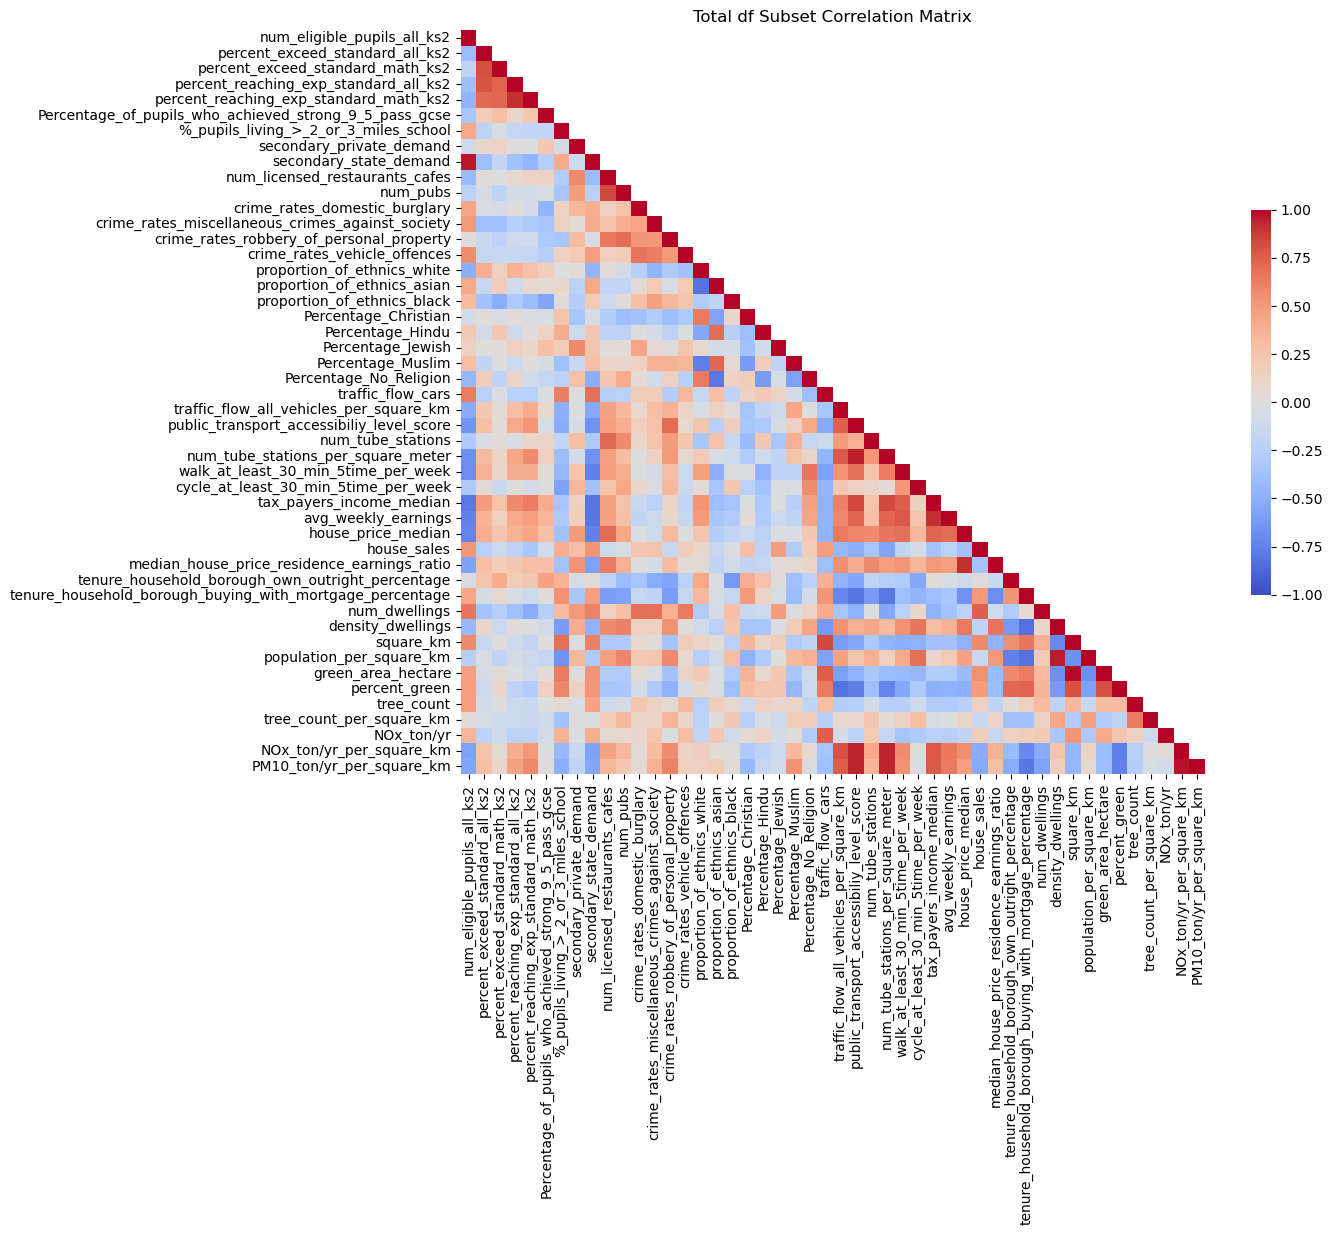

In [14]:
# Selecting a targeted subset of columns for subsequent data summarization tasks.
# At this stage, our goal is not to entirely eliminate multicollinearity, 
# but rather to streamline the dataset for initial analysis.
# We plan to revisit and address multicollinearity in more depth prior to the regression modeling phase.
# This preliminary reduction of features, due to high correlations within each category,
# enables more focused and insightful data summarization and visualization.
# By working with a condensed set of variables, we can uncover meaningful patterns and trends in the data more effectively.
selected_columns = ['borough_name', 'year',
                    'num_eligible_pupils_all_ks2',
                    'percent_exceed_standard_all_ks2',
                    'percent_exceed_standard_math_ks2',
                    'percent_reaching_exp_standard_all_ks2',
                    'percent_reaching_exp_standard_math_ks2',
                    'Percentage_of_pupils_who_achieved_strong_9_5_pass_gcse',
                    '%_pupils_living_>_2_or_3_miles_school', 
                    'secondary_private_demand', 'secondary_state_demand',
                    
                    'num_licensed_restaurants_cafes', 'num_pubs',
                    
                    'crime_rates_domestic_burglary',
                    'crime_rates_miscellaneous_crimes_against_society',
                    'crime_rates_robbery_of_personal_property',
                    'crime_rates_vehicle_offences',
                    
                    'proportion_of_ethnics_white', 'proportion_of_ethnics_asian',
                    'proportion_of_ethnics_black',
                    'Percentage_Christian', 'Percentage_Hindu', 'Percentage_Jewish',
                    'Percentage_Muslim', 'Percentage_No_Religion',
                    
                    'traffic_flow_cars','traffic_flow_all_vehicles_per_square_km', 
                    'public_transport_accessibiliy_level_score','num_tube_stations', 
                    'num_tube_stations_per_square_meter', 'walk_at_least_30_min_5time_per_week', 
                    'cycle_at_least_30_min_5time_per_week',
                    
                    'tax_payers_income_median', 'avg_weekly_earnings',
                    'house_price_median', 'house_sales',
                    'median_house_price_residence_earnings_ratio',
                    
                    'tenure_household_borough_own_outright_percentage',
                    'tenure_household_borough_buying_with_mortgage_percentage',
                    
                    'num_dwellings', 'density_dwellings', 'square_km',
                    'population_per_square_km',
                    
                    'green_area_hectare', 'percent_green', 'tree_count', 
                    'tree_count_per_square_km', 
                    
                    'NOx_ton/yr', 'NOx_ton/yr_per_square_km', 'PM10_ton/yr_per_square_km']

# Create a reduced DataFrame with selected columns
reduced_df = df[selected_columns]
reduced_df.head()

plot_correlation_matrix(reduced_df, 'Total df')

## Data summarisation and visualisation

In [15]:
# Let's create a copy of our reduced df and call it data
data = reduced_df.copy()

In [16]:
# Selecting key variables for summary statistics
key_vars = ['house_sales', 'house_price_median']

# Computing summary statistics for the selected variables
summary_stats = data[key_vars].describe().apply(lambda x: round(x, 3)).T
summary_stats

count        mean         std       min        25%  \
house_sales         132.0    2844.909    1098.458     114.0    2141.25   
house_price_median   66.0  522716.439  204476.558  290000.0  395000.00   

                         50%        75%        max  
house_sales           2715.5    3475.25     5907.0  
house_price_median  462500.0  538812.50  1315000.0

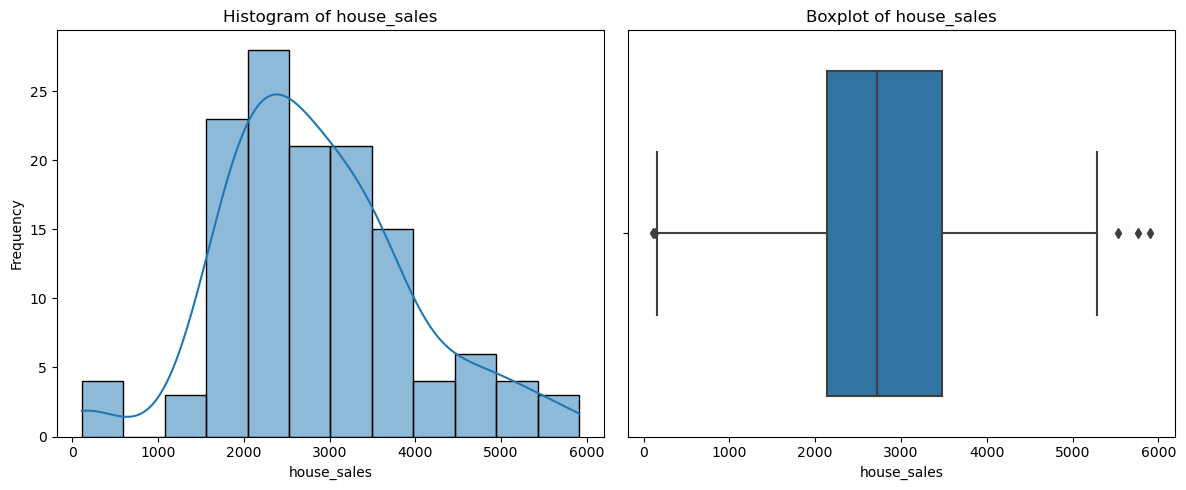

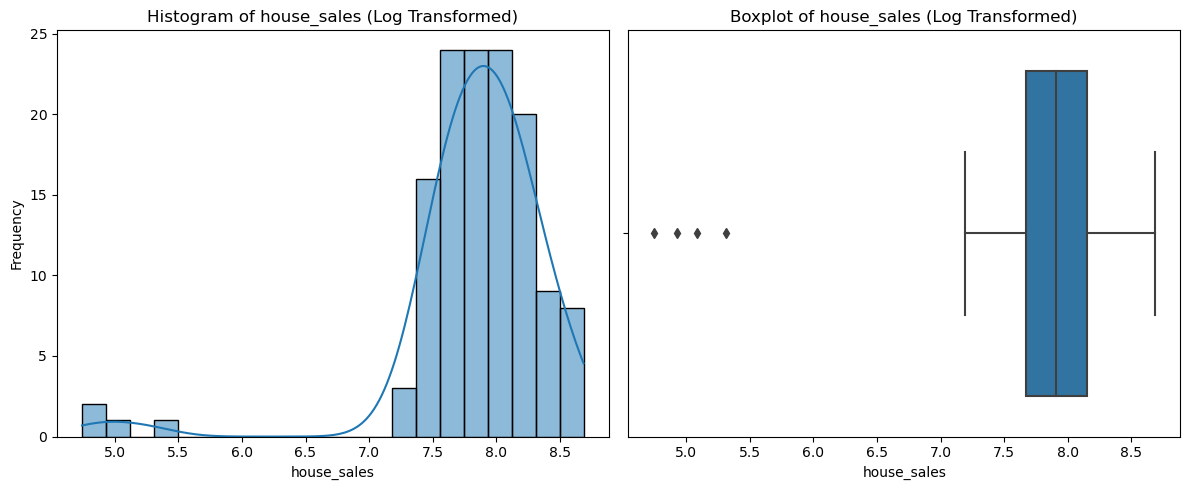

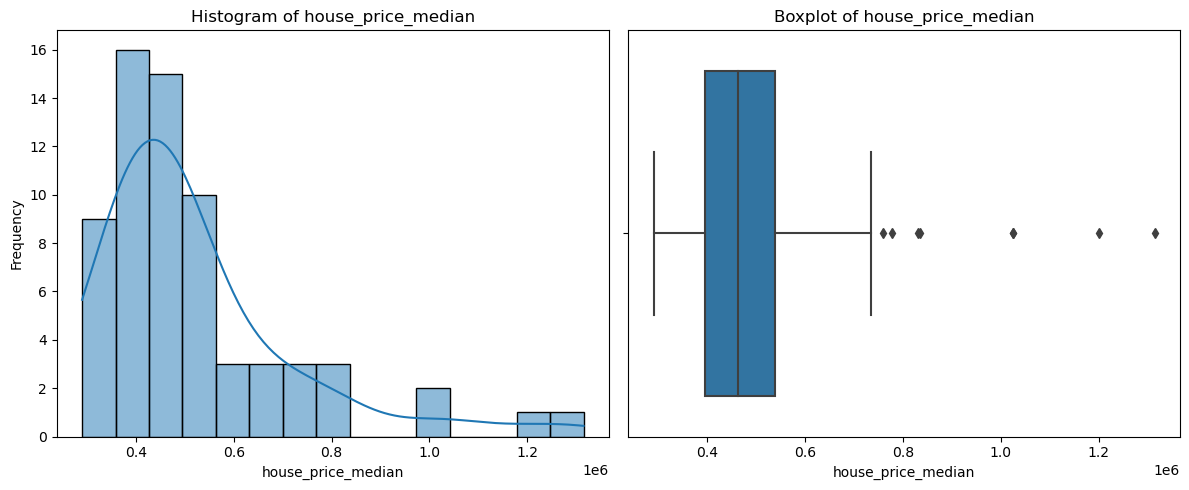

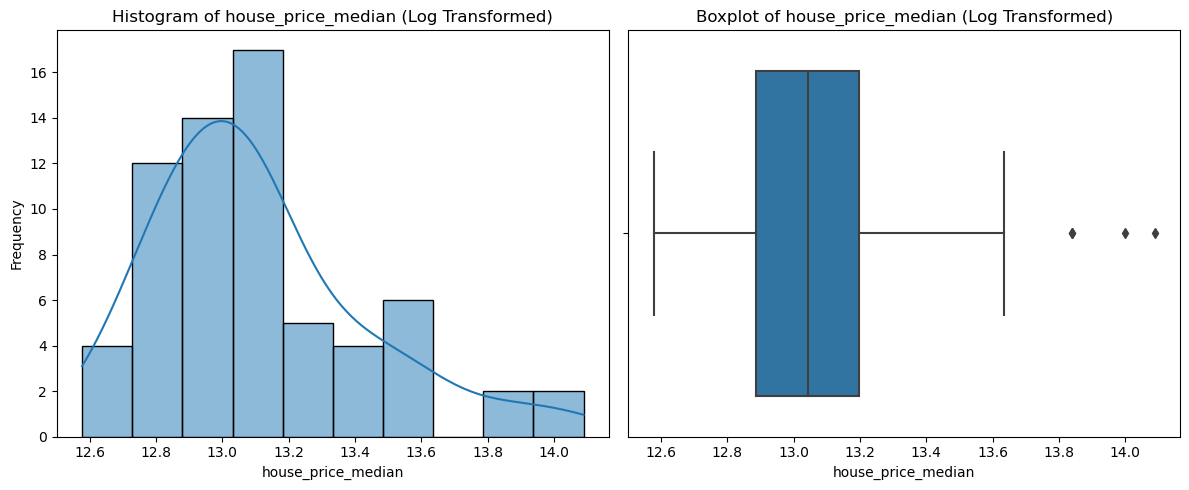

In [17]:
# Create a function to plot histogram and boxplot for a given variable
def plot_distribution(data, variable, transformed=False):
    """
    Plots a histogram and boxplot for the given variable.

    Parameters:
        data (DataFrame): The dataset containing the variable.
        variable (str): The name of the variable to be plotted.
        transformed (bool): Whether to apply natural logarithm transformation (default: False).
    """
    if transformed:
        # Applying natural logarithm transformation to the variable
        data = np.log(data[variable].dropna() + 1)  # Adding 1 to avoid log(0)
        title_suffix = ' (Log Transformed)'
    else:
        data = data[variable].dropna()
        title_suffix = ''

    # Setting up the matplotlib figure (2 plots side by side)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plotting histogram
    sns.histplot(data, kde=True, ax=ax1)
    ax1.set_title(f'Histogram of {variable}{title_suffix}')
    ax1.set_xlabel(variable)
    ax1.set_ylabel('Frequency')

    # Plotting boxplot
    sns.boxplot(x=data, ax=ax2)
    ax2.set_title(f'Boxplot of {variable}{title_suffix}')
    ax2.set_xlabel(variable)

    plt.tight_layout()
    plt.show()

# Example usage:

# Plotting for 'house_sales'
plot_distribution(data, 'house_sales')

# Plotting for 'house_sales' with log transformation
plot_distribution(data, 'house_sales', transformed=True)

# Plotting for 'house_price_median'
plot_distribution(data, 'house_price_median')

# Plotting for 'house_price_median' with log transformation
plot_distribution(data, 'house_price_median', transformed=True)

For Knight Frank, understanding the distribution in house sales and median house prices shows the underlying patterns of market activity and housing affordability across London's diverse boroughs.

The normalization of house sales and price distributions takes it a step further by enhancing the robustness of our statistical analyses. For Knight Frank, this equates to providing more accurate market insights and a solid foundation for predictive models. Moreover, this step ensures that our clients are presented with data that truly reflects the central tendencies and variability of the London real estate market, devoid of distortions caused by extreme values. This detailed understanding of the distribution characteristics directly supports our objective to deliver tailored, evidence-based guidance to our clients.

Before applying logarithmic transformations, our analysis revealed that the house sales and median house prices within the London real estate market were characterized by right-skewed distributions. Specifically, the house sales data presented a pronounced tail towards higher values, indicating a concentration of frequent, but lower-value transactions alongside a few exceptionally high-value sales. The median house prices exhibited a similar pattern, with a majority of transactions clustered at the lower end of the price spectrum, yet peppered with notable outliers that signify a number of substantially higher-priced sales. These initial findings highlighted the variability within the market and the presence of extreme values that could potentially skew our interpretation of the data.

After normalizing the data with logarithmic transformations, we observed a remarkable shift towards more symmetrical distributions. The transformed house sales data now more closely align with a normal distribution, minimizing the effect of outliers and offering a clearer view of the typical sales values. Similarly, the median house prices, once heavily skewed, now display a distribution that allows for more straightforward comparison across different boroughs and time periods. These adjustments are crucial as they provide us with a more accurate reflection of the market, facilitating the derivation of insights that are less influenced by extreme values. 

In [18]:
# Create groups based on categories
# We will create box plots for each variables acorss each borough 
# Note that for variables were we only have one year, there will be no distribution 

school_vars = ['num_eligible_pupils_all_ks2',
                    'percent_exceed_standard_all_ks2',
                    'percent_exceed_standard_math_ks2',
                    'percent_reaching_exp_standard_all_ks2',
                    'percent_reaching_exp_standard_math_ks2',
                    'Percentage_of_pupils_who_achieved_strong_9_5_pass_gcse',
                    '%_pupils_living_>_2_or_3_miles_school', 
                    'secondary_private_demand', 'secondary_state_demand']

entertainment_vars = ['num_licensed_restaurants_cafes', 'num_pubs']

crime_vars = ['crime_rates_domestic_burglary',
                    'crime_rates_miscellaneous_crimes_against_society',
                    'crime_rates_robbery_of_personal_property',
                    'crime_rates_vehicle_offences']

diversity_community_vars = ['proportion_of_ethnics_white', 'proportion_of_ethnics_asian',
                    'proportion_of_ethnics_black',
                    'Percentage_Christian', 'Percentage_Hindu', 'Percentage_Jewish',
                    'Percentage_Muslim', 'Percentage_No_Religion']

transport_vars = ['traffic_flow_cars','traffic_flow_all_vehicles_per_square_km', 
                    'public_transport_accessibiliy_level_score','num_tube_stations', 
                    'num_tube_stations_per_square_meter', 'walk_at_least_30_min_5time_per_week', 
                    'cycle_at_least_30_min_5time_per_week']

market_vars = ['tax_payers_income_median', 'avg_weekly_earnings',
                    'house_price_median', 'house_sales',
                    'median_house_price_residence_earnings_ratio']

tenure_vars = ['tenure_household_borough_own_outright_percentage',
                    'tenure_household_borough_buying_with_mortgage_percentage']
                    
borough_size_vars = ['num_dwellings', 'density_dwellings', 'square_km',
                    'population_per_square_km']

green_spaces_vars = ['green_area_hectare', 'percent_green', 'tree_count', 
                    'tree_count_per_square_km']

air_quality_vars = ['NOx_ton/yr', 'NOx_ton/yr_per_square_km', 'PM10_ton/yr_per_square_km']

In [38]:
# # Plotting school-related metrics across boroughs
# plt.figure(figsize=(15, 80))

# for i, var in enumerate(school_vars, 1):
#     plt.subplot(9, 1, i)
#     sns.boxplot(x='borough_name', y=var, data=data)
#     plt.xticks(rotation=90);
#     plt.title(var);
#     plt.ylabel('');
#     plt.xlabel('');

# plt.tight_layout();
# plt.show();

In [39]:
# # Plotting surrounding entertainment attributes across boroughs
# plt.figure(figsize=(15, 15))

# for i, var in enumerate(entertainment_vars, 1):
#     plt.subplot(2, 1, i)
#     sns.boxplot(x='borough_name', y=var, data=data)
#     plt.xticks(rotation=90);
#     plt.title(var);
#     plt.ylabel('');
#     plt.xlabel('');

# plt.tight_layout();
# plt.show();

In [40]:
# # Plotting crime attributes across boroughs
# plt.figure(figsize=(15, 32))

# for i, var in enumerate(crime_vars, 1):
#     plt.subplot(4, 1, i)
#     sns.boxplot(x='borough_name', y=var, data=data)
#     plt.xticks(rotation=90);
#     plt.title(var);
#     plt.ylabel('');
#     plt.xlabel('');

# plt.tight_layout();
# plt.show();

In [41]:
# # Plotting diversity and community attributes across boroughs
# plt.figure(figsize=(15, 60))

# for i, var in enumerate(diversity_community_vars, 1):
#     plt.subplot(8, 1, i)
#     sns.boxplot(x='borough_name', y=var, data=data)
#     plt.xticks(rotation=90);
#     plt.title(var);
#     plt.ylabel('');
#     plt.xlabel('');

# plt.tight_layout();
# plt.show();

In [42]:
# # Plotting transport attributes across boroughs
# plt.figure(figsize=(15, 55))

# for i, var in enumerate(transport_vars, 1):
#     plt.subplot(7, 1, i)
#     sns.boxplot(x='borough_name', y=var, data=data)
#     plt.xticks(rotation=90);
#     plt.title(var);
#     plt.ylabel('');
#     plt.xlabel('');

# plt.tight_layout();
# plt.show();

In [43]:
# # Plotting market attributes across boroughs
# plt.figure(figsize=(15, 40))

# for i, var in enumerate(market_vars, 1):
#     plt.subplot(5, 1, i)
#     sns.boxplot(x='borough_name', y=var, data=data)
#     plt.xticks(rotation=90);
#     plt.title(var);
#     plt.ylabel('');
#     plt.xlabel('');

# plt.tight_layout();
# plt.show();

In [44]:
# # Plotting tenure attributes across boroughs
# plt.figure(figsize=(15, 15))

# for i, var in enumerate(tenure_vars, 1):
#     plt.subplot(2, 1, i)
#     sns.boxplot(x='borough_name', y=var, data=data)
#     plt.xticks(rotation=90);
#     plt.title(var);
#     plt.ylabel('');
#     plt.xlabel('');

# plt.tight_layout();
# plt.show();

In [45]:
# # Plotting borough size attributes across boroughs
# plt.figure(figsize=(15, 30))

# for i, var in enumerate(borough_size_vars, 1):
#     plt.subplot(4, 1, i)
#     sns.boxplot(x='borough_name', y=var, data=data)
#     plt.xticks(rotation=90);
#     plt.title(var);
#     plt.ylabel('');
#     plt.xlabel('');

# plt.tight_layout();
# plt.show();

In [46]:
# # Plotting green space attributes across boroughs
# plt.figure(figsize=(15, 30))

# for i, var in enumerate(green_spaces_vars, 1):
#     plt.subplot(4, 1, i)
#     sns.boxplot(x='borough_name', y=var, data=data)
#     plt.xticks(rotation=90);
#     plt.title(var);
#     plt.ylabel('');
#     plt.xlabel('');

# plt.tight_layout();
# plt.show();

In [47]:
# # Plotting air quality attributes across boroughs
# plt.figure(figsize=(15, 20))

# for i, var in enumerate(air_quality_vars, 1):
#     plt.subplot(3, 1, i)
#     sns.boxplot(x='borough_name', y=var, data=data)
#     plt.xticks(rotation=90);
#     plt.title(var);
#     plt.ylabel('');
#     plt.xlabel('');

# plt.tight_layout();
# plt.show();

In [48]:
# # Plotting air quality attributes across boroughs using vertical bar plots
# plt.figure(figsize=(15, 320))

# for i, var in enumerate(list(data.columns)[2:], 1):
#     plt.subplot(len(list(data.columns)[2:]), 1, i)  # Adjust the grid dimensions as necessary
#     sns.barplot(x='borough_name', y=var, data=data)
#     plt.xticks(rotation=90);
#     plt.title(var);
#     plt.ylabel('');
#     plt.xlabel('');

# plt.tight_layout();
# plt.show();


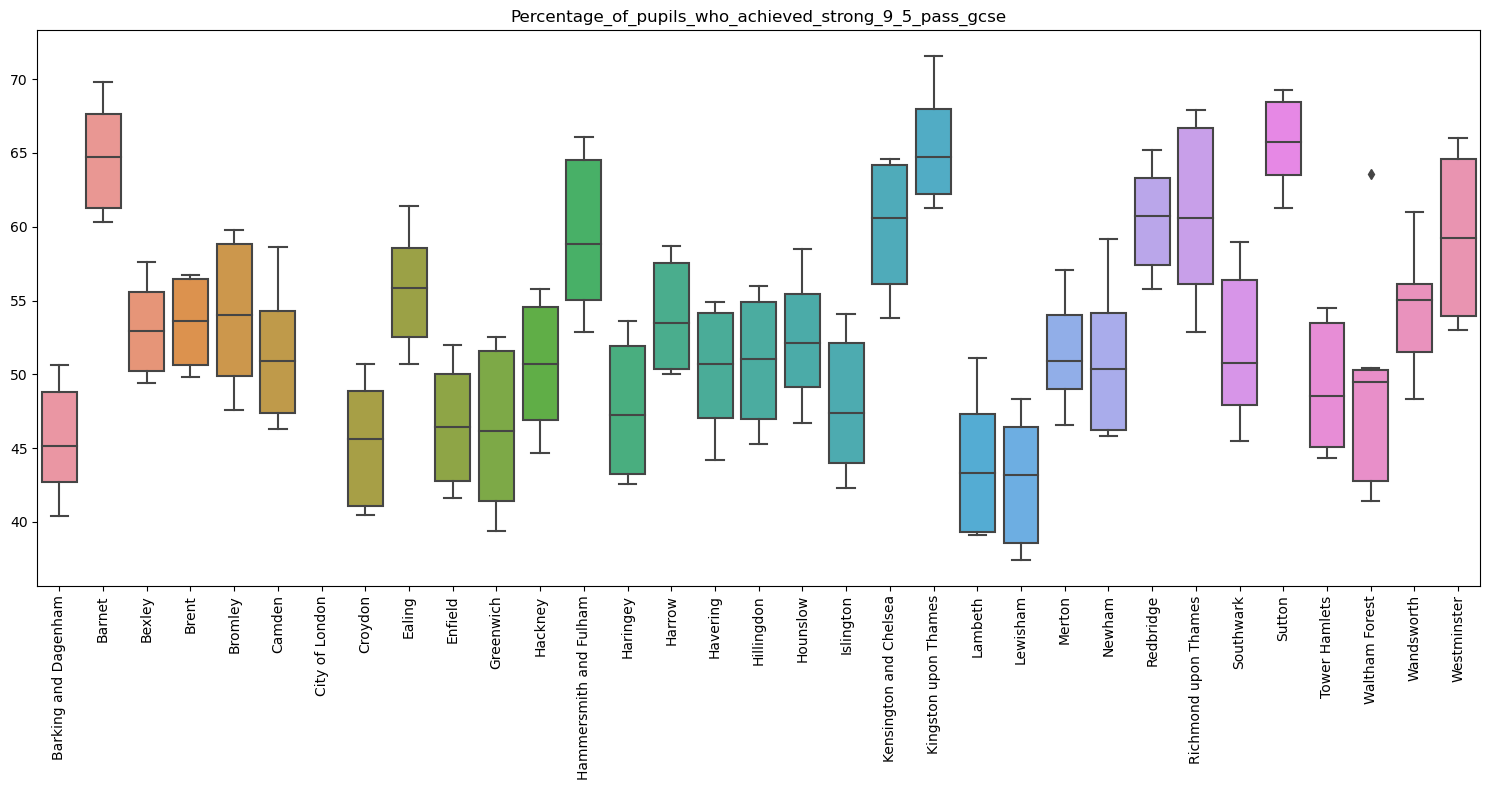

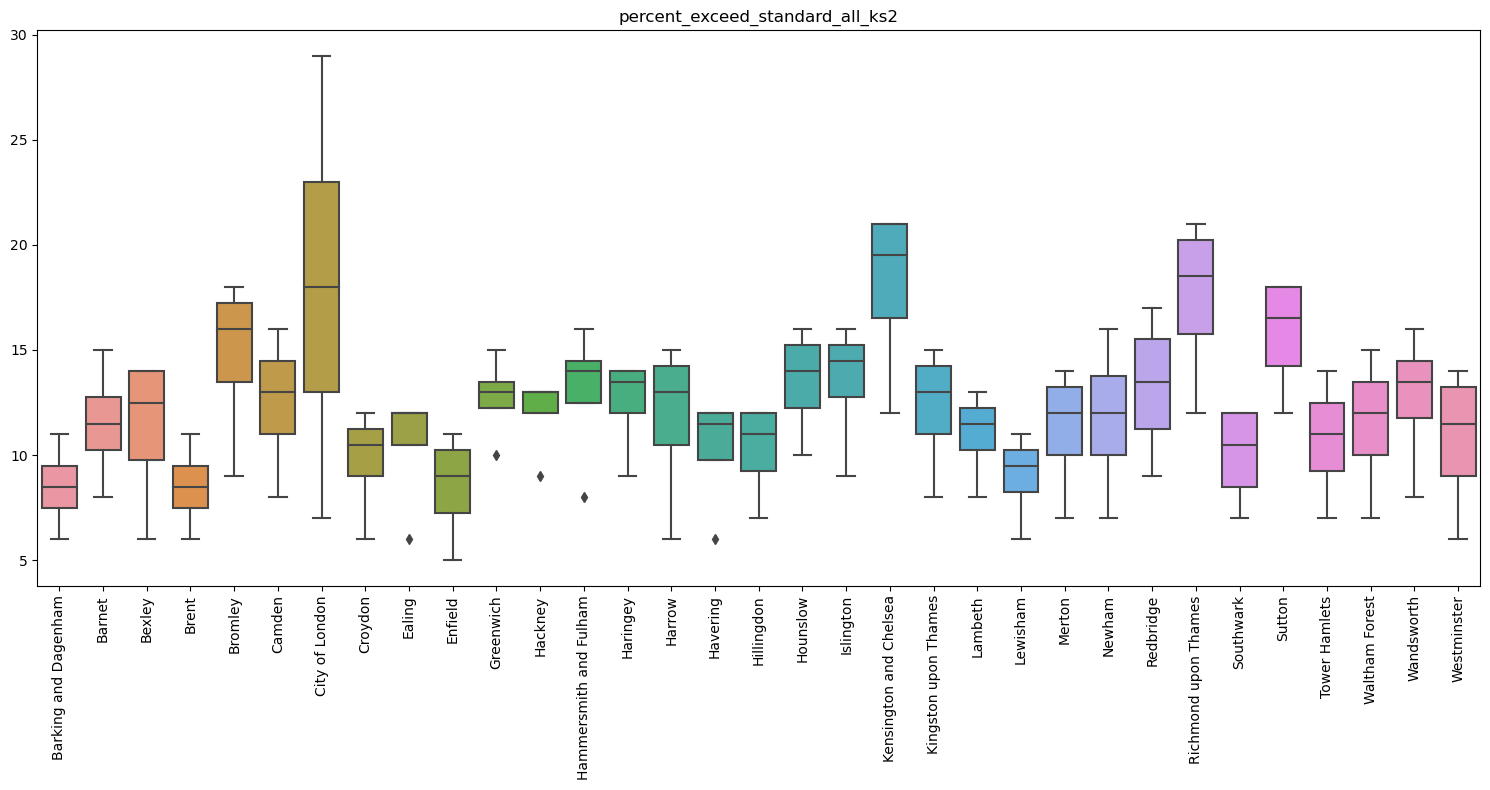

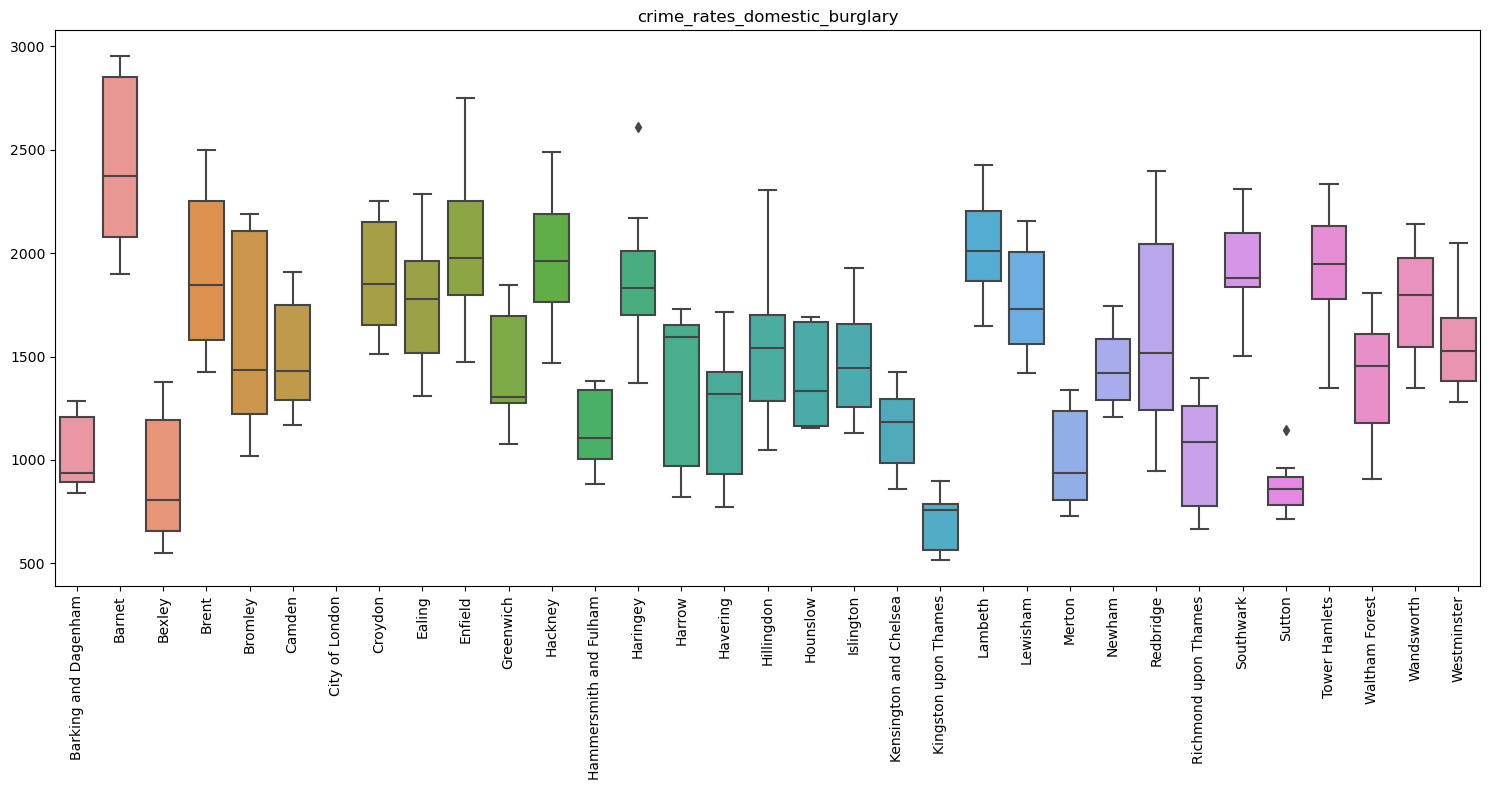

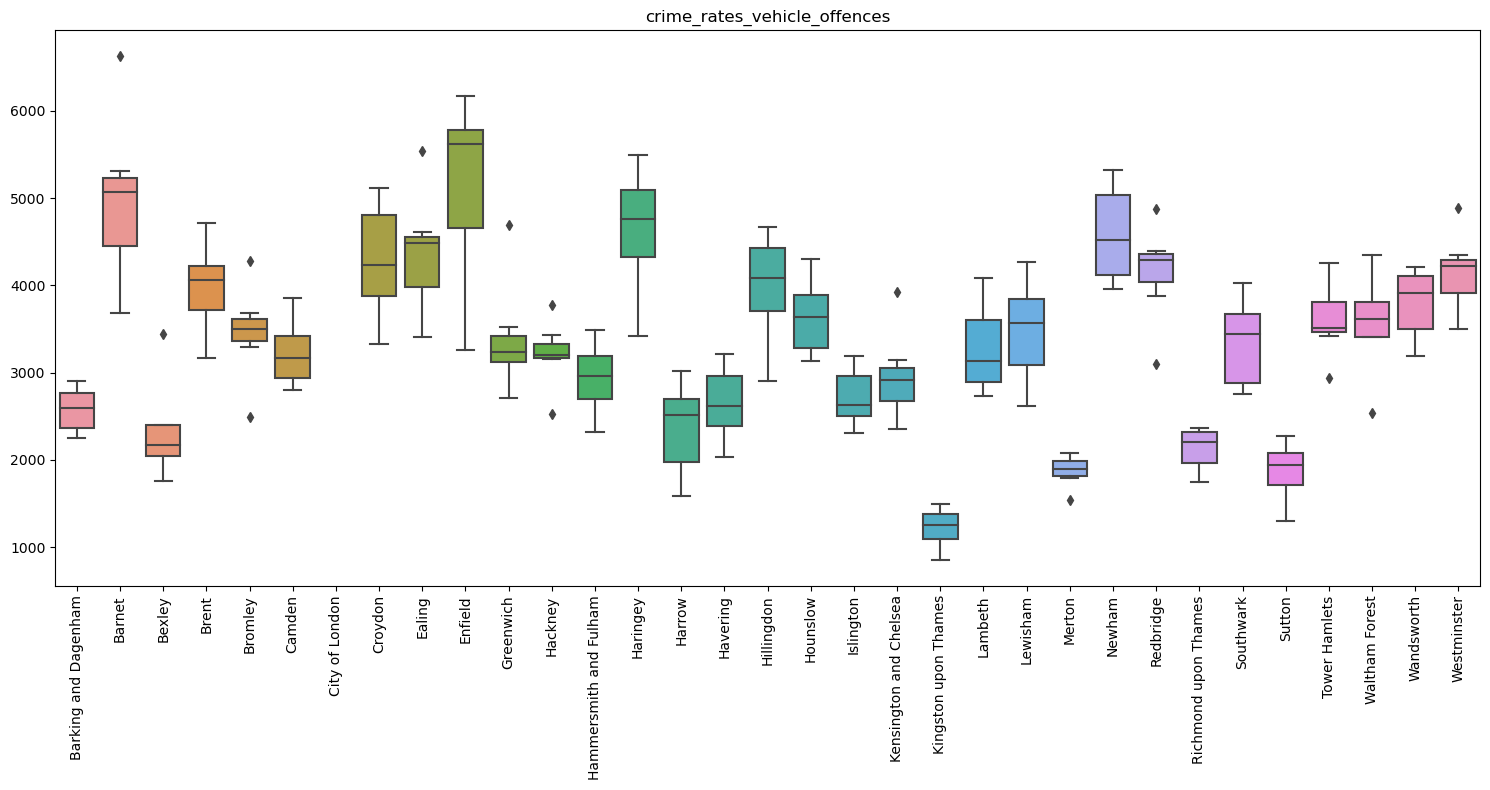

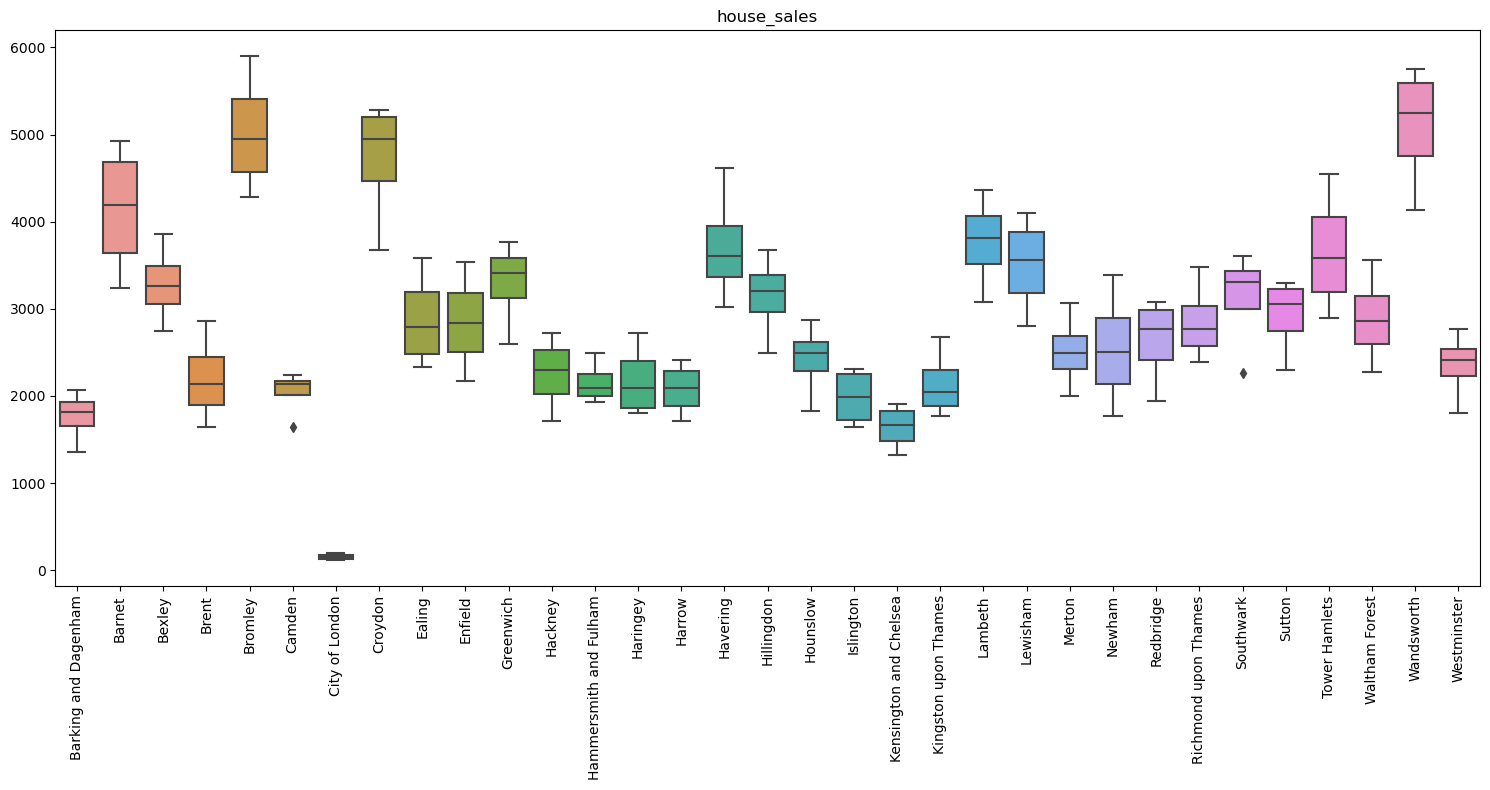

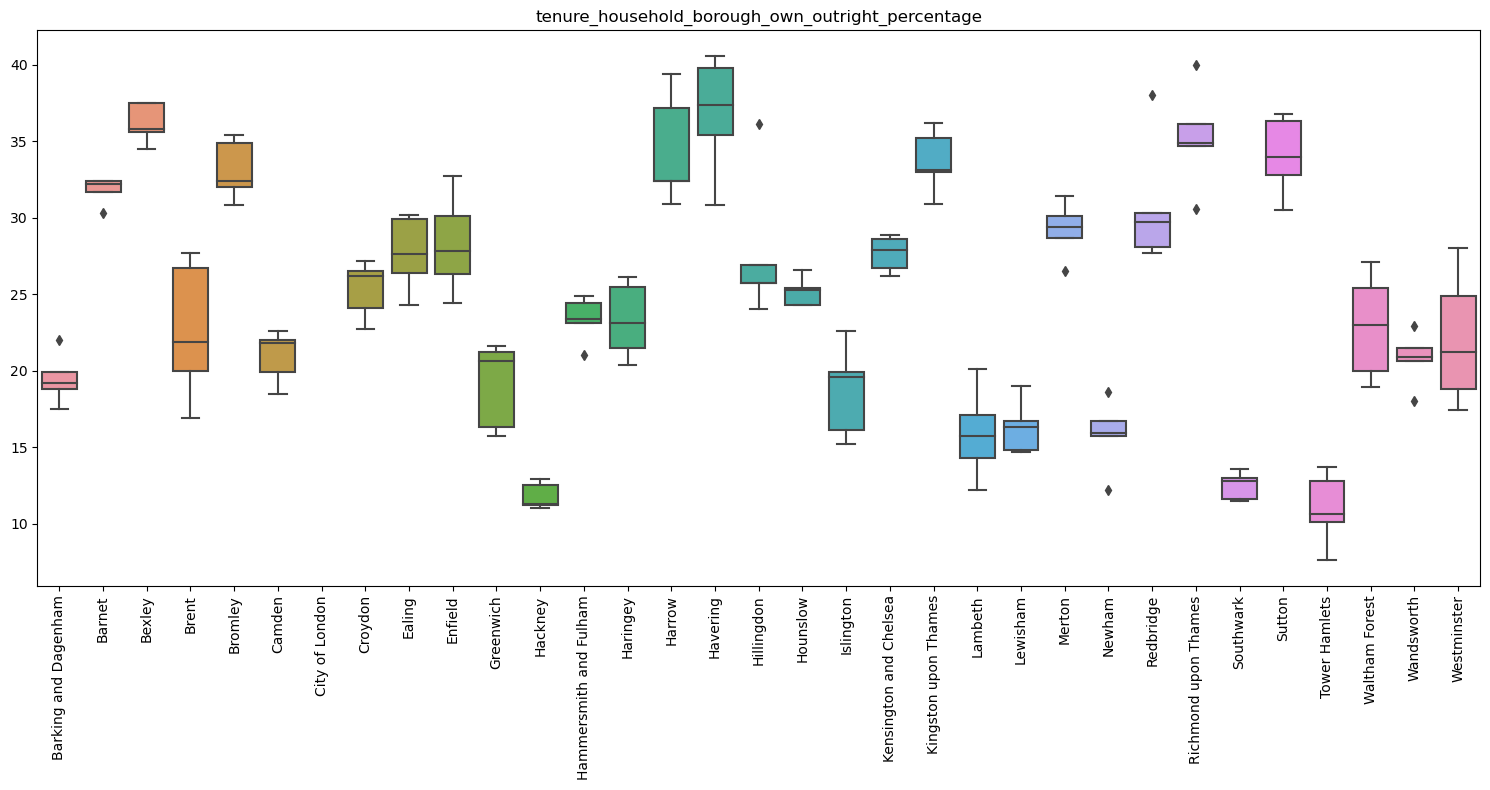

In [36]:
box_plot_vars = ['Percentage_of_pupils_who_achieved_strong_9_5_pass_gcse',
'percent_exceed_standard_all_ks2',
'crime_rates_domestic_burglary',
'crime_rates_vehicle_offences',
'house_sales',
'tenure_household_borough_own_outright_percentage']


# for var in box_plot_vars:
#     plt.figure(figsize=(15, 8));  
#     sns.boxplot(x='borough_name', y=var, data=data);
#     plt.xticks(rotation=90);
#     plt.title(var);
#     plt.ylabel('');
#     plt.xlabel('');
#     plt.tight_layout();
#     plt.show(); 
    
for var in box_plot_vars:
    _ = plt.figure(figsize=(15, 8))
    _ = sns.boxplot(x='borough_name', y=var, data=data)
    _ = plt.xticks(rotation=90)
    _ = plt.title(var)
    _ = plt.ylabel('')
    _ = plt.xlabel('')
    plt.tight_layout()
    plt.show()



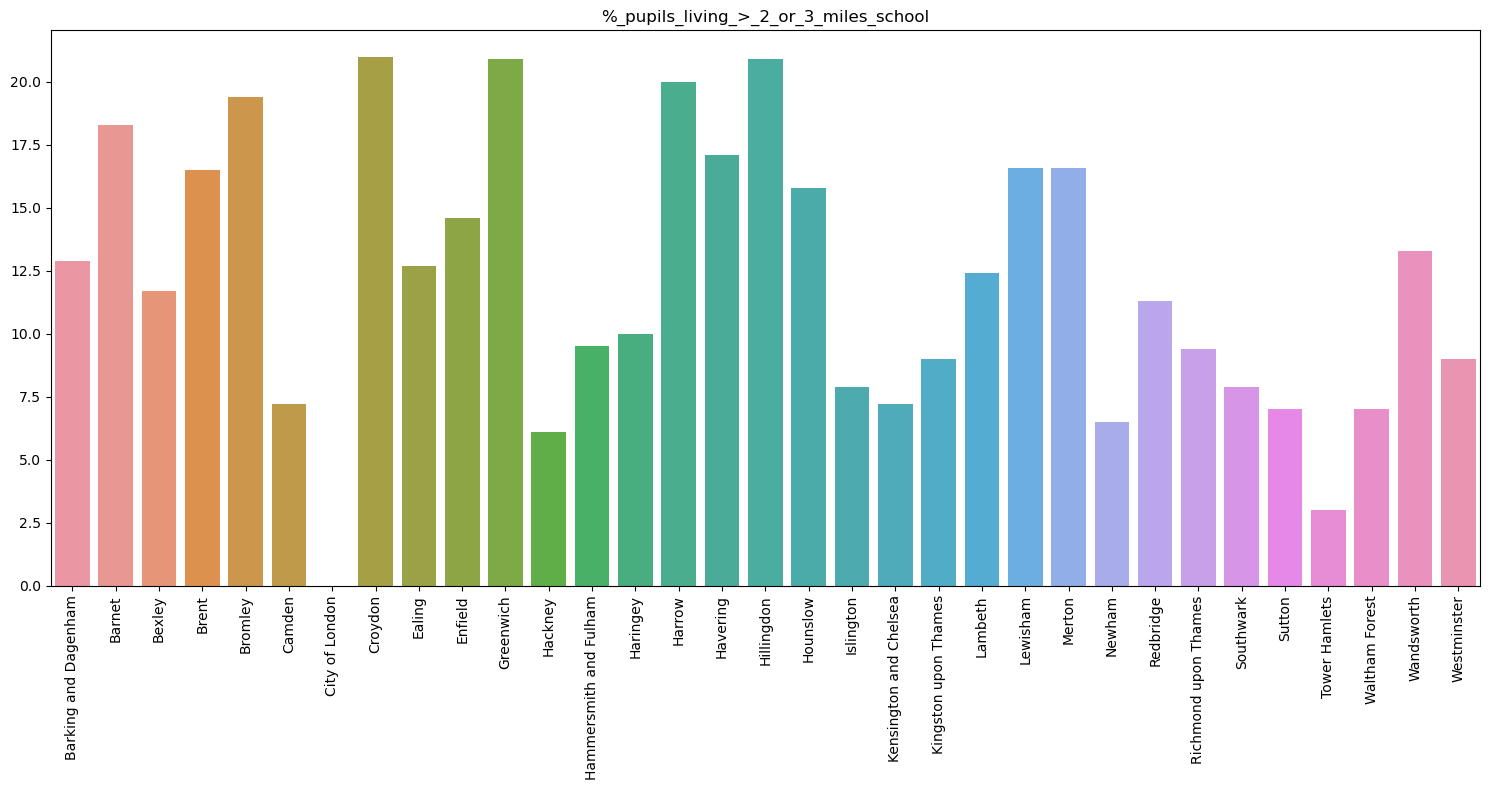

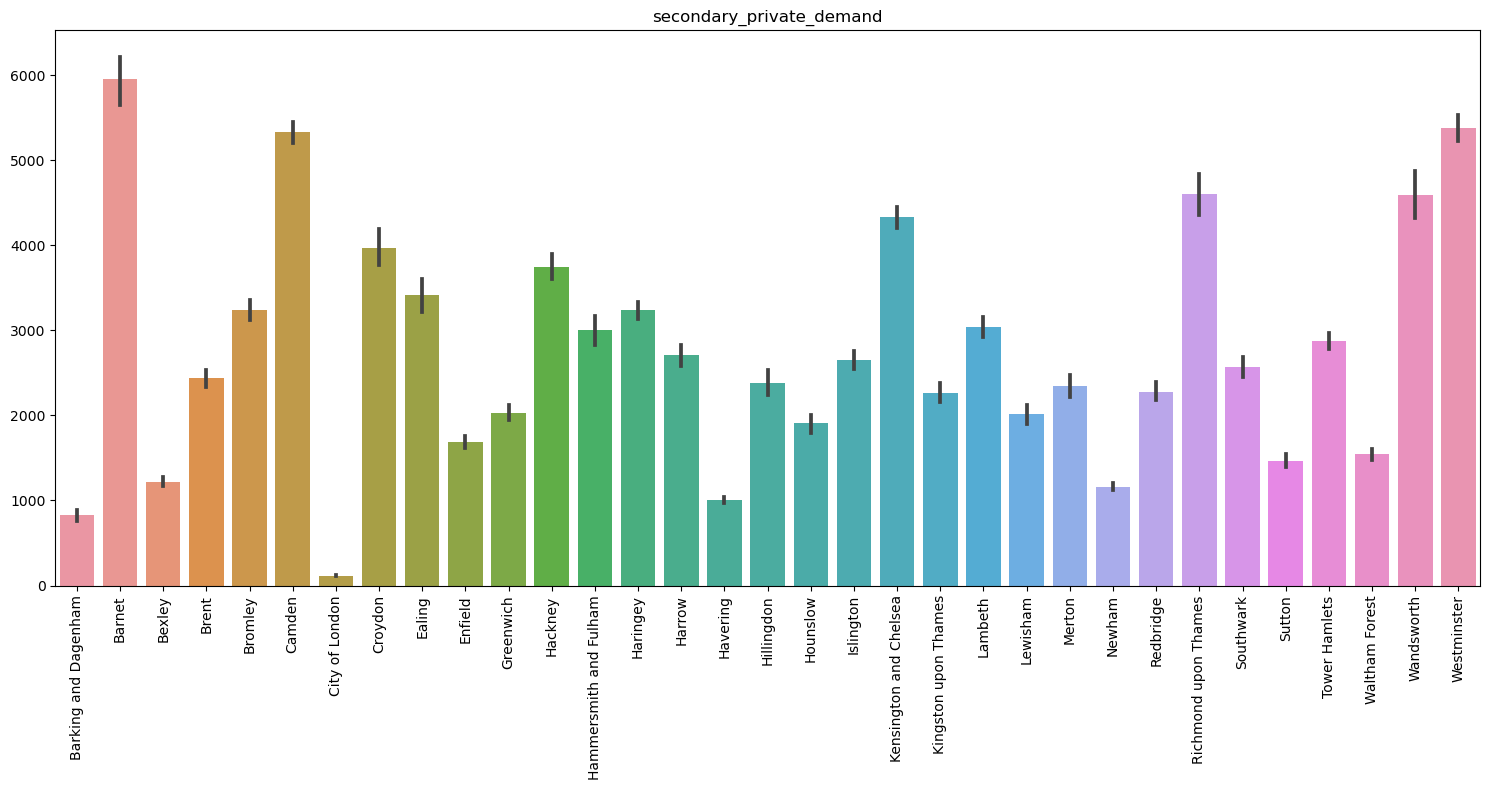

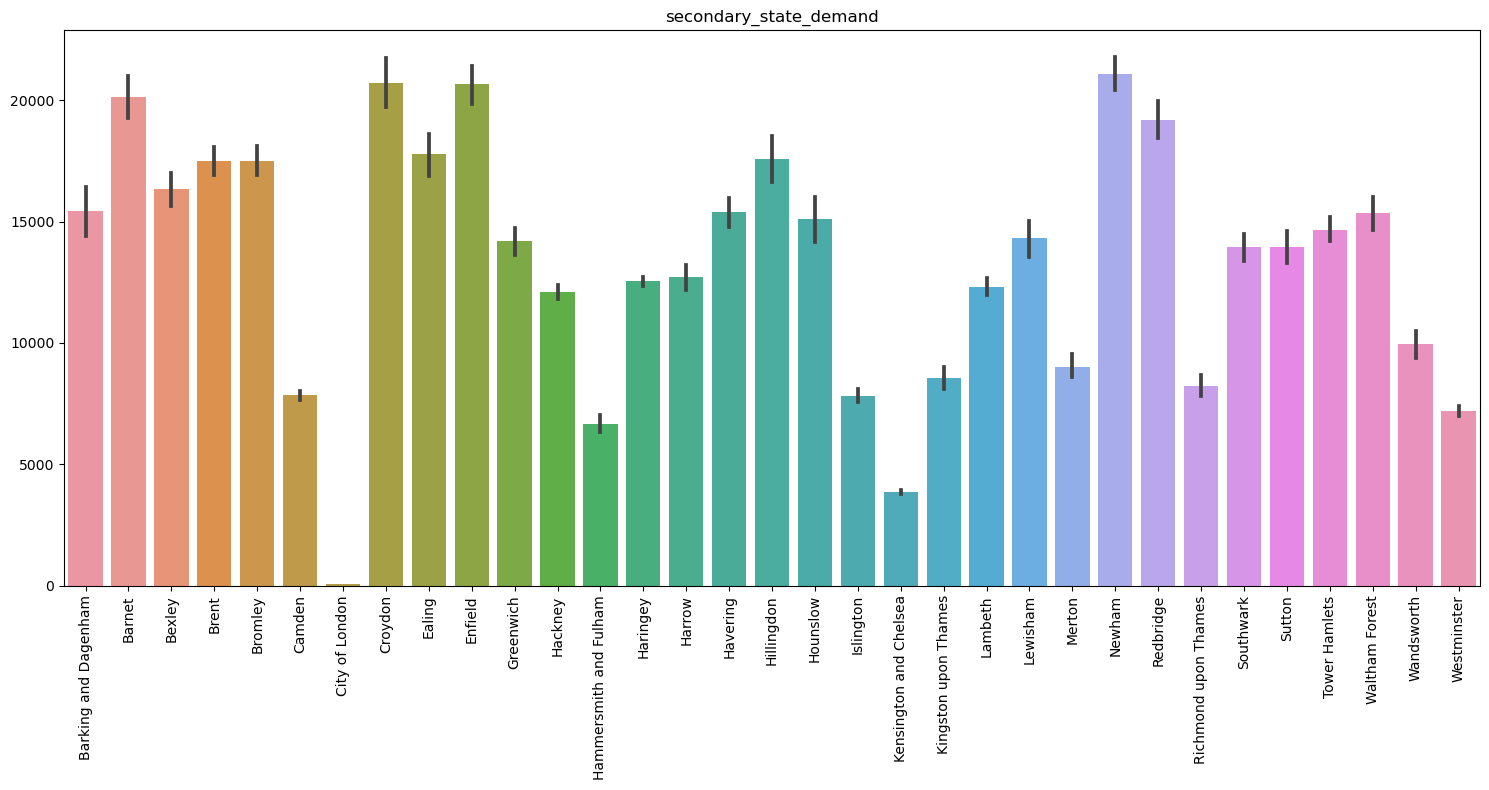

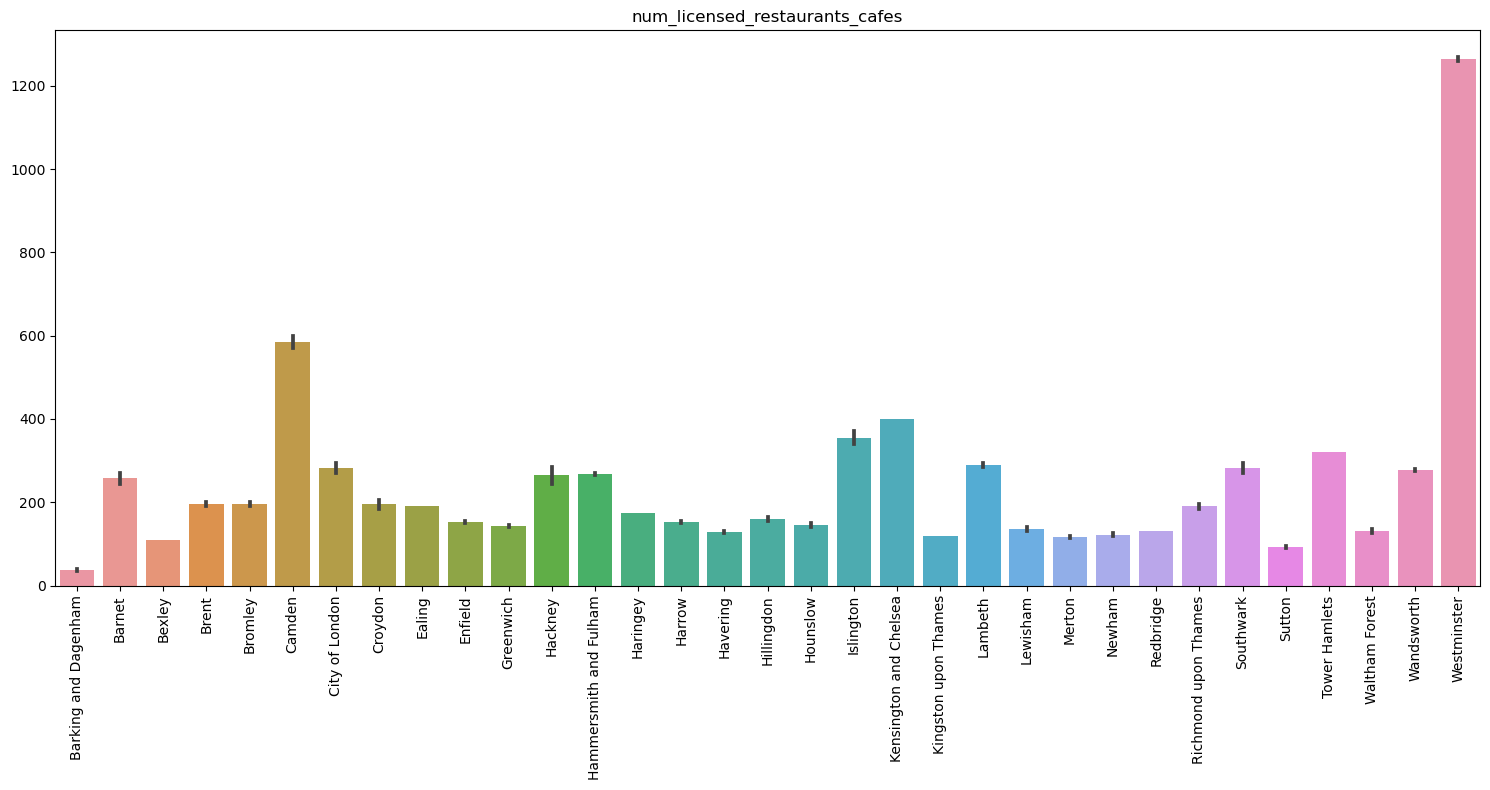

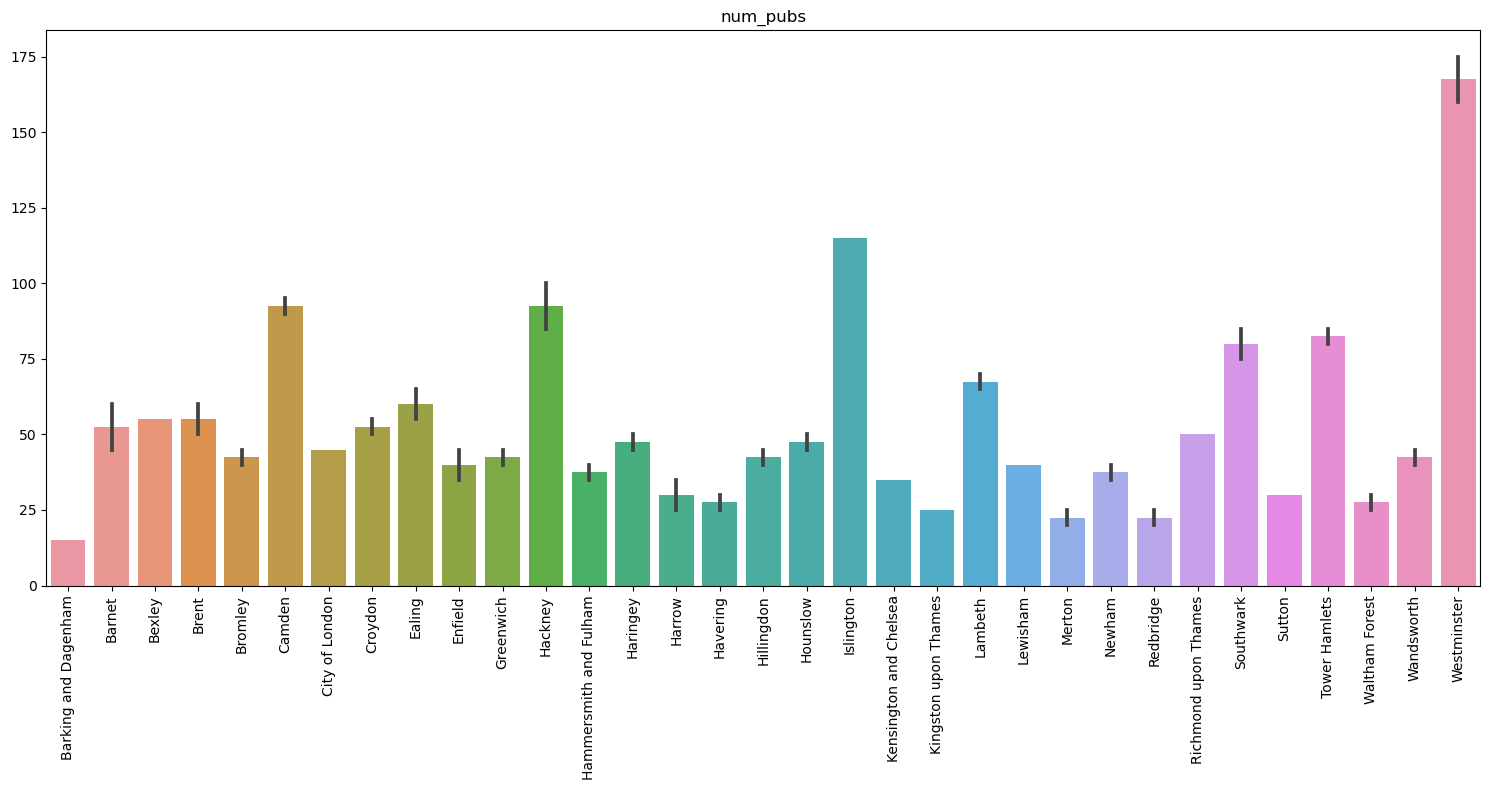

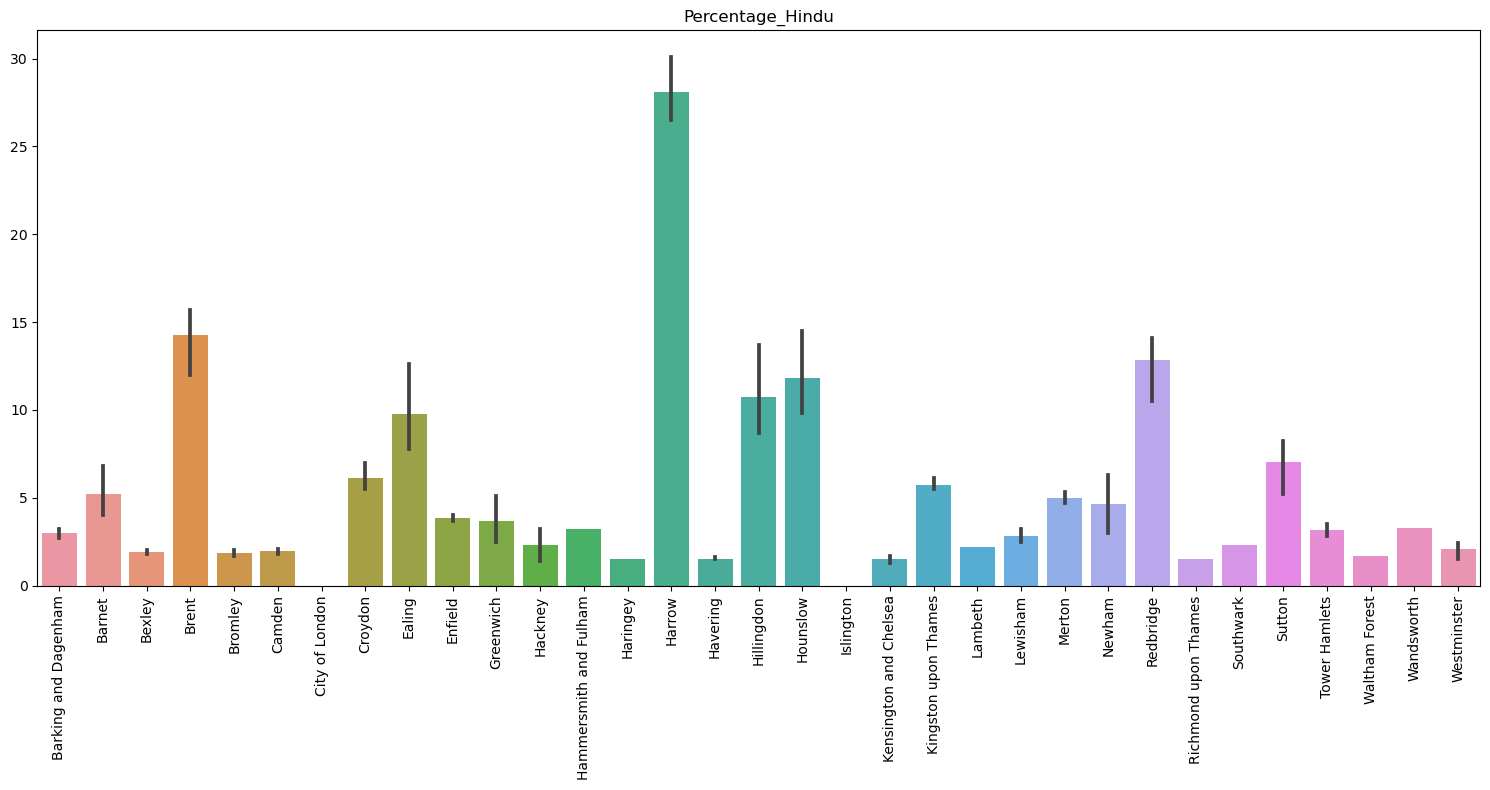

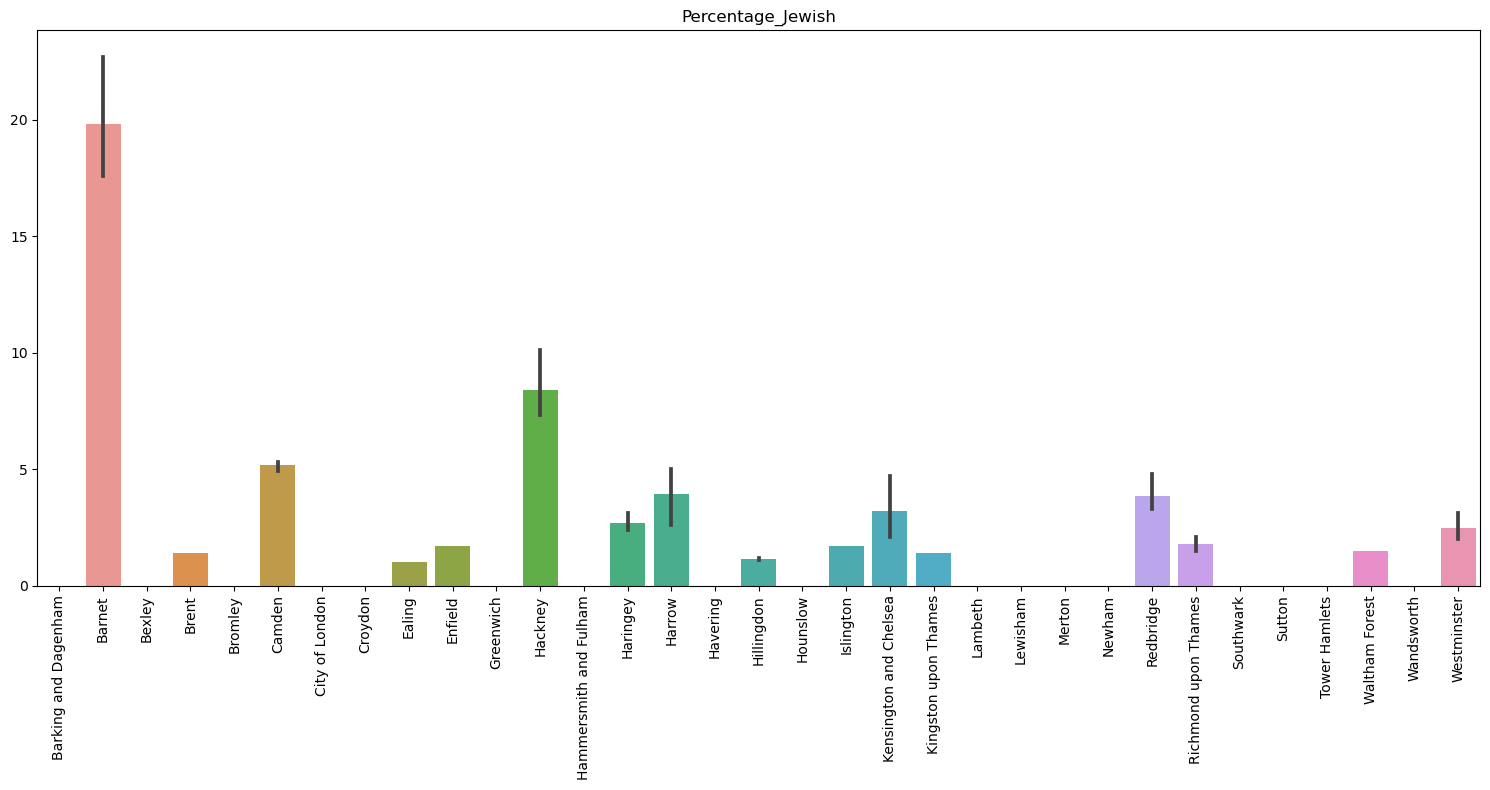

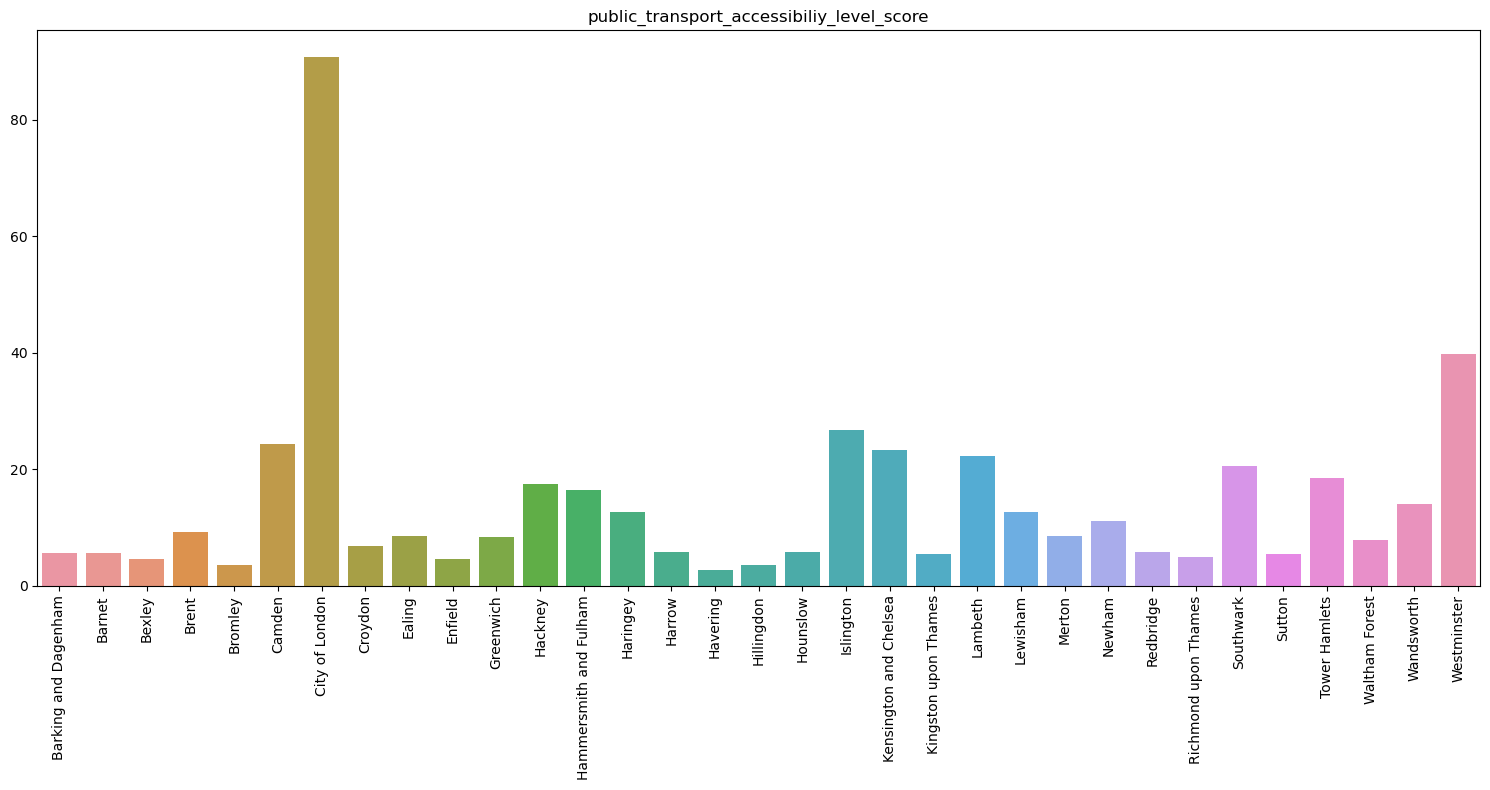

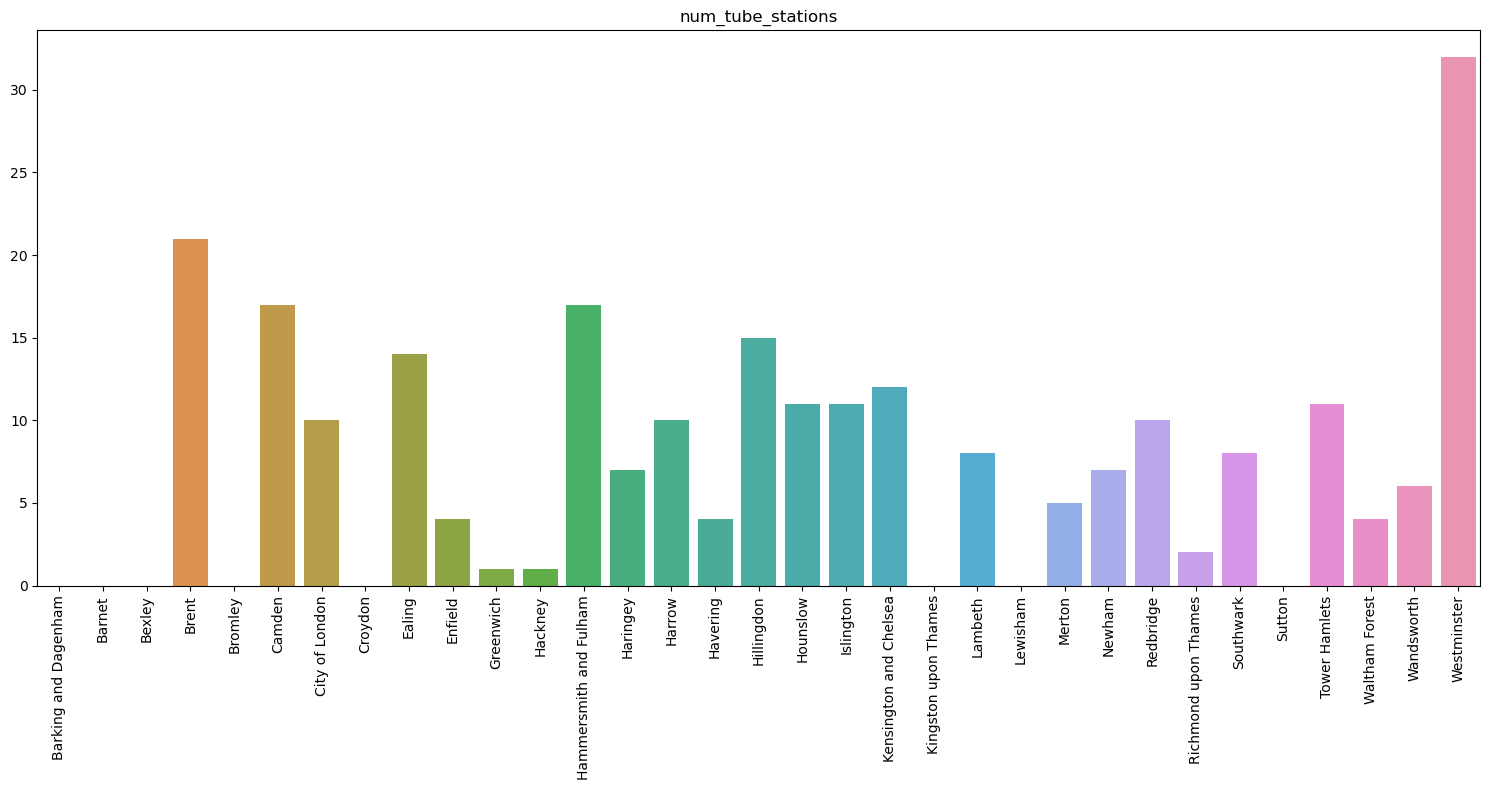

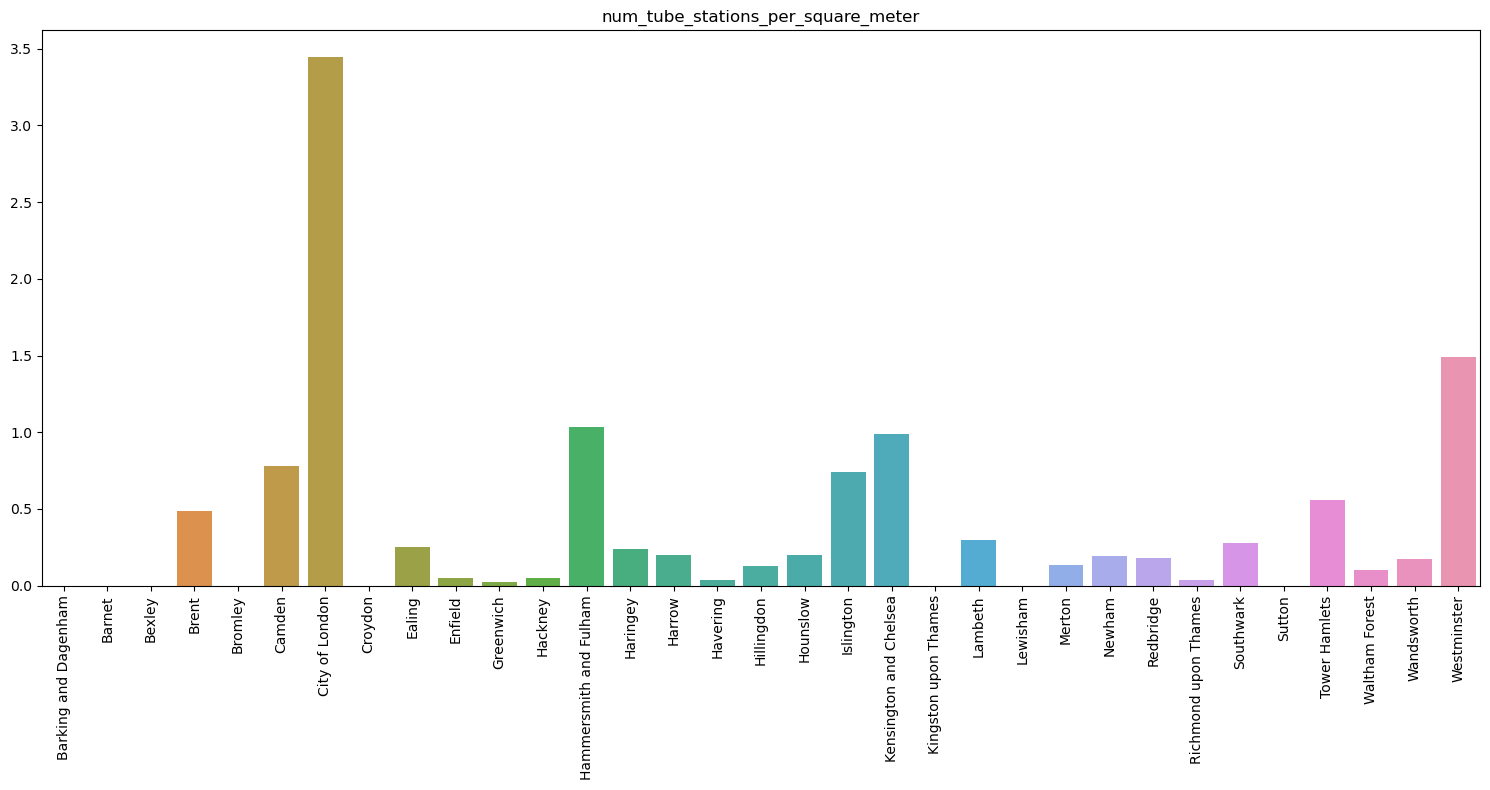

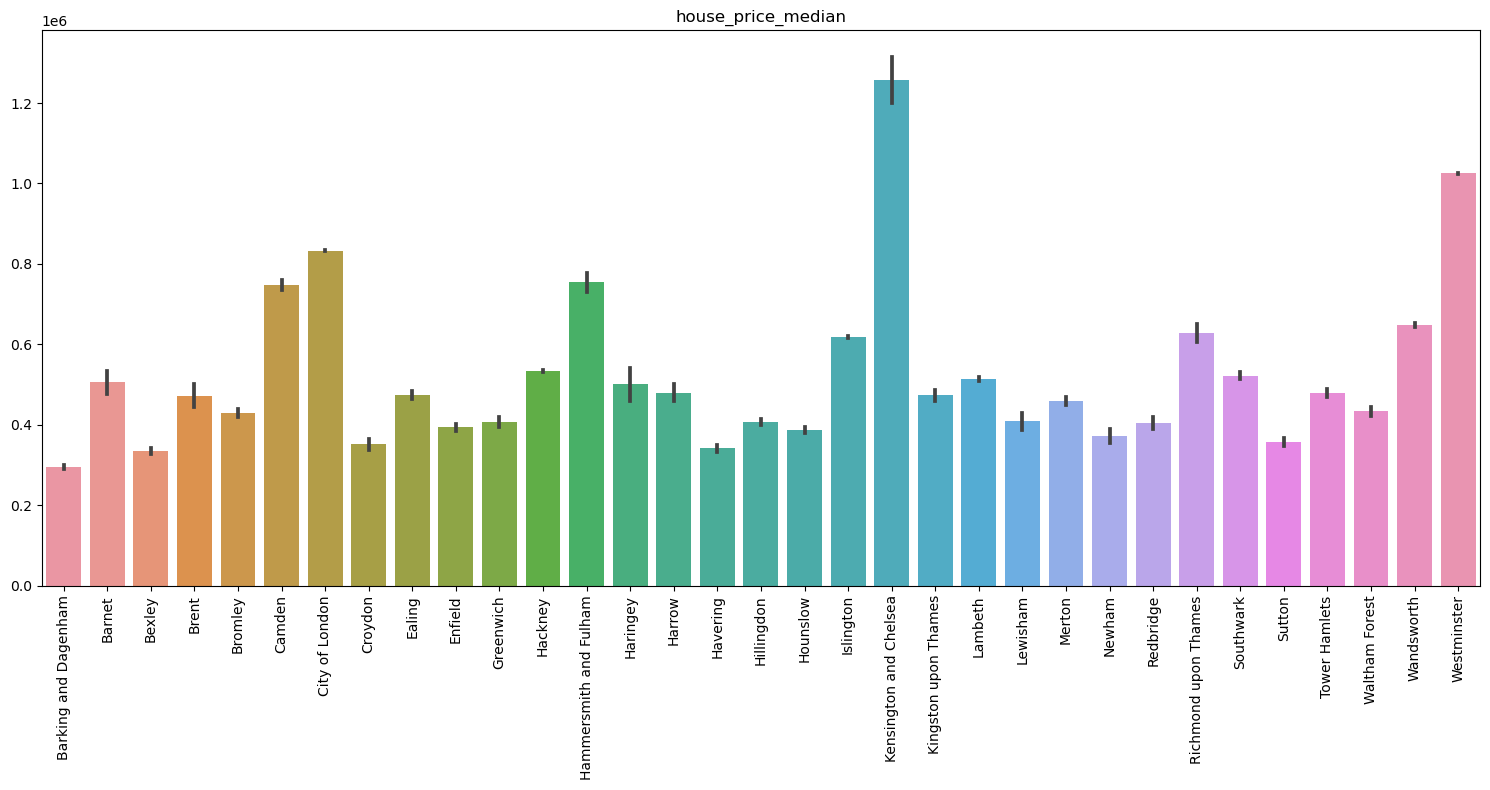

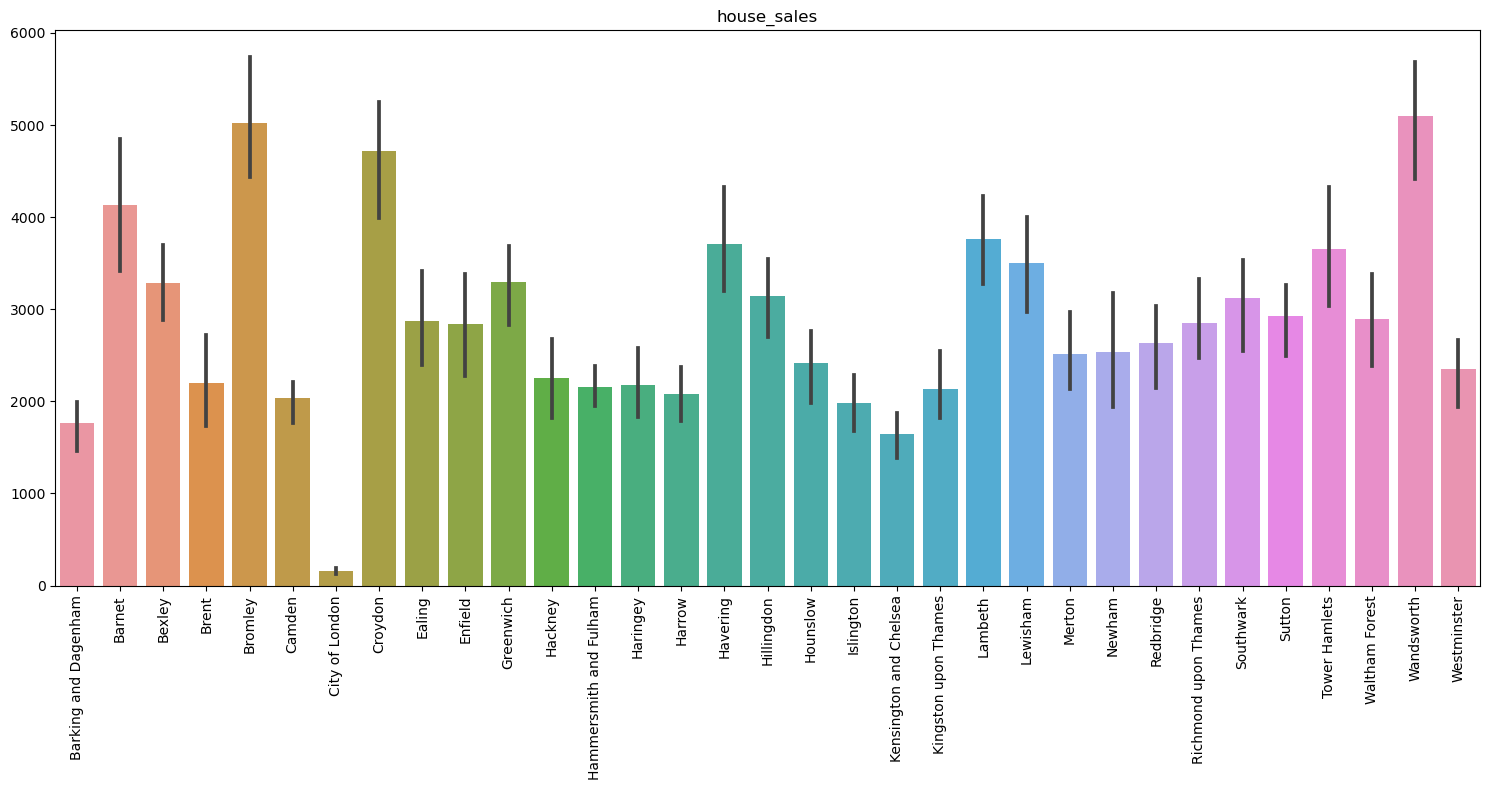

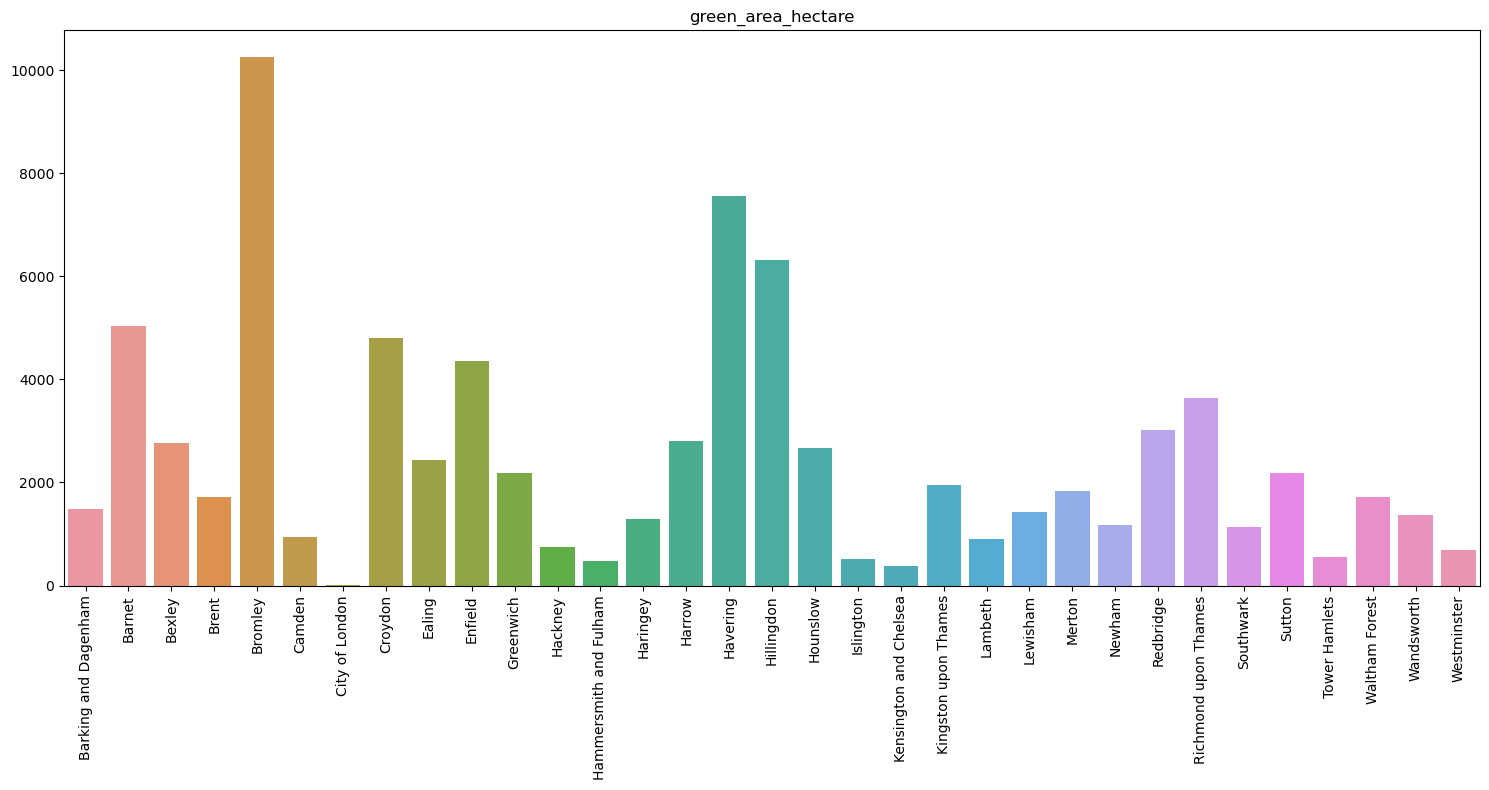

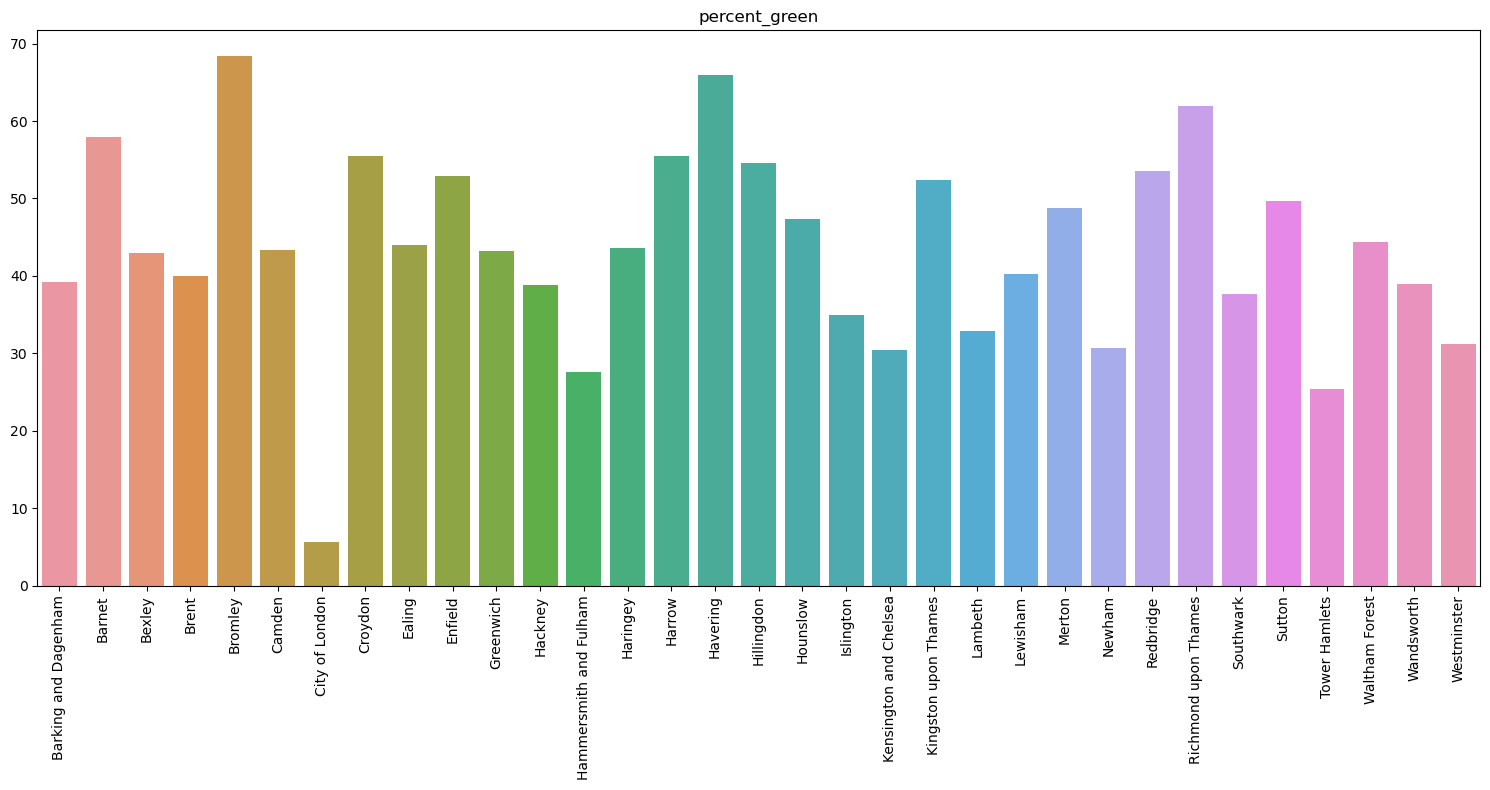

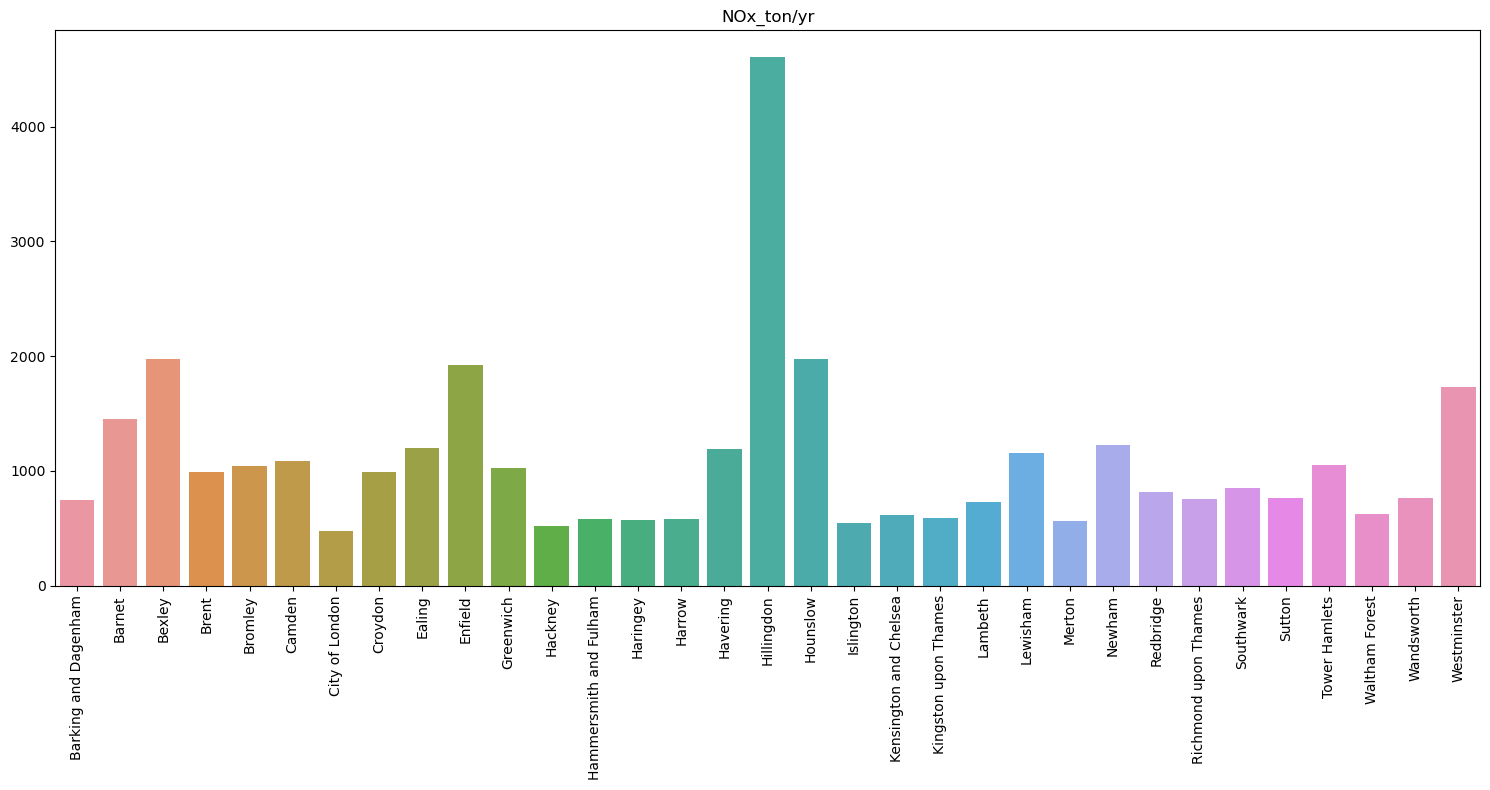

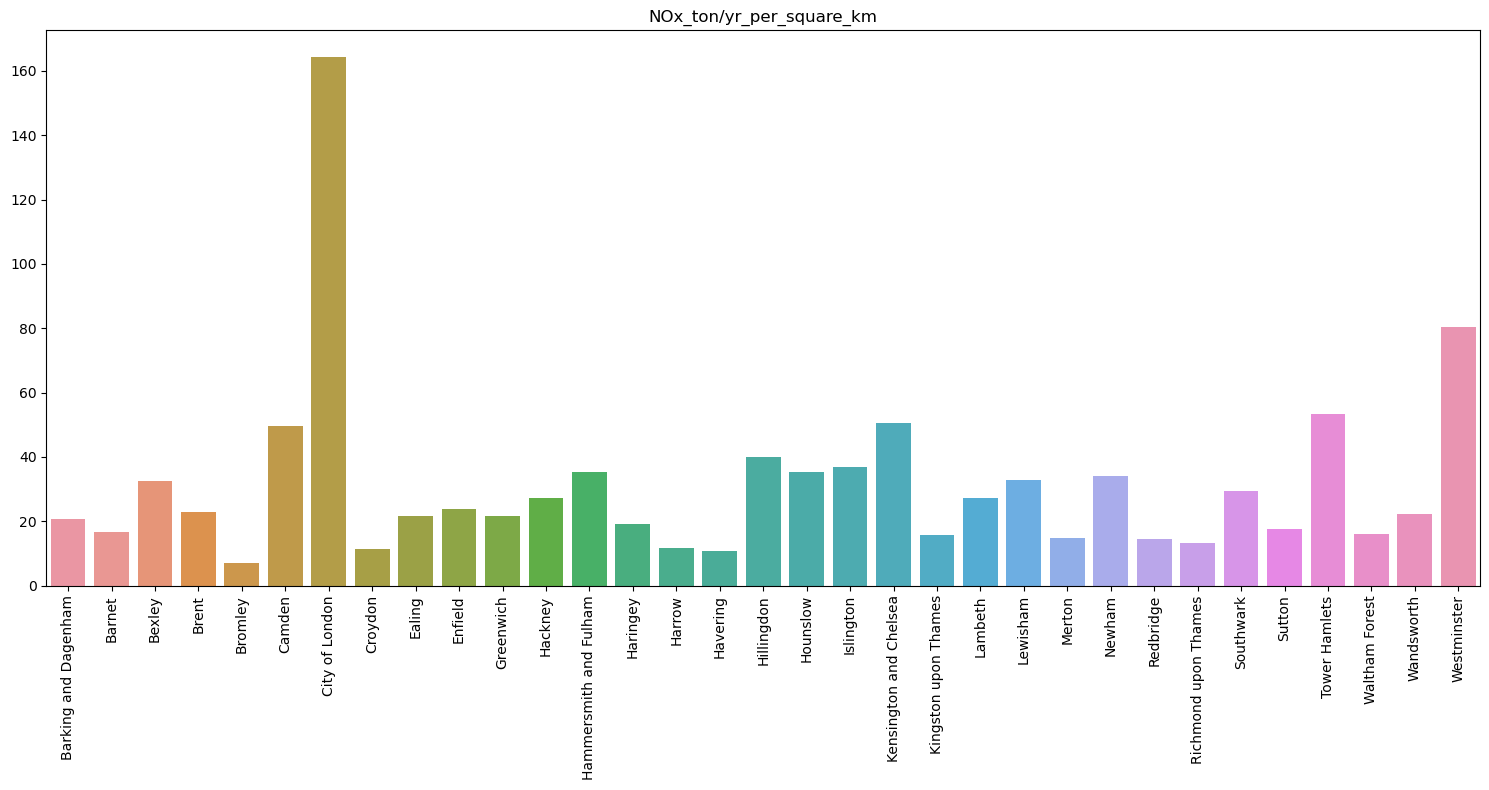

In [37]:
bar_chart_vars = ['%_pupils_living_>_2_or_3_miles_school',
'secondary_private_demand',
'secondary_state_demand',
'num_licensed_restaurants_cafes',
'num_pubs',
'Percentage_Hindu',
'Percentage_Jewish',
'public_transport_accessibiliy_level_score','num_tube_stations',
'num_tube_stations_per_square_meter',
'house_price_median',
'house_sales',
'green_area_hectare',
'percent_green',
'NOx_ton/yr',
'NOx_ton/yr_per_square_km']


# Generate a bar chart for each variable, excluding the first two columns
for var in bar_chart_vars:
    _ = plt.figure(figsize=(15, 8))  # Adjust the figure size as needed
    _ = sns.barplot(x='borough_name', y=var, data=data)
    _ = plt.xticks(rotation=90)
    _ = plt.title(var)
    _ = plt.ylabel('')
    _ = plt.xlabel('')
    _ = plt.tight_layout()
    _ = plt.show()  


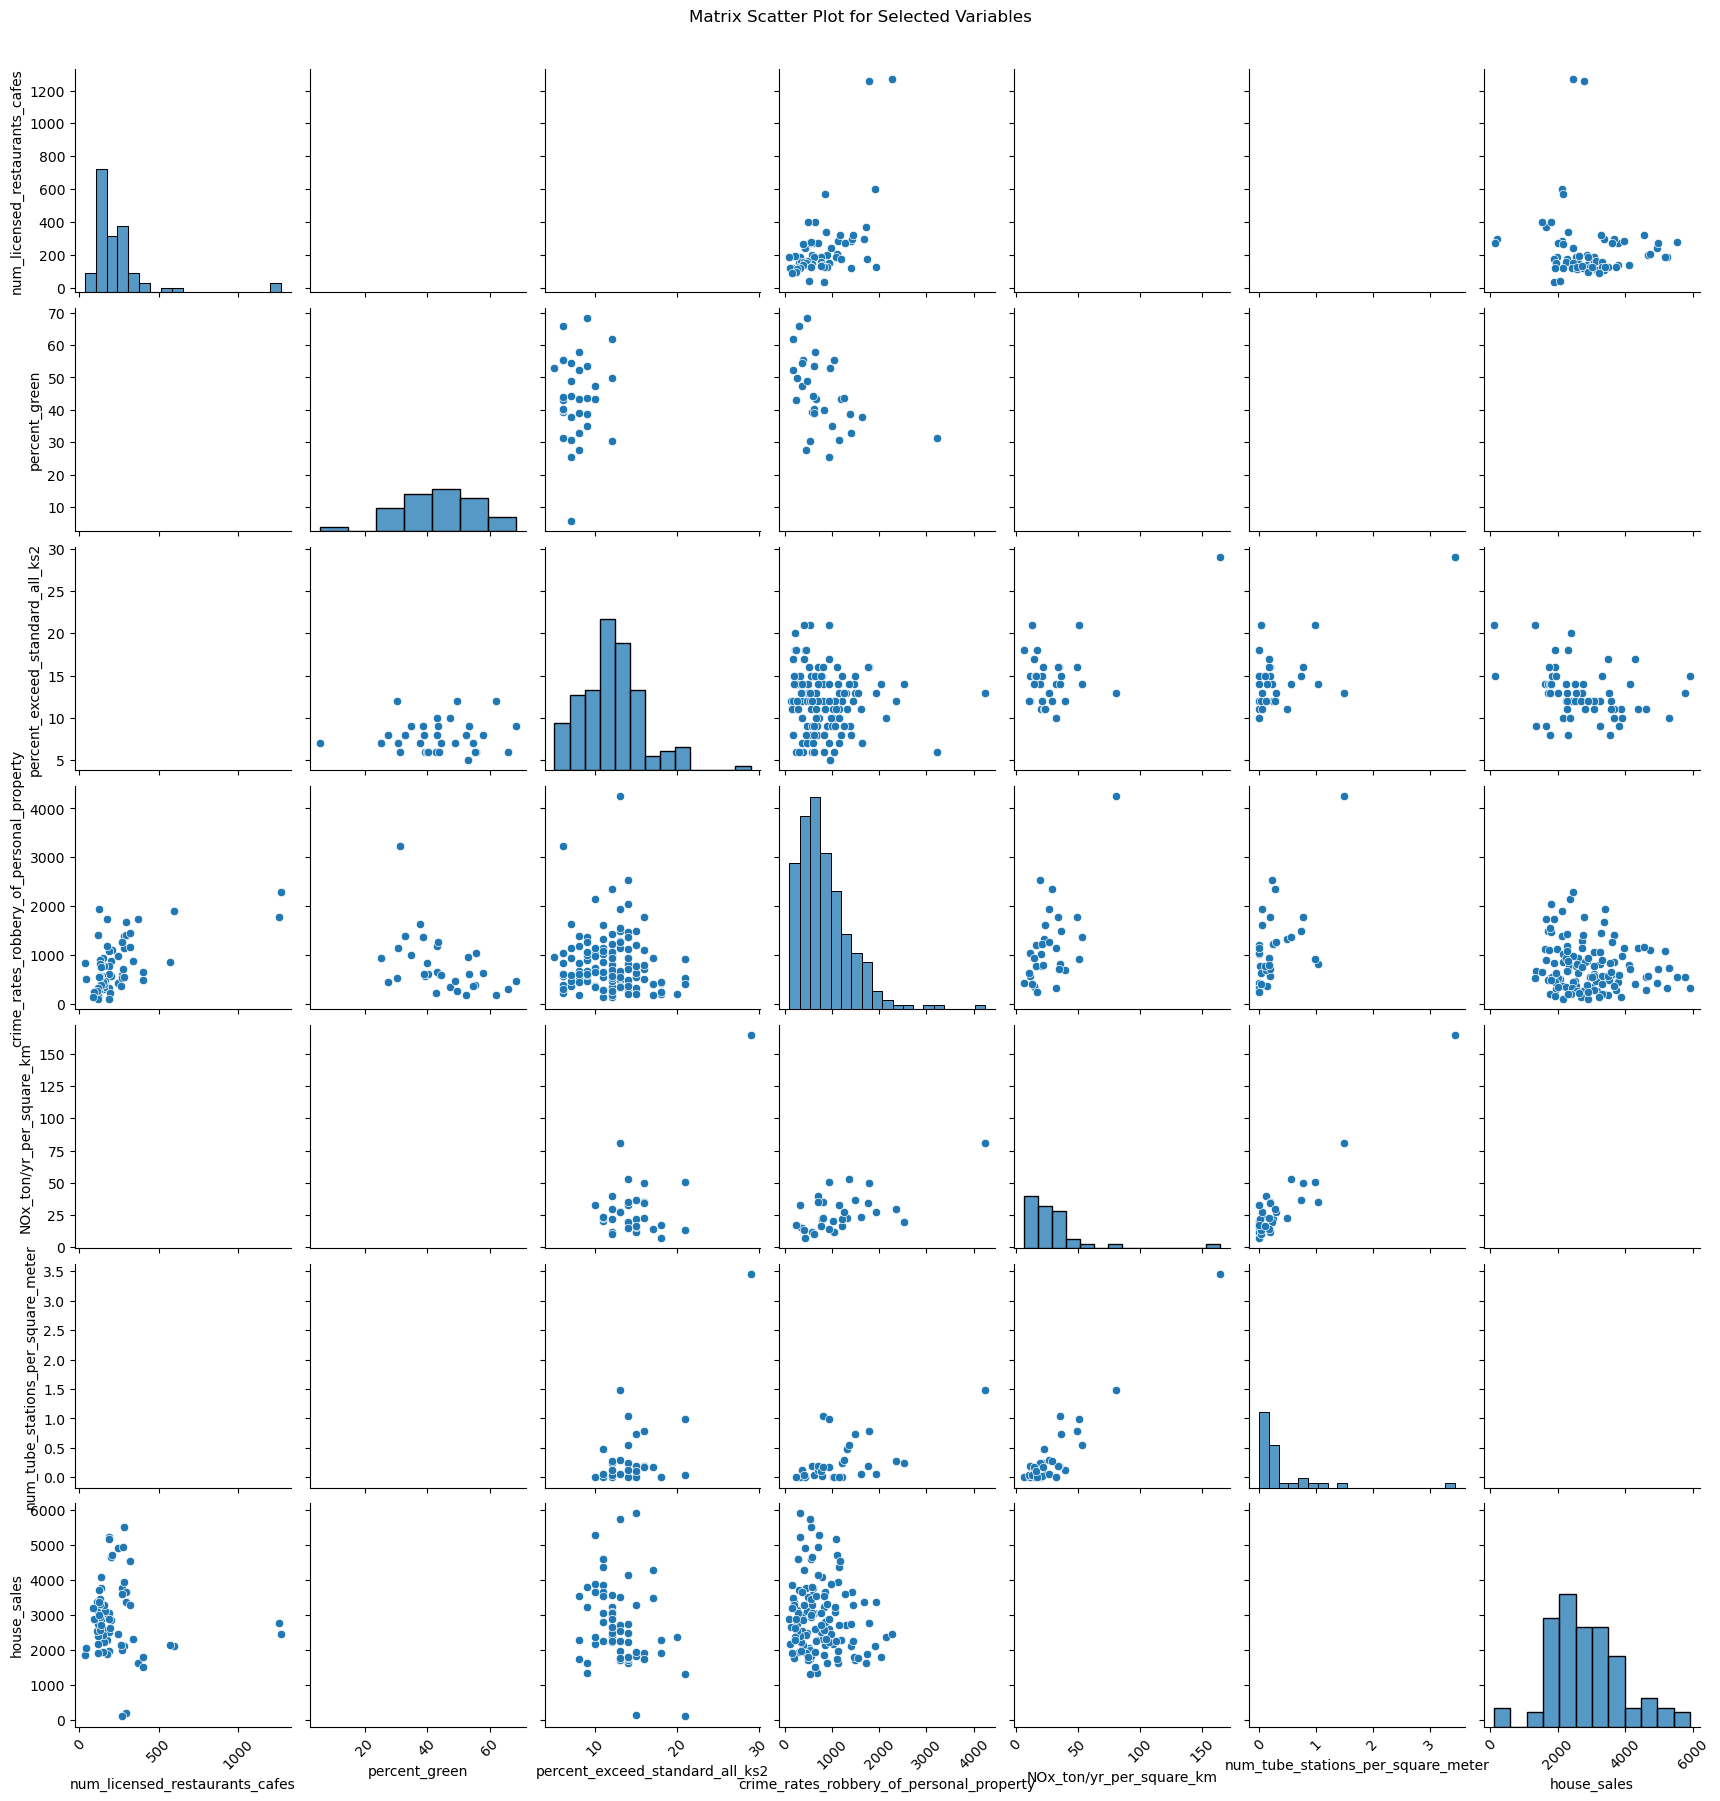

In [49]:
# Selecting a subset of variables to pair with 'house_sales' and 'house_price_median' for scatter plot matrices
selected_pairs = [
    'num_licensed_restaurants_cafes', 'percent_green','percent_exceed_standard_all_ks2', 
    'crime_rates_robbery_of_personal_property', 'NOx_ton/yr_per_square_km', 'num_tube_stations_per_square_meter'
]


# Adding 'house_sales' and 'house_price_median' to the list for plotting
selected_pairs.extend(['house_sales'])

# Creating a subset of the dataframe with the selected variables
scatter_data = data[selected_pairs]

# Plotting the matrix scatter plot
sns.pairplot(scatter_data)
plt.suptitle("Matrix Scatter Plot for Selected Variables", y=1.02);  # Adjust title position
# Rotating x-axis labels to 45 degrees for readability
for ax in plt.gcf().axes:
    plt.sca(ax)
    plt.xticks(rotation=45);
plt.show();

# Proof of concept 

In [90]:
# We are now using the copy of the full dataframe we created at the beginning 
# This is because it has undergone the step of changing the columns with object datatype into floats
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Columns: 139 entries, borough_name to num_tube_stations_per_square_meter
dtypes: float32(33), float64(104), int64(1), object(1)
memory usage: 221.2+ KB


In [91]:
# We are doing to drop all rows in the City of London borough 
# This is because there is a lot of missing information 
# And the borough tends to perform either extremely well, or extremely poorly 
# Drop rows where 'borough_name' is 'City of London'
model_df = model_df[model_df['borough_name'] != 'City of London']

We will calculate various indices for key criteria that a prospective buyer might consider when choosing the location of their home in London. The indices we will create include:
* School Performance Index (SPI)
* Entertainment Index 
* Crime Index 
* Air Quality Index (AQI)
* Transport Index
* Culture and Diversity Index (CDI)
* Green Space Index (GPI)

In [92]:
def calculate_index(df, variables, weighted_variables=None):
    """
    Calculate the Index for each borough based on provided variables with
    additional consideration for weighted variables.

    Args:
    - df (DataFrame): Panel data with one row per borough per year.
    - variables (list): List of variable column names to include in the index calculation with standard weight.
    - weighted_variables (list): List of variable column names to include in the index calculation with double weight.

    Returns:
    - DataFrame: A DataFrame with index values for each borough.
    """
    
    # If weighted_variables is None or empty, use an empty list
    weighted_variables = weighted_variables if weighted_variables else []

    # Ensure that variables are present in the DataFrame
    variables = [var for var in variables if var in df.columns]
    weighted_variables = [var for var in weighted_variables if var in df.columns]

    # Impute missing values with the mean of the specific borough for all variables
    df_imputed = df.copy()
    all_vars = list(set(variables + weighted_variables))
    for var in all_vars:
        df_imputed[var] = df.groupby('borough_name')[var].transform(lambda x: x.fillna(x.mean()))

    # Normalize variables to the range [0, 1]
    df_normalized = df_imputed.copy()
    for var in all_vars:
        df_normalized[var] = (df_imputed[var] - df_imputed[var].min()) / (df_imputed[var].max() - df_imputed[var].min())

    # Assign weights to variables
    weights = {var: 2.0 if var in weighted_variables else 1.0 for var in all_vars}

    # Calculate the weighted sum for each row
    df_normalized['weighted_sum'] = df_normalized[all_vars].mul(pd.Series(weights), axis=1).sum(axis=1)

    # Normalize the final index values to range [0, 1]
    max_weighted_sum = df_normalized['weighted_sum'].max()
    df_normalized['weighted_sum'] = df_normalized['weighted_sum'] / max_weighted_sum

    # Group by borough and calculate the average of the weighted sums
    borough_index = df_normalized.groupby('borough_name')['weighted_sum'].mean().reset_index()

    # Rename columns to reflect that this is the SPI
    borough_index.columns = ['borough_name', 'index']

    return borough_index


In [103]:
# Calculating indices for various factors in real estate analysis

# Section 1: School Performance Index
# Define variables related to school performance
school_index_variable = [
    # Early years and KS1 variables
    'Percentage_of_children_at_expected_level_across_all_early_learning_goals_early_years',
    'Percentage_of_children_with_a_good_level_of_development_early_years',
    'percent_reaching_exp_standard_reading_ks1',
    'percent_reaching_exp_standard_writing_ks1',
    'percent_reaching_exp_standard_mathematics_ks1',
    'percent_reaching_exp_standard_science_ks1',
    'percent_exceed_standard_reading_ks1',
    'percent_exceed_standard_writing_ks1',
    'percent_exceed_standard_mathematics_ks1', 
    # KS2 variables
    'percent_exceed_standard_gps_ks2', 
    'percent_exceed_standard_math_ks2',
    'percent_exceed_standard_reading_ks2',
    'percent_exceed_standard_writing_ks2',
    'percent_reaching_exp_standard_all_ks2',
    'percent_reaching_exp_standard_gps_ks2',
    'percent_reaching_exp_standard_math_ks2',
    'percent_reaching_exp_standard_reading_ks2',
    'percent_reaching_exp_standard_writing_ks2',
    'percent_exceed_standard_all_ks2',
    # GCSE variable 
    'Percentage_of_pupils_who_achieved_strong_9_5_pass_gcse'
]

# Define weighted variables for school performance
weighted_school_index_variables = [
    'percent_exceed_standard_mathematics_ks1', 
    'percent_exceed_standard_all_ks2', 
    'Percentage_of_pupils_who_achieved_strong_9_5_pass_gcse'
]

# Calculate school performance index and rename column
school_perf_index_df = calculate_index(model_df, school_index_variable, weighted_school_index_variables)
school_perf_index_df = school_perf_index_df.rename(columns={'index': 'SPI'})


# Section 2: Entertainment Index
# Define variables related to entertainment
entertainment_index_variable = [
    'num_licensed_clubs',
    'num_pubs',
    'num_takeaway_foodstand_units',
    'num_licensed_restaurants_cafes'
]

# Define weighted variables for entertainment
weighted_entertainment_index_variables = ['num_licensed_restaurants_cafes']

# Calculate entertainment index and rename column
entertainment_index_df = calculate_index(model_df, entertainment_index_variable)
entertainment_index_df = entertainment_index_df.rename(columns={'index': 'Entertainment_Index'})


# Section 3: Crime Index
# Define variables related to crime rates
crime_index_variable = [
    'crime_rates_burglary_business_and_community',
    'crime_rates_domestic_burglary', 
    'crime_rates_drug_offences',
    'crime_rates_possession_of_weapons',
    'crime_rates_public_order_offences',
    'crime_rates_robbery_of_business_property', 
    'crime_rates_sexual_offences', 
    'crime_rates_vehicle_offences',
    'crime_rates_violence_against_the_person',
    'crime_rates_robbery_of_personal_property',
    'crime_rates_theft',
    'crime_rates_miscellaneous_crimes_against_society'
]

# Define weighted variables for crime
weighted_crime_index_variables = [
    'crime_rates_robbery_of_personal_property',
    'crime_rates_theft',
    'crime_rates_miscellaneous_crimes_against_society'
]

# Calculate crime index and rename column
crime_index_df = calculate_index(model_df, crime_index_variable, weighted_crime_index_variables)
crime_index_df = crime_index_df.rename(columns={'index': 'Crime_Index'})
# Note: Lower Crime I scores are better 


# Section 4: Air Quality Index
# Define variables related to air quality
air_quality_index_variable = [
    "CO2_emissions_ton/yr", "NOx_ton/yr", "PM10_ton/yr", "PM2.5_ton/yr",
    "CO2_emissions_ton/yr_per_square_km", "NOx_ton/yr_per_square_km",
    "PM10_ton/yr_per_square_km", "PM2.5_ton/yr_per_square_km"
]

# Define weighted variables for air quality
weighted_air_quality_index_variable = [
    "CO2_emissions_ton/yr_per_square_km", "NOx_ton/yr_per_square_km",
    "PM10_ton/yr_per_square_km", "PM2.5_ton/yr_per_square_km"
]

# Calculate air quality index and rename column
air_quality_index_df = calculate_index(model_df, air_quality_index_variable, weighted_air_quality_index_variable)
air_quality_index_df = air_quality_index_df.rename(columns={'index': 'AQI'})
# Note: Lower AQI scores are better 


# Section 5: Green Spaces Index
# Define variables related to green spaces
green_index_variable = [
    "borough_area_hectare", "blue _area_hectare", "green+blue_area_hectare",
    "percent_blue", "tree_count_per_square_km", 
    "percent_green", "percent_green+blue","green_area_hectare"
]

# Define weighted variables for green spaces
weighted_green_index_variable = [
    "percent_green", "percent_green+blue","green_area_hectare"
]

# Calculate green spaces index and rename column
green_index_df = calculate_index(model_df, green_index_variable, weighted_green_index_variable)
green_index_df = green_index_df.rename(columns={'index': 'GSI'})


# Section 6: Transport Index
# Define variables related to transport
transport_index_variable = [
    'public_transport_accessibiliy_level_score',
    'num_tube_stations', 'num_tube_stations_per_square_meter'
]

# Calculate transport index 
transport_index_df = calculate_index(model_df, transport_index_variable)
transport_index_df = transport_index_df.rename(columns={'index': 'Transport_Index'})

In [104]:
# Different functions are required for calculating the transport and diversity and community indexes
# This distinction arises because the variables for transport perform best in opposite directions:
#   - For transport, more tube stations should result in a better index, while higher vehicle flow per square km indicates worse traffic, resulting in a lower index.
# Additionally, when assessing diversity, we define a borough as diverse if it exhibits a more even spread of ethnicities and religions.
# Our original function does not capture this accurately, so we employ concepts from the Shannon Diversity Index to obtain an accurate measure of diversity in each borough.


def calculate_transport_index(df, variables, weighted_variables=None):
    """
    Calculate the Transport Index for each borough based on provided variables with
    additional consideration for weighted variables, inverting the score where necessary.

    Args:
    - df (DataFrame): Panel data with one row per borough per year.
    - variables (list): List of variable column names to include in the index calculation with standard weight.
    - weighted_variables (list): List of variable column names to include in the index calculation with double weight.

    Returns:
    - DataFrame: A DataFrame with index values for each borough.
    """
    
    # If weighted_variables is None or empty, use an empty list
    weighted_variables = weighted_variables if weighted_variables else []

    # Ensure that variables are present in the DataFrame
    variables = [var for var in variables if var in df.columns]
    weighted_variables = [var for var in weighted_variables if var in df.columns]

    # Impute missing values with the mean of the specific borough for all variables
    df_imputed = df.copy()
    all_vars = list(set(variables + weighted_variables))
    for var in all_vars:
        df_imputed[var] = df.groupby('borough_name')[var].transform(lambda x: x.fillna(x.mean()))

    # Normalize variables to the range [0, 1]. Invert 'traffic_flow_all_vehicles_per_square_km' during normalization.
    df_normalized = df_imputed.copy()
    for var in all_vars:
        if var == 'traffic_flow_all_vehicles_per_square_km':
            # Invert the variable: lower traffic flow should result in a higher normalized value
            df_normalized[var] = 1 - ((df_imputed[var] - df_imputed[var].min()) / (df_imputed[var].max() - df_imputed[var].min()))
        else:
            # Regular normalization
            df_normalized[var] = (df_imputed[var] - df_imputed[var].min()) / (df_imputed[var].max() - df_imputed[var].min())

    # Assign weights to variables
    weights = {var: 2.0 if var in weighted_variables else 1.0 for var in all_vars}

    # Calculate the weighted sum for each row
    df_normalized['weighted_sum'] = df_normalized[all_vars].mul(pd.Series(weights), axis=1).sum(axis=1)

    # Normalize the final index values to range [0, 1]
    max_weighted_sum = df_normalized['weighted_sum'].max()
    df_normalized['weighted_sum'] = df_normalized['weighted_sum'] / max_weighted_sum

    # Group by borough and calculate the average of the weighted sums
    borough_index = df_normalized.groupby('borough_name')['weighted_sum'].mean().reset_index()

    # Rename columns to reflect that this is the Transport Index
    borough_index.columns = ['borough_name', 'Transport_Index']

    return borough_index


def calculate_shannon_diversity_index(df, variables):
    """
    Calculate the Shannon Diversity Index for each borough based on provided variables.

    Args:
    - df (DataFrame): Panel data with one row per borough per year.
    - variables (list): List of variable column names to include in the diversity index calculation.

    Returns:
    - DataFrame: A DataFrame with diversity index values for each borough.
    """
    
    # Ensure that variables are present in the DataFrame
    variables = [var for var in variables if var in df.columns]

    # Normalize variables to represent proportions (summing to 1 for each borough)
    df_normalized = df.copy()
    for var in variables:
        df_normalized[var] = df[var] / df[variables].sum(axis=1)
    
    # Calculate the Shannon Diversity Index
    df_normalized['shannon_diversity'] = -(df_normalized[variables] * np.log(df_normalized[variables])).sum(axis=1)

    # Replace negative zeros with zeros
    df_normalized['shannon_diversity'] = df_normalized['shannon_diversity'].replace(-0, 0)

    # Normalize the Shannon Diversity Index to range [0, 1]
    max_diversity_index = df_normalized['shannon_diversity'].max()
    df_normalized['shannon_diversity'] = df_normalized['shannon_diversity'] / max_diversity_index

    # Group by borough and calculate the average of the Shannon Diversity Index
    borough_diversity = df_normalized.groupby('borough_name')['shannon_diversity'].mean().reset_index()

    # Rename columns to reflect that this is the Diversity Index
    borough_diversity.columns = ['borough_name', 'Diversity_Index']

    return borough_diversity



In [105]:
# # Section 6: Transport Index
# # Define variables related to transport
# transport_index_variable = [
#     'public_transport_accessibiliy_level_score', 'traffic_flow_all_vehicles_per_square_km',
#     'num_tube_stations', 'num_tube_stations_per_square_meter'
# ]

# # Calculate transport index 
# transport_index_df = calculate_transport_index(model_df, transport_index_variable)


# Section 7: Diversity 
# Define variables related to diversity
diversity_index_variable = ['proportion_of_ethnics_white', 'proportion_of_ethnics_asian',
       'proportion_of_ethnics_black', 'proportion_of_ethnics_mixed_or_other',
       'Percentage_Buddhist','Percentage_Christian', 'Percentage_Hindu', 'Percentage_Jewish',
       'Percentage_Muslim', 'Percentage_Sikh']

# Calculate diversity index 
diversity_index_df = calculate_shannon_diversity_index(model_df, diversity_index_variable)

In [106]:
# Merging the index columns sequentially based on 'borough_name'

# List the columns to be merged 
dataframes = [school_perf_index_df, entertainment_index_df, crime_index_df, 
              air_quality_index_df, transport_index_df, diversity_index_df, green_index_df]

# Using reduce to merge multiple dataframes on 'borough_name'
index_df = reduce(lambda left, right: pd.merge(left, right, on='borough_name', how='inner'), dataframes)

# Now, index_df contains the joined data from all the specified dataframes
index_df.head(35)

borough_name       SPI  Entertainment_Index  Crime_Index  \
0     Barking and Dagenham  0.340928             0.056471     0.251145   
1                   Barnet  0.529785             0.217036     0.389911   
2                   Bexley  0.546026             0.157508     0.156094   
3                    Brent  0.335876             0.196210     0.438773   
4                  Bromley  0.698684             0.205813     0.293205   
5                   Camden  0.441136             0.405844     0.412416   
6                  Croydon  0.395152             0.313201     0.528211   
7                   Ealing  0.417677             0.221538     0.422314   
8                  Enfield  0.240332             0.164104     0.421506   
9                Greenwich  0.621443             0.139340     0.387216   
10                 Hackney  0.565579             0.279781     0.449111   
11  Hammersmith and Fulham  0.608964             0.127552     0.246031   
12                Haringey  0.530315             0.135246     0.450542   
13                  Harrow  0.595833             0.092623     0.159469   
14                Havering  0.451684             0.141987     0.217267   
15              Hillingdon  0.406626             0.207971     0.320356   
16                Hounslow  0.598779             0.158195     0.328023   
17               Islington  0.441925             0.339997     0.371141   
18  Kensington and Chelsea  0.755208             0.134384     0.220019   
19    Kingston upon Thames  0.611121             0.060810     0.077867   
20                 Lambeth  0.502946             0.246973     0.545797   
21                Lewisham  0.404494             0.159292     0.408941   
22                  Merton  0.506837             0.063121     0.128036   
23                  Newham  0.598951             0.167570     0.535099   
24               Redbridge  0.617618             0.122884     0.303193   
25    Richmond upon Thames  0.892889             0.107418     0.076311   
26               Southwark  0.449271             0.281152     0.513094   
27                  Sutton  0.688050             0.075123     0.100706   
28           Tower Hamlets  0.419708             0.312730     0.502899   
29          Waltham Forest  0.574389             0.129309     0.306130   
30              Wandsworth  0.627510             0.211888     0.339252   
31             Westminster  0.511271             0.977349     0.784094   

         AQI  Transport_Index  Diversity_Index       GSI  
0   0.210836         0.025546         0.762379  0.379637  
1   0.265897         0.025173         0.827349  0.637363  
2   0.410198         0.016261         0.429898  0.548540  
3   0.304496         0.385880         0.906185  0.235617  
4   0.109352         0.007605         0.411291  1.000000  
5   0.559357         0.545996         0.774603  0.280351  
6   0.195239         0.036122         0.710144  0.549878  
7   0.290232         0.254096         0.894489  0.358573  
8   0.385201         0.069573         0.699730  0.749988  
9   0.265543         0.065837         0.678504  0.506321  
10  0.261366         0.154758         0.844459  0.184960  
11  0.374940         0.531546         0.609427  0.138334  
12  0.173743         0.214633         0.679698  0.260798  
13  0.117653         0.176187         0.844792  0.487413  
14  0.148557         0.049726         0.368475  0.971708  
15  0.637482         0.192679         0.826250  0.787859  
16  0.420054         0.186335         0.875861  0.476344  
17  0.362008         0.495718         0.604145  0.201373  
18  0.516196         0.531429         0.676071  0.089716  
19  0.135789         0.024119         0.622061  0.388747  
20  0.306973         0.325635         0.574965  0.150680  
21  0.288364         0.088664         0.604346  0.263003  
22  0.131327         0.134227         0.675718  0.358386  
23  0.483491         0.191175         0.815123  0.390852  
24  0.161349         0.170686         0.859805  0.547156  
25  0.108255         0.048023        

In [107]:
# We have a diversity index but this will not help people who want to buy their home in a location with a strong religion or ethnic community 
# For example, the Jewish community tend to live in certain areas and thus, would want to factor this into their decisions 
# Let's create a function that create a dataframe that states the concentrations of different ethnicites in each borough

def normalise_culture_variables(df, variables):
    """
    Calculate normalized average values for each borough based on provided variables with
    imputed missing values and normalization, averaged across all years.

    Args:
    - df (DataFrame): Panel data with one row per borough per year.
    - variables (list): List of variable column names to normalize and average.

    Returns:
    - DataFrame: A DataFrame with normalized average values for each borough for each variable.
    """
    
    # Ensure that variables are present in the DataFrame and are numeric
    variables = [var for var in variables if var in df.columns and pd.api.types.is_numeric_dtype(df[var])]

    # Impute missing values with the mean of the specific borough for all numeric variables
    df_imputed = df.copy()
    for var in variables:
        df_imputed[var] = df.groupby('borough_name')[var].transform(lambda x: x.fillna(x.mean()))
        
    # Fill NaN values with 0 for all variables
    df_imputed[variables] = df_imputed[variables].fillna(0)

    # Normalize variables to the range [0, 1]
    df_normalized = df_imputed.copy()
    for var in variables:
        min_val = df_imputed[var].min()
        max_val = df_imputed[var].max()
        df_normalized[var] = (df_imputed[var] - min_val) / (max_val - min_val)

    # Calculate the mean normalized value for each borough
    df_mean_normalized = df_normalized.groupby('borough_name')[variables].mean().reset_index()

    return df_mean_normalized

# Example Usage
diversity_and_community_cols = ['proportion_of_ethnics_white', 'proportion_of_ethnics_asian',
       'proportion_of_ethnics_black', 'proportion_of_ethnics_mixed_or_other',
       'Percentage_Buddhist', 'Percentage_Christian', 'Percentage_Hindu', 
       'Percentage_Jewish', 'Percentage_Muslim', 'Percentage_Sikh']

culture_df = normalise_culture_variables(model_df, diversity_and_community_cols)
culture_df.head(35)


borough_name  proportion_of_ethnics_white  \
0     Barking and Dagenham                     0.319298   
1                   Barnet                     0.592982   
2                   Bexley                     0.835088   
3                    Brent                     0.077193   
4                  Bromley                     0.856140   
5                   Camden                     0.536842   
6                  Croydon                     0.456140   
7                   Ealing                     0.291228   
8                  Enfield                     0.536842   
9                Greenwich                     0.512281   
10                 Hackney                     0.424561   
11  Hammersmith and Fulham                     0.642105   
12                Haringey                     0.624561   
13                  Harrow                     0.217544   
14                Havering                     0.887719   
15              Hillingdon                     0.361404   
16                Hounslow                     0.259649   
17               Islington                     0.635088   
18  Kensington and Chelsea                     0.621053   
19    Kingston upon Thames                     0.729825   
20                 Lambeth                     0.543860   
21                Lewisham                     0.557895   
22                  Merton                     0.571930   
23                  Newham                     0.077193   
24               Redbridge                     0.214035   
25    Richmond upon Thames                     0.947368   
26               Southwark                     0.473684   
27                  Sutton                     0.712281   
28           Tower Hamlets                     0.224561   
29          Waltham Forest                     0.491228   
30              Wandsworth                     0.761404   
31             Westminster                     0.491228   

    proportion_of_ethnics_asian  proportion_of_ethnics_black  \
0                      0.422727                        0.800   
1                      0.286364                        0.168   
2                      0.068182                        0.320   
3                      0.681818                        0.576   
4                      0.059091                        0.184   
5                      0.200000                        0.296   
6                      0.336364                        0.616   
7                      0.568182                        0.272   
8                      0.186364                        0.640   
9                      0.250000                        0.680   
10                     0.109091                        0.712   
11                     0.127273                        0.408   
12                     0.050000                        0.464   
13                     0.863636                        0.088   
14                     0.077273                        0.192   
15                     0.627273                        0.256   
16                     0.718182                        0.280   
17                     0.063636                        0.384   
18                     0.136364                        0.328   
19                     0.236364                        0.048   
20                     0.045455                        0.744   
21                     0.081818                        0.760   
22                     0.318182                        0.304   
23                     0.831818                        0.536   
24                     0.922727                        0.208   
25                     0.040909                        0.000   
26                     0.081818                        0.840   
27                     0.250000                        0.152   
28                     0.895455                        0.168   
29                     0.250000                        0.488   
30                     0.122727                        0.240   
31                

In [112]:
# Columns to be inverted
inverse_indices = ["Crime_Index", "AQI"]

# Invert the values
for column in inverse_indices:
    index_df[column] = 1 - index_df[column]

index_df.head(5)

borough_name       SPI  Entertainment_Index  Crime_Index       AQI  \
0  Barking and Dagenham  0.340928             0.056471     0.748855  0.789164   
1                Barnet  0.529785             0.217036     0.610089  0.734103   
2                Bexley  0.546026             0.157508     0.843906  0.589802   
3                 Brent  0.335876             0.196210     0.561227  0.695504   
4               Bromley  0.698684             0.205813     0.706795  0.890648   

   Transport_Index  Diversity_Index       GSI  
0         0.025546         0.762379  0.379637  
1         0.025173         0.827349  0.637363  
2         0.016261         0.429898  0.548540  
3         0.385880         0.906185  0.235617  
4         0.007605         0.411291  1.000000

In [113]:
# Let's export the two created dataframes to cvs 

# Exporting index_df
index_df.to_csv('index_df.csv', index=False)

# Exporting culture_df
culture_df.to_csv('culture_df.csv', index=False)

In [128]:
# Load dataframes back in here so we can start from here in the future 
index_df = pd.read_csv("index_df.csv")
culture_df = pd.read_csv("culture_df.csv")

In [129]:
# This is our first version of the function 

def recommend_boroughs1(preferences, top_priorities, data):
    """
    Recommend boroughs based on user preferences and top priorities.

    :param preferences: Dictionary containing user preferences for each index.
    :param top_priorities: List of top three priorities.
    :param data: DataFrame containing index values for each borough.
    :return: DataFrame with recommended boroughs sorted by score.
    """

    # Initialize a dictionary to hold the weights for each index
    weights = {index: 1 for index in preferences.keys()}

    # Update weights based on user preferences
    for index, importance in preferences.items():
        if importance >= 4:  # For 'Very important' and 'Extremely important'
            weights[index] = importance

    # Assign highest weight to top priorities
    for priority in top_priorities:
        weights[priority] = 5  # Highest weight

    # Calculate scores for each borough
    data['Score'] = sum(data[index] * weights[index] for index in preferences.keys())

    # Sort the boroughs based on the calculated scores
    recommended_boroughs = data.sort_values(by='Score', ascending=False)

    return recommended_boroughs[['borough_name', 'Score']]


In [130]:
# Example of user input
user_preferences = {
    "SPI": 5,  # School performance
    "AQI": 3,  # Air quality index
    "GSI": 4,  # Green space index
    "Crime_Index": 2,  # Crime rates
    "Diversity_Index": 1,  # Diversity in the area
    "Entertainment_Index": 5,  # Proximity to entertainment
    "Transport_Index": 5  # Proximity to public transport
}
user_top_priorities = ["SPI", "AQI", "Transport_Index"]

# Get the recommendation
recommended_boroughs = recommend_boroughs1(user_preferences, user_top_priorities, index_df)

# Display the top recommended boroughs
recommended_boroughs.head()

borough_name      Score
31           Westminster  14.182634
4                Bromley  14.131837
25  Richmond upon Thames  13.998894
14              Havering  12.512235
24             Redbridge  12.494430

The function works, but there are a number of issues we need to address 
* The index_df columns have different ranges. This means those with larger ranges, might be favoured in the final calculation. We need to normalisae the dataframe to address this. 
* We have not yet factored in that for some of the indexes in the index_df column, a lower score is better. Therefore, we need to inverse these columns. 
* We want to add a feature that can recommend boroughs based on cultural/ community preference. 
* We need to factor in financial constraints into our recommendations. 
* We need to display the outcome to customer's in a more user friendly-manner, like using visualisations. 

In [131]:
def apply_culture_factor(user_culture_input, dataframe):
    """
    Apply the culture factor to the dataframe based on user input.

    :param user_culture_input: User's cultural identity input (e.g., "Jewish", "Black", "Asian", "Muslim").
    :param dataframe: DataFrame containing cultural composition of each borough.
    :return: DataFrame column corresponding to the user's cultural identity input.
    """

    # Mapping of user inputs to dataframe columns
    culture_mapping = {
        "White": "proportion_of_ethnics_white",
        "Asian": "proportion_of_ethnics_asian",
        "Black": "proportion_of_ethnics_black",
        "Mixed or Other": "proportion_of_ethnics_mixed_or_other",
        "Buddhist": "Percentage_Buddhist",
        "Christian": "Percentage_Christian",
        "Hindu": "Percentage_Hindu",
        "Jewish": "Percentage_Jewish",
        "Muslim": "Percentage_Muslim",
        "Sikh": "Percentage_Sikh"
    }

    # Check if the user input is in the mapping
    if user_culture_input in culture_mapping:
        # Extract the relevant column from the dataframe
        column_name = culture_mapping[user_culture_input]
        return dataframe[['borough_name', column_name]]
    else:
        raise ValueError("Invalid cultural identity input. Please choose from the specified categories.")

# Testing the function with an example input
test_input = "Jewish"
test_output = apply_culture_factor(test_input, culture_df)
test_output.head()

borough_name  Percentage_Jewish
0  Barking and Dagenham           0.000000
1                Barnet           0.873715
2                Bexley           0.000000
3                 Brent           0.061674
4               Bromley           0.000000

In [132]:
def recommend_boroughs(preferences, top_priorities, data, data_culture, user_culture_input=None):
    """
    Recommend boroughs based on user preferences, top priorities, and optionally cultural identity.

    Args:
    - preferences: Dictionary containing user preferences for each index.
    - top_priorities: List of top three priorities.
    - data: DataFrame containing index values for each borough.
    - data_culture: DataFrame containing cultural composition of each borough.
    - user_culture_input: User's cultural identity input, empty string if not provided.
    Returns:
    - DataFrame with recommended boroughs sorted by score.
    """

    # Initialize a dictionary to hold the weights for each index
    weights = {index: 1 for index in preferences.keys()}

    # Update weights based on user preferences
    for index, importance in preferences.items():
        if importance >= 4:  # For 'Very important' and 'Extremely important'
            weights[index] = importance

    # Assign highest weight to top priorities
    for priority in top_priorities:
        weights[priority] = 5  # Highest weight

    # Check if cultural element is important and user_culture_input is provided
    if user_culture_input and ("Community/cultural element in the area" in top_priorities or preferences.get("Community/cultural element in the area", 0) >= 4):
        user_culture_input = user_culture_input.strip()
        # Apply cultural factor
        cultural_column = apply_culture_factor(user_culture_input, data_culture)
        # Merge cultural data with main data
        data = pd.merge(data, cultural_column, on='borough_name', how='left')
        # Update the weight for the cultural column
        weights[user_culture_input] = preferences["Community/cultural element in the area"]


#     # Inverse the values for indices where lower is better
#     inverse_indices = ["Crime_Index", "AQI"]
#     max_value = {index: data[index].max() for index in inverse_indices}
#     for index in inverse_indices:
#         data[index] = max_value[index] - data[index]

    # Calculate scores for each borough
    data['Score'] = sum(data[index] * weights[index] for index in preferences.keys() if index in data.columns)

    # Sort the boroughs based on the calculated scores
    recommended_boroughs = data.sort_values(by='Score', ascending=False)

    return recommended_boroughs[['borough_name', 'Score']]


In [133]:
# Example of using the function with cultural preferences
user_preferences = {
    "SPI": 5,  # School performance
    "AQI": 3,  # Air quality index
    "GSI": 4,  # Green space index
    "Crime_Index": 2,  # Crime rates
    "Diversity_Index": 1,  # Diversity in the area
    "Entertainment_Index": 5,  # Proximity to entertainment
    "Transport_Index": 2,  # Proximity to public transport
    "Community/cultural element in the area": 5  # Cultural element importance
}
user_top_priorities = ["SPI", "AQI", "Community/cultural element in the area"]
user_culture_input = "Jewish"

# Get the recommendation
recommended_boroughs = recommend_boroughs(user_preferences, user_top_priorities, index_df.copy(), culture_df.copy(), user_culture_input)

# Display the top recommended boroughs
recommended_boroughs.head()

borough_name      Score
4                Bromley  14.101417
25  Richmond upon Thames  13.806803
14              Havering  12.313332
24             Redbridge  11.811688
13                Harrow  11.665176

Subplot Set 1: Ranking of Top 5 Overall Performing Boroughs for Each Top Priority
For the first set of subplots, you'll display how the top 5 overall recommended boroughs rank in each of the top priority indices.

Subplot Set 2: Top 5 Performing Boroughs for Each Top Priority
For the first set of subplots, you'll show the top 5 boroughs based on their performance in each of the top priority indices.

In [134]:
def plot_top_performing_boroughs_for_priorities(data, data_culture, top_priorities, culture_mapping, user_culture_input, n_boroughs=5):
    fig, axes = plt.subplots(1, len(top_priorities), figsize=(5 * len(top_priorities), 5))
    if len(top_priorities) == 1:
        axes = [axes]
    
    for i, priority in enumerate(top_priorities):
        if priority == "Community/cultural element in the area":
            priority_col = culture_mapping[user_culture_input]
            top_boroughs = data_culture.sort_values(by=priority_col, ascending=False).head(n_boroughs)
        else:
            top_boroughs = data.sort_values(by=priority, ascending=False).head(n_boroughs)
        
        sns.barplot(y='borough_name', x=priority_col if priority == "Community/cultural element in the area" else priority, data=top_boroughs, ax=axes[i])
        axes[i].set_title(f"Top {n_boroughs} Boroughs for {priority}")
        axes[i].set_ylabel('Borough')
        axes[i].set_xlabel('Score')
        axes[i].tick_params(axis='y', rotation=45)
    plt.tight_layout()
    plt.show()


    
def plot_overall_top_boroughs_rankings(recommend_boroughs_func, preferences, top_priorities, data, data_culture, user_culture_input, culture_mapping, n_boroughs=5):
    recommended_boroughs = recommend_boroughs_func(preferences, top_priorities, data.copy(), data_culture.copy(), user_culture_input)
    top_boroughs = recommended_boroughs.head(n_boroughs)

    fig, axes = plt.subplots(1, len(top_priorities), figsize=(5 * len(top_priorities), 5))
    if len(top_priorities) == 1:
        axes = [axes]

    for i, priority in enumerate(top_priorities):
        if priority == "Community/cultural element in the area":
            priority_col = culture_mapping[user_culture_input]
            priority_scores = data_culture[data_culture['borough_name'].isin(top_boroughs['borough_name'])][['borough_name', priority_col]]
        else:
            priority_scores = data[data['borough_name'].isin(top_boroughs['borough_name'])][['borough_name', priority]]
        
        sns.barplot(y='borough_name', x=priority_col if priority == "Community/cultural element in the area" else priority, data=priority_scores, ax=axes[i])
        axes[i].set_title(f"Rankings for {priority} in Top Boroughs")
        axes[i].set_ylabel('Borough')
        axes[i].set_xlabel('Score')
        axes[i].tick_params(axis='y', rotation=45)
    plt.tight_layout()
    plt.show()


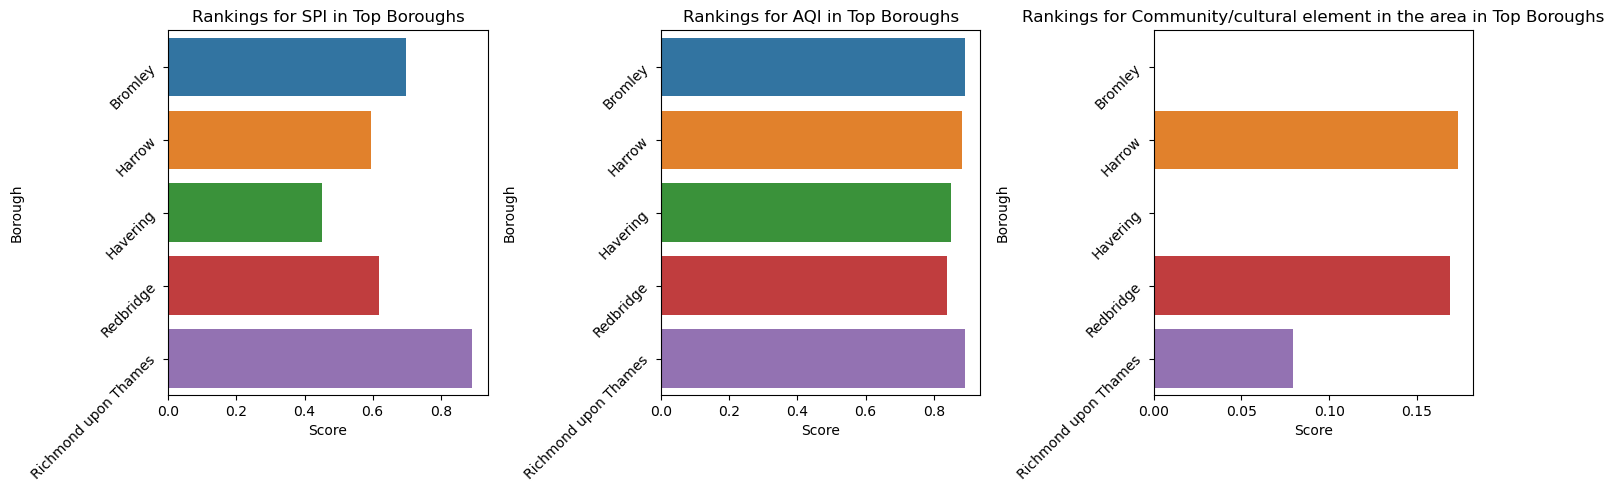

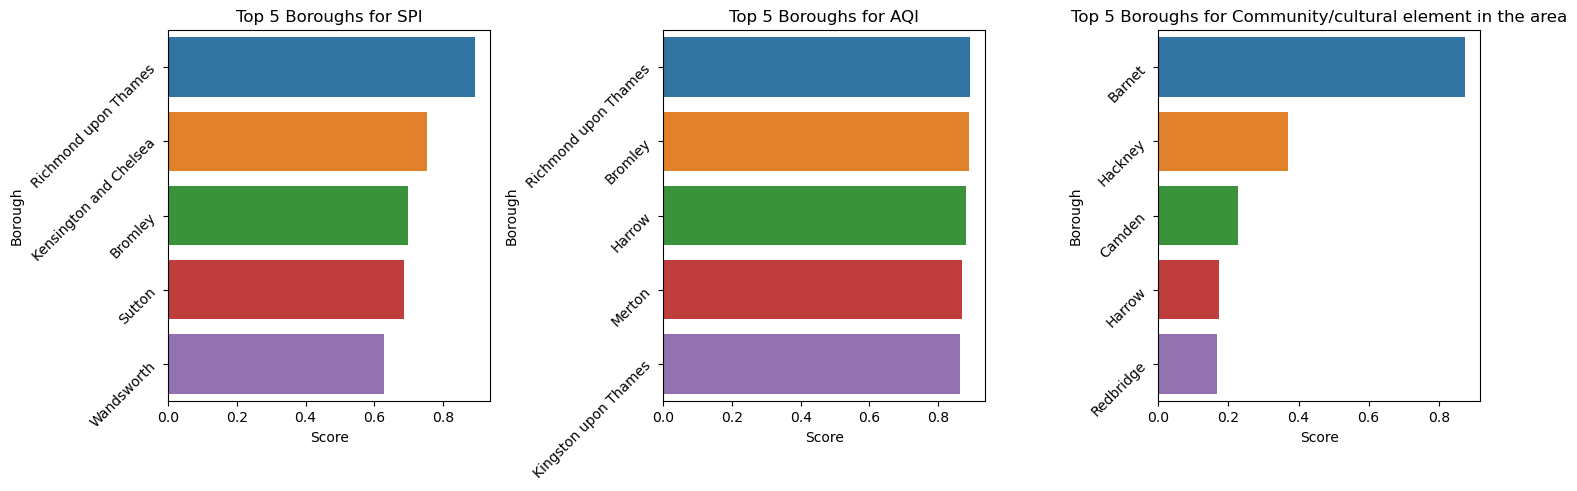

In [87]:
# Mapping of user inputs to dataframe columns
culture_mapping = {
        "White": "proportion_of_ethnics_white",
        "Asian": "proportion_of_ethnics_asian",
        "Black": "proportion_of_ethnics_black",
        "Mixed or Other": "proportion_of_ethnics_mixed_or_other",
        "Buddhist": "Percentage_Buddhist",
        "Christian": "Percentage_Christian",
        "Hindu": "Percentage_Hindu",
        "Jewish": "Percentage_Jewish",
        "Muslim": "Percentage_Muslim",
        "Sikh": "Percentage_Sikh"
}

# Run the functions
user_top_priorities = ["SPI", "AQI", "Community/cultural element in the area"]
user_culture_input = "Jewish"


plot_overall_top_boroughs_rankings(recommend_boroughs, user_preferences, user_top_priorities, index_df, culture_df, user_culture_input,  culture_mapping, n_boroughs=5)

plot_top_performing_boroughs_for_priorities(index_df, culture_df, user_top_priorities, culture_mapping, user_culture_input, n_boroughs=5)


Please rate the importance of SPI on a scale of 1-5: 5
Please rate the importance of AQI on a scale of 1-5: 5
Please rate the importance of GSI on a scale of 1-5: 5
Please rate the importance of Crime_Index on a scale of 1-5: 2
Please rate the importance of Diversity_Index on a scale of 1-5: 2
Please rate the importance of Entertainment_Index on a scale of 1-5: 2
Please rate the importance of Transport_Index on a scale of 1-5: 2
Please rate the importance of Community/cultural element in the area on a scale of 1-5: 2

Choose your top 3 priorities from the following options:
- SPI
- AQI
- GSI
- Crime_Index
- Diversity_Index
- Entertainment_Index
- Transport_Index
- Community/cultural element in the area
Enter your top 3 priorities, separated by commas (e.g., SPI, AQI, GSI), and in the exact form as above: GSI,SPI,AQI


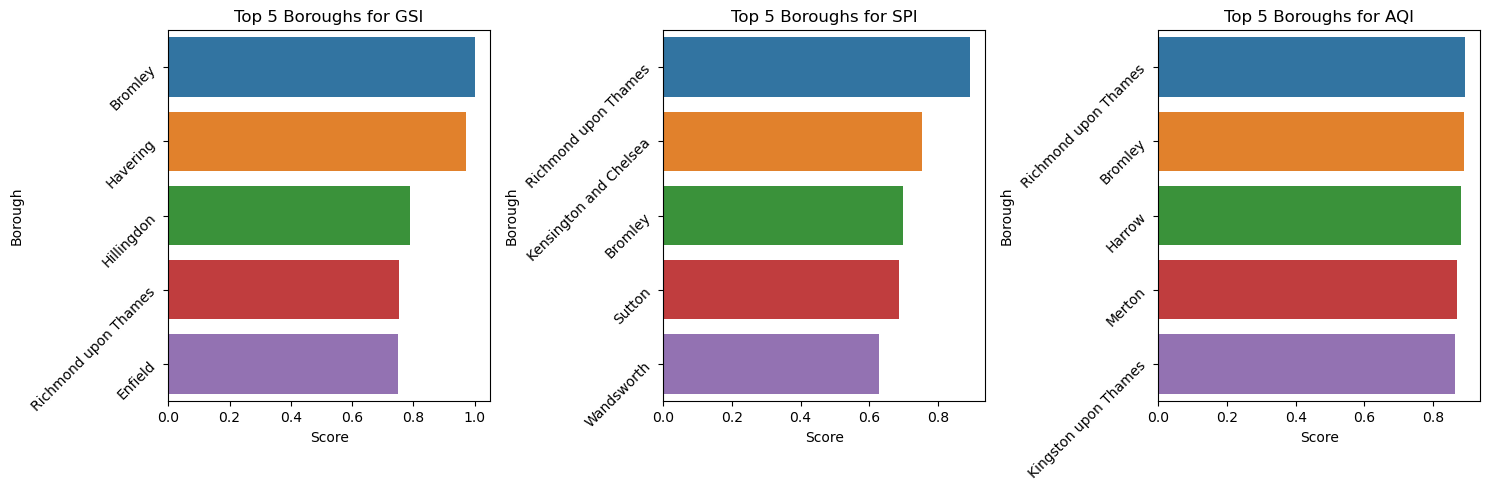

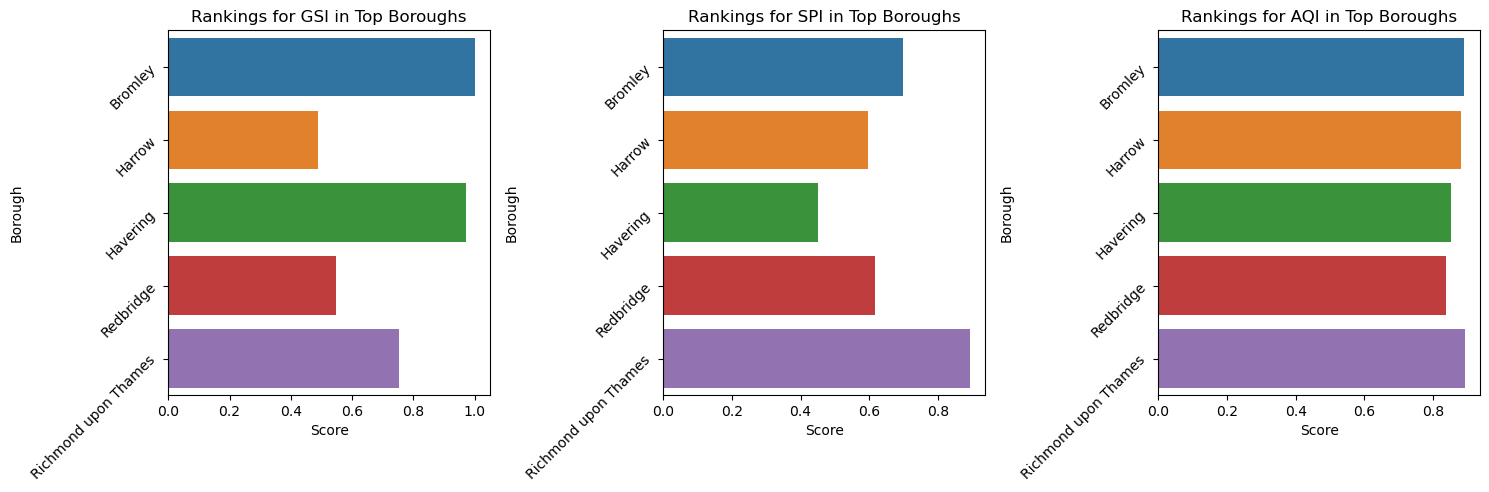

In [89]:
def user_input_and_plot():
    # Gather user inputs
    user_preferences, user_top_priorities, user_culture_input = get_user_input()

    # Call the plotting functions with the user inputs
    plot_top_performing_boroughs_for_priorities(index_df, culture_df, user_top_priorities, culture_mapping, user_culture_input, n_boroughs=5)
    plot_overall_top_boroughs_rankings(recommend_boroughs, user_preferences, user_top_priorities, index_df, culture_df, user_culture_input, culture_mapping, n_boroughs=5)

def get_user_input():
    # Mapping for cultural/community preferences
    culture_mapping = {
        "White": "proportion_of_ethnics_white",
        "Asian": "proportion_of_ethnics_asian",
        "Black": "proportion_of_ethnics_black",
        "Mixed or Other": "proportion_of_ethnics_mixed_or_other",
        "Buddhist": "Percentage_Buddhist",
        "Christian": "Percentage_Christian",
        "Hindu": "Percentage_Hindu",
        "Jewish": "Percentage_Jewish",
        "Muslim": "Percentage_Muslim",
        "Sikh": "Percentage_Sikh"
    }

    # User preferences for each factor
    user_preferences = {}
    factors = ["SPI", "AQI", 
               "GSI", "Crime_Index", 
               "Diversity_Index", "Entertainment_Index", 
               "Transport_Index", "Community/cultural element in the area"]
    
    for factor in factors:
        user_preferences[factor] = int(input(f"Please rate the importance of {factor} on a scale of 1-5: "))

    # Top 3 priorities
    print("\nChoose your top 3 priorities from the following options:")
    for factor in factors:
        print(f"- {factor}")
    top_3 = input("Enter your top 3 priorities, separated by commas (e.g., SPI, AQI, GSI), and in the exact form as above: ").split(',')

    # Cultural identity input
    user_culture_input = None
    if user_preferences["Community/cultural element in the area"] >= 4 or "Community/cultural element in the area" in top_3:
        print("\nChoose your cultural identity from the following options:")
        for culture in culture_mapping.keys():
            print(f"- {culture}")
        user_culture_input = input("Enter your cultural identity: ")

    return user_preferences, top_3, user_culture_input

# To run everything in one go:
user_input_and_plot()


Next steps:
* Implement financial constraints into the recommendation 
* Use the survey weighting to find an overall ranking of boroughs 

In [135]:
# Load dataset 
df_2 = pd.read_csv("london_borough_info.csv")
# Drop rows where 'borough_name' is 'City of London'
df_2 = df_2[df_2['borough_name'] != 'City of London']

In [136]:
# First, we will group the data by 'borough_name' and then calculate the mean house price for each borough
average_house_price_per_borough = df_2.groupby('borough_name')['house_price_mean'].mean()

# The result will be a Series with the index as the borough names and the values as the average house prices
average_house_price_per_borough

# Convert the Series to a DataFrame and reset the index to turn the index into a column
average_house_price_df = average_house_price_per_borough.reset_index()

# Rename the columns as specified
average_house_price_df.columns = ['borough_name', 'avg_house_price']

# Sort the DataFrame by 'avg_house_price' to rank the boroughs by average house price
average_house_price_df = average_house_price_df.sort_values('avg_house_price', ascending=True)

# Create a 'rank' column that assigns ranks starting with 1 for the cheapest borough
average_house_price_df['rank'] = range(1, len(average_house_price_df) + 1)

# Now we will sort the DataFrame by 'borough_name' in alphabetical order while maintaining the 'rank'
average_house_price_df = average_house_price_df.sort_values('borough_name', ascending=True)

average_house_price_df.head(35)

borough_name
Barking and Dagenham       295347.225
Barnet                     625897.650
Bexley                     349202.280
Brent                      548100.770
Bromley                    490382.215
Camden                    1081561.840
Croydon                    385849.665
Ealing                     565889.370
Enfield                    457049.820
Greenwich                  454125.640
Hackney                    608898.930
Hammersmith and Fulham     956227.880
Haringey                   645308.150
Harrow                     516008.615
Havering                   373068.230
Hillingdon                 446008.780
Hounslow                   492072.340
Islington                  766401.920
Kensington and Chelsea    2022938.445
Kingston upon Thames       560576.120
Lambeth                    602352.510
Lewisham                   454955.670
Merton                     612945.005
Newham                     389976.700
Redbridge                  437783.245
Richmond upon Thames       797200.175

borough_name  avg_house_price  rank
0     Barking and Dagenham       295347.225     1
1                   Barnet       625897.650    23
2                   Bexley       349202.280     2
3                    Brent       548100.770    17
4                  Bromley       490382.215    13
5                   Camden      1081561.840    30
6                  Croydon       385849.665     4
7                   Ealing       565889.370    19
8                  Enfield       457049.820    12
9                Greenwich       454125.640    10
10                 Hackney       608898.930    21
11  Hammersmith and Fulham       956227.880    29
12                Haringey       645308.150    25
13                  Harrow       516008.615    15
14                Havering       373068.230     3
15              Hillingdon       446008.780     9
16                Hounslow       492072.340    14
17               Islington       766401.920    26
18  Kensington and Chelsea      2022938.445    32
19    Kingston upon Thames       560576.120    18
20                 Lambeth       602352.510    20
21                Lewisham       454955.670    11
22                  Merton       612945.005    22
23                  Newham       389976.700     5
24               Redbridge       437783.245     7
25    Richmond upon Thames       797200.175    28
26               Southwark       642533.655    24
27                  Sutton       394852.625     6
28           Tower Hamlets       539258.560    16
29          Waltham Forest       445899.675     8
30              Wandsworth       796963.725    27
31             Westminster      1648981.245    31

In [137]:
def filter_out_using_budget(preferences, top_priorities, data, data_culture, user_culture_input=None):
    """
    This function extends the 'recommend_boroughs' function by filtering out boroughs 
    that exceed the user's budget.

    Args:
    - preferences: Dictionary containing user preferences for each index.
    - top_priorities: List of top three priorities.
    - data: DataFrame containing index values for each borough.
    - data_culture: DataFrame containing cultural composition of each borough.
    - average_house_price_df: DataFrame containing 'borough_name', 'avg_house_price', and 'rank'.
    - user_culture_input: User's cultural identity input, empty string if not provided.

    Returns:
    - DataFrame with recommended boroughs sorted by score and filtered by budget.
    """

    # Prompt the user for their budget
    user_budget = float(input("Please enter your budget for house price: "))

    # Generate the recommended boroughs sorted by score using the provided function
    recommended_boroughs = recommend_boroughs(preferences, top_priorities, data, data_culture, user_culture_input)

    # Merge the 'avg_house_price' from the average_house_price_df into the recommended boroughs dataframe
    recommended_boroughs_with_prices = recommended_boroughs.merge(
        average_house_price_df[['borough_name', 'avg_house_price']], 
        on='borough_name', 
        how='left'
    )

    # Filter out boroughs where the average house price is greater than the user's budget
    affordable_boroughs = recommended_boroughs_with_prices[
        recommended_boroughs_with_prices['avg_house_price'] <= user_budget
    ]

    # Return the filtered dataframe
    return affordable_boroughs

# This function assumes that the 'recommend_boroughs' and 'apply_culture_factor' functions have been defined,
# as well as that the necessary dataframes ('data', 'data_culture', 'average_house_price_df') are available in the environment.
# You would call the function like this, for example:
# user_preferences = {'SPI': 5, 'AQI': 2, 'GSI': 3, 'Crime_Index': 5, 'Diversity_Index': 1, 'Entertainment_Index': 3, 'Transport_Index': 5, 'Community/cultural element in the area': 1}
# user_top_priorities = ['Crime_Index', 'SPI', 'Transport_Index']
# filter_out_using_budget(user_preferences, user_top_priorities, data, data_culture, average_house_price_df, user_culture_input='Jewish')


Please rate the importance of SPI on a scale of 1-5:  5
Please rate the importance of AQI on a scale of 1-5:  5
Please rate the importance of GSI on a scale of 1-5:  5
Please rate the importance of Crime_Index on a scale of 1-5:  2
Please rate the importance of Diversity_Index on a scale of 1-5:  2
Please rate the importance of Entertainment_Index on a scale of 1-5:  2
Please rate the importance of Transport_Index on a scale of 1-5:  2
Please rate the importance of Community/cultural element in the area on a scale of 1-5:  2



Choose your top 3 priorities from the following options:
- SPI
- AQI
- GSI
- Crime_Index
- Diversity_Index
- Entertainment_Index
- Transport_Index
- Community/cultural element in the area


Enter your top 3 priorities, separated by commas (e.g., SPI, AQI, GSI), and in the exact form as above:  SPI,AQI,GSI
Please enter your budget for house price:  700000


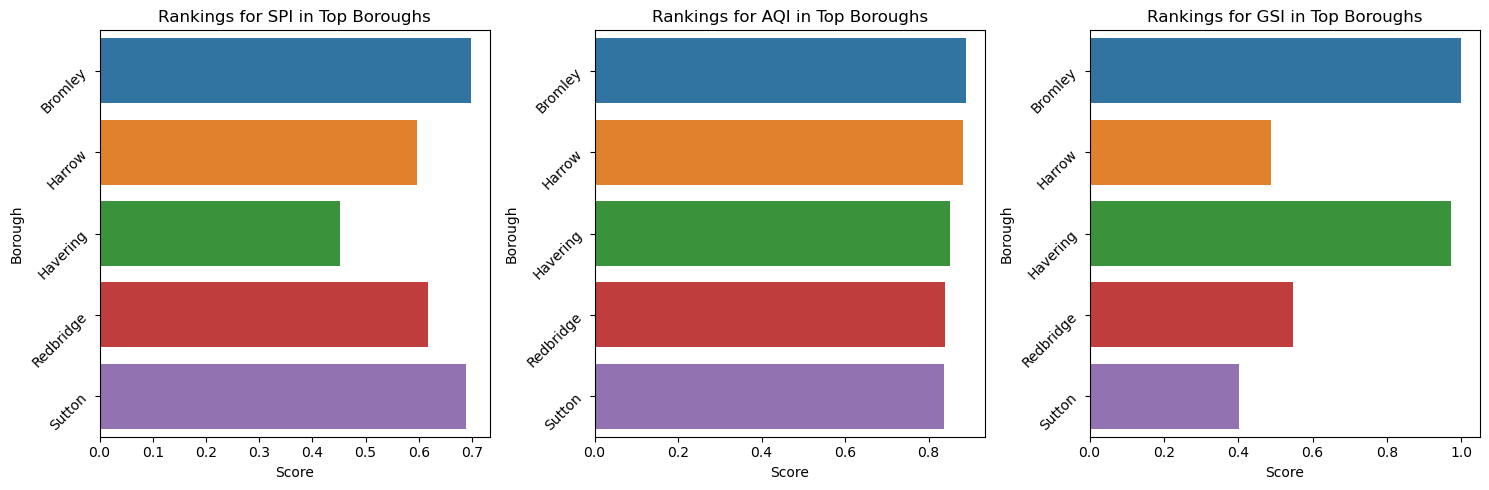

In [17]:
def user_input_and_plot_budget():
    # Gather user inputs
    user_preferences, user_top_priorities, user_culture_input = get_user_input()

    # Call the plotting functions with the user inputs
    # plot_top_performing_boroughs_for_priorities(index_df, culture_df, user_top_priorities, culture_mapping, user_culture_input, n_boroughs=5)
    plot_overall_top_boroughs_rankings(filter_out_using_budget, user_preferences, user_top_priorities, index_df, culture_df, user_culture_input, culture_mapping, n_boroughs=5)

def get_user_input_budget():
    # Mapping for cultural/community preferences
    culture_mapping = {
        "White": "proportion_of_ethnics_white",
        "Asian": "proportion_of_ethnics_asian",
        "Black": "proportion_of_ethnics_black",
        "Mixed or Other": "proportion_of_ethnics_mixed_or_other",
        "Buddhist": "Percentage_Buddhist",
        "Christian": "Percentage_Christian",
        "Hindu": "Percentage_Hindu",
        "Jewish": "Percentage_Jewish",
        "Muslim": "Percentage_Muslim",
        "Sikh": "Percentage_Sikh"
    }

    # User preferences for each factor
    user_preferences = {}
    factors = ["SPI", "AQI", 
               "GSI", "Crime_Index", 
               "Diversity_Index", "Entertainment_Index", 
               "Transport_Index", "Community/cultural element in the area"]
    
    for factor in factors:
        user_preferences[factor] = int(input(f"Please rate the importance of {factor} on a scale of 1-5: "))

    # Top 3 priorities
    print("\nChoose your top 3 priorities from the following options:")
    for factor in factors:
        print(f"- {factor}")
    top_3 = input("Enter your top 3 priorities, separated by commas (e.g., SPI, AQI, GSI), and in the exact form as above: ").split(',')

    # Cultural identity input
    user_culture_input = None
    if user_preferences["Community/cultural element in the area"] >= 4 or "Community/cultural element in the area" in top_3:
        print("\nChoose your cultural identity from the following options:")
        for culture in culture_mapping.keys():
            print(f"- {culture}")
        user_culture_input = input("Enter your cultural identity: ")

    return user_preferences, top_3, user_culture_input

# To run everything in one go:
user_input_and_plot_budget()


## Overall best boroughs 

In [212]:
# Load the data 
survey_df = pd.read_csv("London_Homebuyer_Survey.csv")
# survey_df.head()
# survey_df.columns
 
# Columns related to importance, top factors, challenges, and value features
importance_columns = [col for col in survey_df.columns if col.startswith('importance_of_')]
top_factors_columns = [col for col in survey_df.columns if col.startswith('top_3_factors_')]

# Calculating averages
importance_averages = survey_df[importance_columns].mean().sort_values(ascending=False)
print(importance_averages)
 
# Counting occurrences
top_priorities_counts = survey_df[top_factors_columns].sum().sort_values(ascending=False)
print(top_priorities_counts)


importance_of_crime_rates                                                        4.242991
importance_of_proximity_to_public_transport                                      4.177570
importance_of_amount_of_surrounding_green_spaces                                 4.102804
importance_of_proximity_to_entertainment_(food_scene,_markets,_shopping,_etc)    3.794393
importance_of_housing_or_mortgage_costs                                          3.738318
importance_of_proximity_to_workplace                                             3.579439
importance_of_proximity_to_personal_extracurricular_activities                   3.373832
importance_of_air_quality_index                                                  3.224299
importance_of_community/_cultural_element_to_the_area                            3.112150
importance_of_school_performance                                                 2.654206
importance_of_diversity_in_the_area                                              2.626168
importance

In [213]:
# Overall best boroughs 
user_preferences = {
    "SPI": 2.654206,  # School performance
    "AQI": 3.224299,  # Air quality index
    "GSI": 4.102804,  # Green space index
    "Crime_Index": 4.242991,  # Crime rates
    "Diversity_Index": 2.626168,  # Diversity in the area
    "Entertainment_Index": 3.794393,  # Proximity to entertainment
    "Transport_Index": 4.177570,  # Proximity to public transport
    "Community/cultural element in the area": 3.112150  # Cultural element importance
}
user_top_priorities = ["Transport_Index", "GSI", "Entertainment_Index"]
user_culture_input = " "

# Get the recommendation
recommended_boroughs = recommend_boroughs(user_preferences, user_top_priorities, index_df.copy(), culture_df.copy(), user_culture_input)

# Display the top recommended boroughs
recommended_boroughs.head(35)

borough_name      Score
31             Westminster  13.026929
4                  Bromley  11.066638
14                Havering  10.809834
25    Richmond upon Thames  10.607709
15              Hillingdon  10.421663
5                   Camden  10.310450
13                  Harrow   9.670453
17               Islington   9.537745
24               Redbridge   9.476247
1                   Barnet   9.077697
11  Hammersmith and Fulham   9.029693
16                Hounslow   9.010155
18  Kensington and Chelsea   9.002182
8                  Enfield   8.927728
2                   Bexley   8.757956
29          Waltham Forest   8.718728
7                   Ealing   8.644085
26               Southwark   8.610136
22                  Merton   8.529637
28           Tower Hamlets   8.510891
27                  Sutton   8.424836
6                  Croydon   8.407861
3                    Brent   8.407380
19    Kingston upon Thames   8.378377
9                Greenwich   8.191929
30              Wandsworth   8.051227
23                  Newham   7.651137
10                 Hackney   7.583584
12                Haringey   7.421002
0     Barking and Dagenham   7.378130
20                 Lambeth   7.314555
21                Lewisham   6.783127

In [214]:
# Now let's get teh ranking with budget constraint 
recommended_boroughs_budget = filter_out_using_budget(user_preferences, user_top_priorities, index_df.copy(), culture_df.copy(), user_culture_input)
recommended_boroughs_budget.head(35)

Please enter your budget for house price: 1000000


borough_name      Score  avg_house_price
1                  Bromley  11.066638       490382.215
2                 Havering  10.809834       373068.230
3     Richmond upon Thames  10.607709       797200.175
4               Hillingdon  10.421663       446008.780
6                   Harrow   9.670453       516008.615
7                Islington   9.537745       766401.920
8                Redbridge   9.476247       437783.245
9                   Barnet   9.077697       625897.650
10  Hammersmith and Fulham   9.029693       956227.880
11                Hounslow   9.010155       492072.340
13                 Enfield   8.927728       457049.820
14                  Bexley   8.757956       349202.280
15          Waltham Forest   8.718728       445899.675
16                  Ealing   8.644085       565889.370
17               Southwark   8.610136       642533.655
18                  Merton   8.529637       612945.005
19           Tower Hamlets   8.510891       539258.560
20                  Sutton   8.424836       394852.625
21                 Croydon   8.407861       385849.665
22                   Brent   8.407380       548100.770
23    Kingston upon Thames   8.378377       560576.120
24               Greenwich   8.191929       454125.640
25              Wandsworth   8.051227       796963.725
26                  Newham   7.651137       389976.700
27                 Hackney   7.583584       608898.930
28                Haringey   7.421002       645308.150
29    Barking and Dagenham   7.378130       295347.225
30                 Lambeth   7.314555       602352.510
31                Lewisham   6.783127       454955.670

In [151]:
# Now lets find out where one of our survey respondents should live 
import random

# Assuming you have a dataframe named survey_df
length_of_survey_df = len(survey_df)  # Get the length of your dataframe

# Generate a random number within the range of the dataframe length
random_index = random.randint(0, length_of_survey_df - 1)
print(random_index)

# Find the customer id corresponding to the random index
customer_id = survey_df.iloc[random_index]['id']

# Access the customer's data
customer_data = survey_df[survey_df['id'] == customer_id]
customer_data

# Calculating averages
importance_customer_data = customer_data[importance_columns].sum().sort_values(ascending=False)
print(importance_customer_data)
 
# Counting occurrences
top_priorities_customer_data = customer_data[top_factors_columns].sum().sort_values(ascending=False)
print(top_priorities_customer_data)



68


id    age  housemates_marriedpartner  housemates_nonmarriedpartner  \
68  69.0  35-44                        0.0                           0.0   

    housemates_flatmates  housemates_children  housemates_pets  \
68                   0.0                  0.0              1.0   

    housemates_alone  housemates_parents living_in_london  ...  \
68               0.0                 0.0                0  ...   

   valuable_features_market_trends_and_property_values  \
68                                                0.0    

   valuable_features_recommendations_from_local_residents  \
68                                                0.0       

   valuable_features_mortgage_calculator  \
68                                   1.0   

   valuable_features_future_development_projects_in_the_area  \
68                                                0.0          

   valuable_features_reviews_and_testimonials_from_previous_buyers  \
68                                                0.0                

   valuable_features_ability_to_save_liked_properties_in_one_location  \
68                                                0.0                   

   valuable_features_an_index/score_of_the_neighborhood's_livability_rating  \
68                                                0.0                         

    valuable_features_other  feedback\n  specific_challenges  
68                      0.0         NaN                  NaN  

[1 rows x 81 columns]

importance_of_amount_of_surrounding_green_spaces                                 5.0
importance_of_diversity_in_the_area                                              5.0
importance_of_community/_cultural_element_to_the_area                            5.0
importance_of_proximity_to_entertainment_(food_scene,_markets,_shopping,_etc)    5.0
importance_of_proximity_to_public_transport                                      5.0
importance_of_proximity_to_personal_extracurricular_activities                   4.0
importance_of_air_quality_index                                                  4.0
importance_of_crime_rates                                                        4.0
importance_of_housing_or_mortgage_costs                                          4.0
importance_of_proximity_to_workplace                                             3.0
importance_of_school_performance                                                 1.0
importance_of_proximity_to_children's_extracurricular_activities 

In [215]:
# Get customer preferences in the correct form from the survey data 
def get_formatted_customer_preferences(survey_df):
    # Define importance and top factors columns
    importance_columns = [
        'importance_of_school_performance',
        'importance_of_air_quality_index',
        'importance_of_amount_of_surrounding_green_spaces',
        'importance_of_crime_rates',
        'importance_of_diversity_in_the_area',
        'importance_of_proximity_to_entertainment_(food_scene,_markets,_shopping,_etc)',
        'importance_of_proximity_to_public_transport',
        'importance_of_community/_cultural_element_to_the_area'
    ]

    top_factors_columns = [
        'top_3_factors_school_performance',
        'top_3_factors_air_quality_index',
        'top_3_factors_amount_of_surrounding_green_spaces',
        'top_3_factors_crime_rates',
        'top_3_factors_diversity_in_the_neighbourhood',
        'top_3_factors_proximity_to_entertainment_(food_scene,_markets,_shopping,_etc)',
        'top_3_factors_proximity_to_public_transport',
        'top_3_factors_community/_cultural_element_to_the_neighbourhood'
    ]

    # Randomly select a customer
    random_index = random.randint(0, len(survey_df) - 1)
    print(f'Random index is: {random_index}')
    customer_data = survey_df.iloc[random_index-1]
    print(f'Customer ID is: {customer_data[0]}')

    # Check if 'est_homebuying_budget' is a string and not NaN
    budget_range = customer_data['est_homebuying_budget']
    if isinstance(budget_range, str):
        if budget_range == 'Over £2,000,000':
            # Handle the specific case where the budget is over £2,000,000
            high_end_budget = 2000000
        else:
            # Process the higher end of the est_homebuying_budget for other cases
            high_end_budget = budget_range.split(' - ')[-1]  # Get the higher end of the range
            high_end_budget = int(high_end_budget.replace('£', '').replace(',', ''))  # Remove non-numeric characters and convert to int

        print("High end of estimated home buying budget:", high_end_budget)
    else:
        print("Budget information is not available.")


    # Mapping from survey column names to your specific preference names
    preference_mapping = {
        'importance_of_school_performance': 'SPI',
        'importance_of_air_quality_index': 'AQI',
        'importance_of_amount_of_surrounding_green_spaces': 'GSI',
        'importance_of_crime_rates': 'Crime_Index',
        'importance_of_diversity_in_the_area': 'Diversity_Index',
        'importance_of_proximity_to_entertainment_(food_scene,_markets,_shopping,_etc)': 'Entertainment_Index',
        'importance_of_proximity_to_public_transport': 'Transport_Index',
        'importance_of_community/_cultural_element_to_the_area': 'Community/cultural element in the area'
    }

    # Mapping for top factors columns
    top_factors_mapping = {
        'top_3_factors_school_performance': 'SPI',
        'top_3_factors_air_quality_index': 'AQI',
        'top_3_factors_amount_of_surrounding_green_spaces': 'GSI',
        'top_3_factors_crime_rates': 'Crime_Index',
        'top_3_factors_diversity_in_the_neighbourhood': 'Diversity_Index',
        'top_3_factors_proximity_to_entertainment_(food_scene,_markets,_shopping,_etc)': 'Entertainment_Index',
        'top_3_factors_proximity_to_public_transport': 'Transport_Index',
        'top_3_factors_community/_cultural_element_to_the_neighbourhood': 'Community/cultural element in the area'
    }

    # Create user_preferences dictionary
    user_preferences = {preference_mapping[key]: customer_data[key] for key in importance_columns}

    # Identify top priorities
    user_top_priorities = [top_factors_mapping[key] for key in top_factors_columns if customer_data[key] == 1]

    return user_preferences, user_top_priorities

# Run the function 
user_preferences, user_top_priorities = get_formatted_customer_preferences(survey_df)

Random index is: 1
Customer ID is: 1.0
High end of estimated home buying budget: 1500000


In [216]:
# Get the list of boroughs in ranking order and the plots
recommended_boroughs_budget = filter_out_using_budget(user_preferences, user_top_priorities, index_df.copy(), culture_df.copy(), user_culture_input)
recommended_boroughs_budget.head(35)


Please enter your budget for house price: 1500000


borough_name      Score  avg_house_price
0                  Bromley  14.266027       490382.215
1     Richmond upon Thames  13.934163       797200.175
2                 Havering  13.906972       373068.230
3                   Harrow  12.777596       516008.615
4                Redbridge  12.349005       437783.245
6               Hillingdon  11.831033       446008.780
7                   Barnet  11.716674       625897.650
8           Waltham Forest  11.689733       445899.675
9                   Merton  11.661514       612945.005
10    Kingston upon Thames  11.644954       560576.120
11                  Sutton  11.595252       394852.625
12                  Camden  11.531188      1081561.840
13               Islington  11.432054       766401.920
14                  Bexley  11.149946       349202.280
15                 Croydon  11.143170       385849.665
16                 Enfield  11.140478       457049.820
17                Hounslow  11.072351       492072.340
18                  Ealing  10.956607       565889.370
19  Hammersmith and Fulham  10.944090       956227.880
20               Southwark  10.813652       642533.655
21               Greenwich  10.793346       454125.640
22              Wandsworth  10.553002       796963.725
23                   Brent  10.532867       548100.770
25    Barking and Dagenham  10.286965       295347.225
26                Haringey  10.101085       645308.150
27                 Hackney  10.061755       608898.930
28           Tower Hamlets   9.777180       539258.560
29                 Lambeth   9.411837       602352.510
30                  Newham   9.361424       389976.700
31                Lewisham   9.276809       454955.670

In [ ]:
def plot_overall_top_boroughs_rankings_budget(recommend_boroughs_budget, preferences, top_priorities, data, data_culture, user_culture_input, culture_mapping, n_boroughs=5):
    recommend_boroughs_budget = recommend_boroughs_budget.drop('avg_house_price', axis=1)
    top_boroughs = recommend_boroughs_budget.head(n_boroughs)

    fig, axes = plt.subplots(1, len(top_priorities), figsize=(5 * len(top_priorities), 5))
    if len(top_priorities) == 1:
        axes = [axes]

    for i, priority in enumerate(top_priorities):
        if priority == "Community/cultural element in the area":
            priority_col = culture_mapping[user_culture_input]
            priority_scores = data_culture[data_culture['borough_name'].isin(top_boroughs['borough_name'])][['borough_name', priority_col]]
        else:
            priority_scores = data[data['borough_name'].isin(top_boroughs['borough_name'])][['borough_name', priority]]
        
        sns.barplot(y='borough_name', x=priority_col if priority == "Community/cultural element in the area" else priority, data=priority_scores, ax=axes[i])
        axes[i].set_title(f"Rankings for {priority} in Top Boroughs")
        axes[i].set_ylabel('Borough')
        axes[i].set_xlabel('Score')
        axes[i].tick_params(axis='y', rotation=45)
    plt.tight_layout()
    plt.show()


# Demonstration

In [231]:
# Put all the needed functions here 

# Suplot 1 - visualisation of boroughs
def plot_overall_top_boroughs_rankings_budget(recommend_boroughs_budget, preferences, top_priorities, data, data_culture, user_culture_input, culture_mapping, n_boroughs=5):
    top_boroughs = recommend_boroughs_budget.head(n_boroughs)

    # Setting a higher DPI for better image quality
    plt.rcParams['figure.dpi'] = 150

    fig, axes = plt.subplots(1, len(top_priorities), figsize=(5 * len(top_priorities), 5))
    if len(top_priorities) == 1:
        axes = [axes]

    for i, priority in enumerate(top_priorities):
        if priority == "Community/cultural element in the area":
            priority_col = culture_mapping[user_culture_input]
            priority_scores = data_culture[data_culture['borough_name'].isin(top_boroughs['borough_name'])][['borough_name', priority_col]]
        else:
            priority_scores = data[data['borough_name'].isin(top_boroughs['borough_name'])][['borough_name', priority]]

        # Using a more aesthetically pleasing color palette
        sns.barplot(y='borough_name', x=priority_col if priority == "Community/cultural element in the area" else priority, data=priority_scores, ax=axes[i], palette='viridis')
        
        axes[i].set_title(f"Rankings for {priority} in Top Boroughs")
        axes[i].set_ylabel('Borough')
        axes[i].set_xlabel('Score')
        axes[i].tick_params(axis='y', rotation=45)

    plt.tight_layout()
    plt.show()


# Subplot 2 - general 
def plot_top_performing_boroughs_for_priorities(data, data_culture, top_priorities, culture_mapping, user_culture_input, n_boroughs=5):
    fig, axes = plt.subplots(1, len(top_priorities), figsize=(5 * len(top_priorities), 5))
    if len(top_priorities) == 1:
        axes = [axes]
    
    for i, priority in enumerate(top_priorities):
        if priority == "Community/cultural element in the area":
            priority_col = culture_mapping[user_culture_input]
            top_boroughs = data_culture.sort_values(by=priority_col, ascending=False).head(n_boroughs)
        else:
            top_boroughs = data.sort_values(by=priority, ascending=False).head(n_boroughs)
        
        sns.barplot(y='borough_name', x=priority_col if priority == "Community/cultural element in the area" else priority, data=top_boroughs, ax=axes[i], palette='magma')
        axes[i].set_title(f"Top {n_boroughs} Boroughs for {priority}")
        axes[i].set_ylabel('Borough')
        axes[i].set_xlabel('Score')
        axes[i].tick_params(axis='y', rotation=45)
    plt.tight_layout()
    plt.show()
    
    
# Get recommended boroughs based on budget constraint
def recommend_boroughs_with_budget_constraint(preferences, top_priorities, data, data_culture, user_budget, user_culture_input=None):
    # Generate the recommended boroughs sorted by score using the provided function
    recommended_boroughs = recommend_boroughs(preferences, top_priorities, data, data_culture, user_culture_input)

    # Merge the 'avg_house_price' from the average_house_price_df into the recommended boroughs dataframe
    recommended_boroughs_with_prices = recommended_boroughs.merge(
        average_house_price_df[['borough_name', 'avg_house_price']], 
        on='borough_name', 
        how='left'
    )

    # Filter out boroughs where the average house price is greater than the user's budget
    affordable_boroughs = recommended_boroughs_with_prices[
        recommended_boroughs_with_prices['avg_house_price'] <= user_budget
    ]
    
    affordable_boroughs = affordable_boroughs.drop('avg_house_price', axis=1)

    # Return the filtered dataframe
    return affordable_boroughs


# Get customer preferences in the correct form from the survey data 
def get_formatted_customer_preferences(survey_df):
    # Initialization
    high_end_budget = None  # Initialize high_end_budget
    
    # Define importance and top factors columns
    importance_columns = [
        'importance_of_school_performance',
        'importance_of_air_quality_index',
        'importance_of_amount_of_surrounding_green_spaces',
        'importance_of_crime_rates',
        'importance_of_diversity_in_the_area',
        'importance_of_proximity_to_entertainment_(food_scene,_markets,_shopping,_etc)',
        'importance_of_proximity_to_public_transport',
        'importance_of_community/_cultural_element_to_the_area'
    ]

    top_factors_columns = [
        'top_3_factors_school_performance',
        'top_3_factors_air_quality_index',
        'top_3_factors_amount_of_surrounding_green_spaces',
        'top_3_factors_crime_rates',
        'top_3_factors_diversity_in_the_neighbourhood',
        'top_3_factors_proximity_to_entertainment_(food_scene,_markets,_shopping,_etc)',
        'top_3_factors_proximity_to_public_transport',
        'top_3_factors_community/_cultural_element_to_the_neighbourhood'
    ]

    # Randomly select a customer
    random_index = random.randint(0, len(survey_df) - 1)
#     print(f'Random index is: {random_index}')
    customer_data = survey_df.iloc[random_index-1]
    print(f'Randomised customer ID is: {customer_data[0]}')

    # Check and process 'est_homebuying_budget'
    budget_range = customer_data['est_homebuying_budget']
    if isinstance(budget_range, str):
        if budget_range == 'Over £2,000,000':
            high_end_budget = 2000000
        else:
            high_end_budget = budget_range.split(' - ')[-1]
            high_end_budget = int(high_end_budget.replace('£', '').replace(',', ''))
    else:
        print("Budget information is not available.")


    # Mapping from survey column names to your specific preference names
    preference_mapping = {
        'importance_of_school_performance': 'SPI',
        'importance_of_air_quality_index': 'AQI',
        'importance_of_amount_of_surrounding_green_spaces': 'GSI',
        'importance_of_crime_rates': 'Crime_Index',
        'importance_of_diversity_in_the_area': 'Diversity_Index',
        'importance_of_proximity_to_entertainment_(food_scene,_markets,_shopping,_etc)': 'Entertainment_Index',
        'importance_of_proximity_to_public_transport': 'Transport_Index',
        'importance_of_community/_cultural_element_to_the_area': 'Community/cultural element in the area'
    }

    # Mapping for top factors columns
    top_factors_mapping = {
        'top_3_factors_school_performance': 'SPI',
        'top_3_factors_air_quality_index': 'AQI',
        'top_3_factors_amount_of_surrounding_green_spaces': 'GSI',
        'top_3_factors_crime_rates': 'Crime_Index',
        'top_3_factors_diversity_in_the_neighbourhood': 'Diversity_Index',
        'top_3_factors_proximity_to_entertainment_(food_scene,_markets,_shopping,_etc)': 'Entertainment_Index',
        'top_3_factors_proximity_to_public_transport': 'Transport_Index',
        'top_3_factors_community/_cultural_element_to_the_neighbourhood': 'Community/cultural element in the area'
    }

    # Create user_preferences dictionary
    user_preferences = {preference_mapping[key]: customer_data[key] for key in importance_columns}

    # Identify top priorities
    user_top_priorities = [top_factors_mapping[key] for key in top_factors_columns if customer_data[key] == 1]
    
    print(budget_range)
    
    # Return preferences, priorities, and high_end_budget
    return user_preferences, user_top_priorities, high_end_budget

# Run the function
user_preferences_survey, user_top_priorities_survey, high_end_budget_survey = get_formatted_customer_preferences(survey_df)



Randomised customer ID is: 94.0
£250,000 - £500,000


borough_name      Score
1         Bromley  17.603556
4       Redbridge  16.951960
5        Havering  16.417174
8      Hillingdon  15.722341
9  Waltham Forest  15.699994

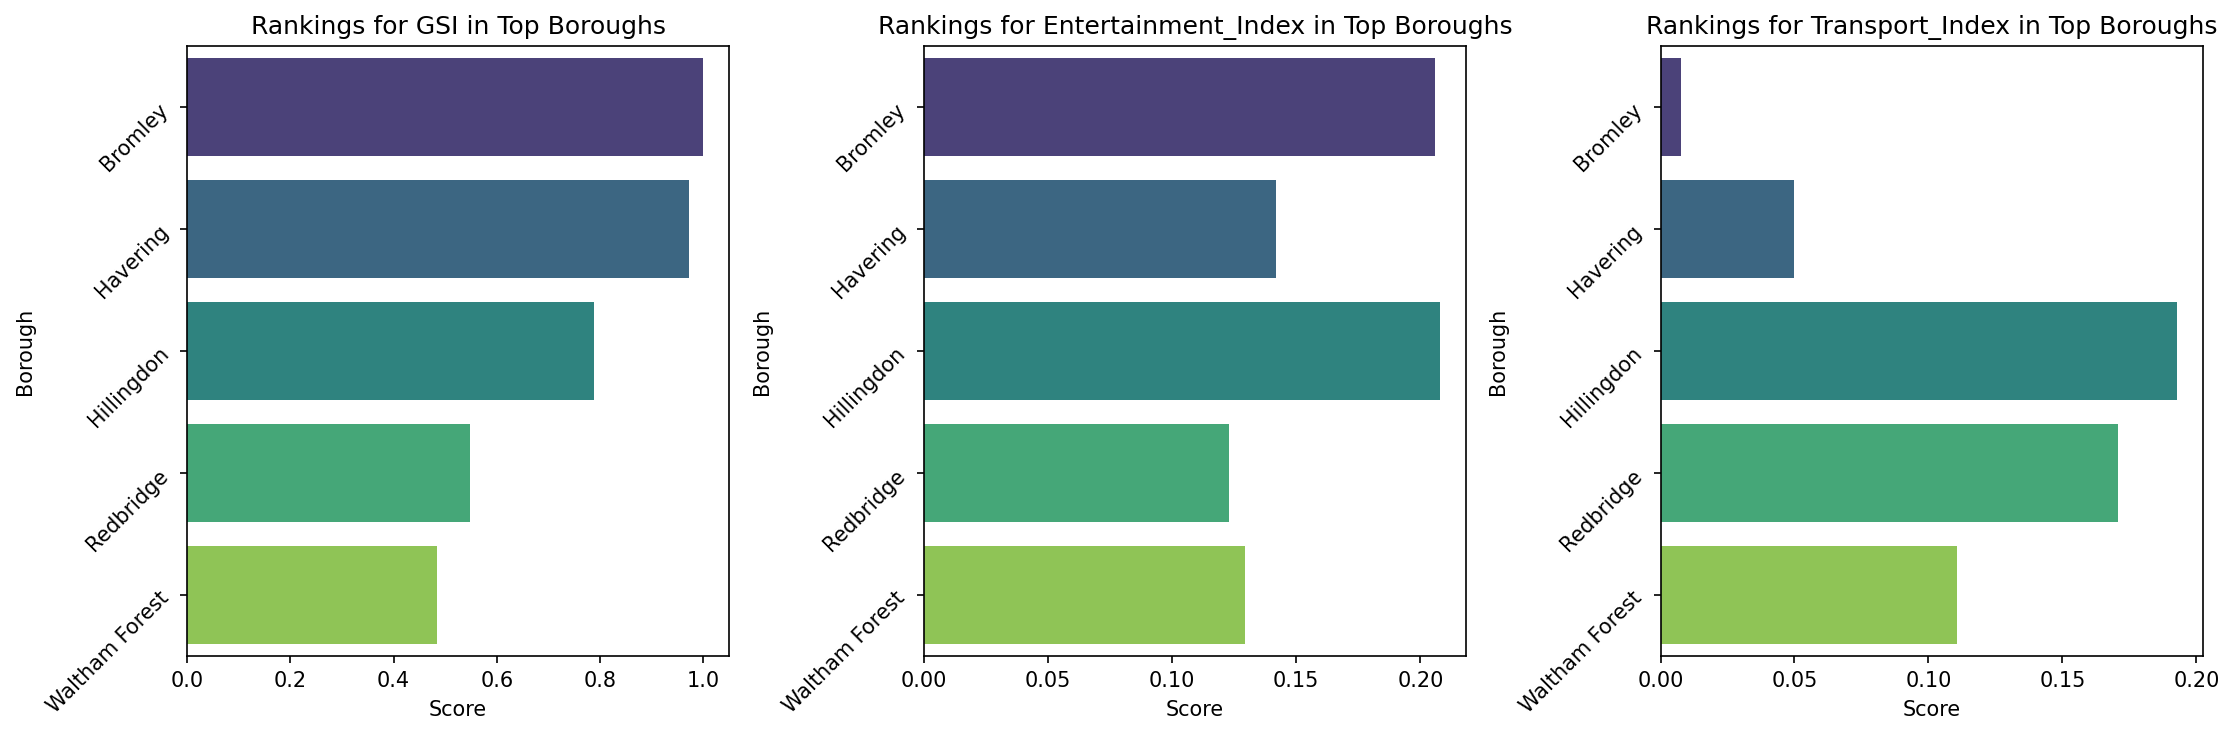

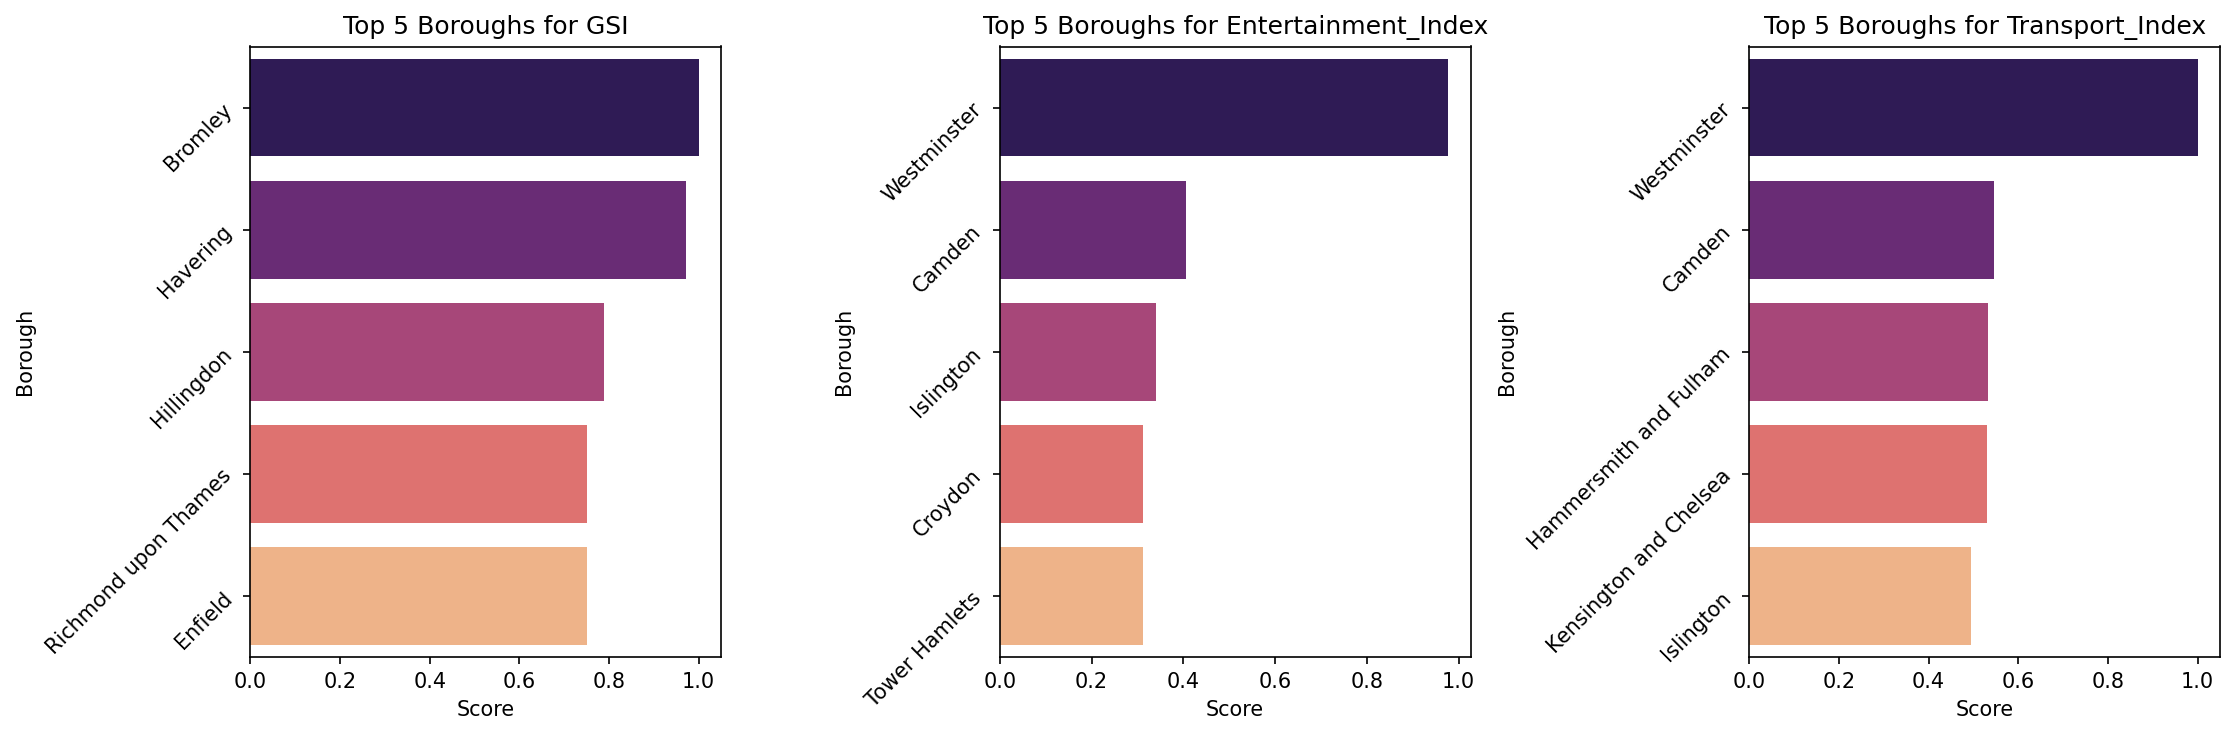

In [232]:
# Top 5 boroughs overall in a table 
recommend_boroughs_budget = recommend_boroughs_with_budget_constraint(user_preferences_survey, user_top_priorities_survey, index_df, culture_df, high_end_budget_survey, user_culture_input=None)
recommend_boroughs_budget.head()


# Subplot 1 
plot_overall_top_boroughs_rankings_budget(recommend_boroughs_budget, user_preferences_survey, user_top_priorities_survey, index_df, culture_df, user_culture_input, culture_mapping, n_boroughs=5)


# Subplot 2 
plot_top_performing_boroughs_for_priorities(index_df, culture_df, user_top_priorities_survey, culture_mapping, user_culture_input, n_boroughs=5)